# This script carries on from here:
- nfs/team205/ig7/work_backups/backup_210306/projects/YS/rebuttal_figs_010922/3_6_CPDB_HSPC/legacy_CPDB_files/cellphonedb/YS_all_HSPC_overtime/CPDB_overtime_dotplot.ipynb

In [1]:
import sys
import subprocess

#import pkg_resources
#required = {'harmonypy','sklearn','scanpy','pandas', 'numpy', 'bbknn', 'scipy', 'matplotlib', 'seaborn' ,'scipy'}
#installed = {pkg.key for pkg in pkg_resources.working_set}
#missing = required - installed
#if missing:
#    print("Installing missing packages:" )
#    print(missing)
#    python = sys.executable
#    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

%matplotlib inline
from collections import Counter
from collections import defaultdict
import scanpy as sc
import pandas as pd
import pickle as pkl
import numpy as np
from bbknn import bbknn
import scipy
import matplotlib.pyplot as plt
import re
import glob
import os
import sys
# from geosketch import gs
from numpy import cov
import scipy.cluster.hierarchy as spc
import seaborn as sns; sns.set(color_codes=True)
from sklearn.linear_model import LogisticRegression
import sklearn
import harmonypy as hm
from pathlib import Path
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,60

In [2]:
# data mod module
adata_path = ("/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_data/Submission_2_data/A2_V8_scvi_YS_integrated/A2_V8_scvi_V8_model_selected_raw_qc_scr_umap.h5ad")
#adata = sc.read(adata_path)

#Var level
split_level = 'stage_groups'
meta_int ='cell_labels_lvl2'
proj_name = "cell_labels_lvl2_cpdb_YS_overtime"
out_path = "/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_030522_notebooks/cellphonedb/YS_all_HSPC_overtime/"

adata_exp = sc.read(adata_path)

In [3]:
adata_exp = sc.read(adata_path)

In [60]:
cpdb_database = {
'CS10_11':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/rebuttal_figs_010922/3_6_CPDB_HSPC/A1_V2_311022_CPDB_DEF_PRIM_ovetime/CS10_11_cell_labels_lvl3_cpdb_YS_def_prim_overtime/significant_means.txt',
'CS14_15':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/rebuttal_figs_010922/3_6_CPDB_HSPC/A1_V2_311022_CPDB_DEF_PRIM_ovetime/CS14_15_cell_labels_lvl3_cpdb_YS_def_prim_overtime/significant_means.txt',
'CS17_18':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/rebuttal_figs_010922/3_6_CPDB_HSPC/A1_V2_311022_CPDB_DEF_PRIM_ovetime/CS17_18_cell_labels_lvl3_cpdb_YS_def_prim_overtime/significant_means.txt',
'CS22_23':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/rebuttal_figs_010922/3_6_CPDB_HSPC/A1_V2_311022_CPDB_DEF_PRIM_ovetime/CS22_23_cell_labels_lvl3_cpdb_YS_def_prim_overtime/significant_means.txt',
}
cpdb_database = {
'CS10_11':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/rebuttal_figs_010922/3_6_CPDB_HSPC/A1_V2_311022_CPDB_DEF_PRIM_ovetime/CS10_11_cell_labels_lvl3_cpdb_YS_def_prim_overtime/means.txt',
'CS14_15':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/rebuttal_figs_010922/3_6_CPDB_HSPC/A1_V2_311022_CPDB_DEF_PRIM_ovetime/CS14_15_cell_labels_lvl3_cpdb_YS_def_prim_overtime/means.txt',
'CS17_18':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/rebuttal_figs_010922/3_6_CPDB_HSPC/A1_V2_311022_CPDB_DEF_PRIM_ovetime/CS17_18_cell_labels_lvl3_cpdb_YS_def_prim_overtime/means.txt',
'CS22_23':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/rebuttal_figs_010922/3_6_CPDB_HSPC/A1_V2_311022_CPDB_DEF_PRIM_ovetime/CS22_23_cell_labels_lvl3_cpdb_YS_def_prim_overtime/means.txt',
}


<ipython-input-62-dec8f72357b7>:109: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_temp = anndata.AnnData(X= c_mat.T)
<ipython-input-62-dec8f72357b7>:109: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_temp = anndata.AnnData(X= c_mat.T)
<ipython-input-62-dec8f72357b7>:109: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_temp = anndata.AnnData(X= c_mat.T)
<ipython-input-6

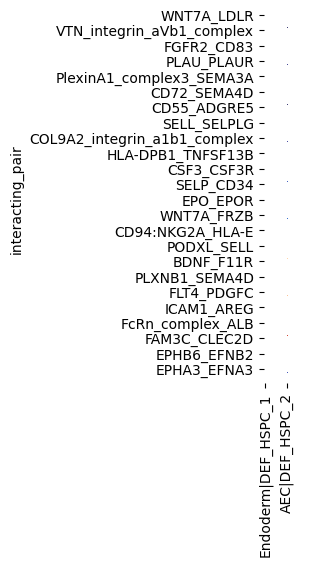

In [62]:
exp_tbl = {}
keep_2 = ['PRIM_HSPC_1','PRIM_HSPC_2', 'DEF_HSPC_2','DEF_HSPC_1']

adatas = []
for cpdb_dat in cpdb_database:
    cpdb = pd.read_csv(cpdb_database[cpdb_dat], delimiter = "\t",index_col=0)
    
    keep = [
     'Sinusoidal_EC',
     'PRIM_HSPC_1',
     'PRIM_HSPC_2',
     'Endoderm',
    # 'Immature_EC',
#     'Mesothelium',
    # 'Prolif_Sinusoidal_EC',
     'Fibroblast',
     'AEC',
    'DEF_HSPC_2',
    'DEF_HSPC_1',
     'VWF_EC',
     'Smooth_Muscle',
    # 'Prolif_AEC',
     'HE',
    ]

    from itertools import product
    combi = (pd.DataFrame(product(keep,keep)))
    combi['combi'] = combi.iloc[:,0].astype(str) + "|" +combi.iloc[:,1].astype(str)
#     combi = combi[~combi['combi'].str.startswith(('DEF_','PRIM_','unassigned_'))]
#     combi = combi[~combi['combi'].str.endswith(('unassigned_'))]
    combi = combi[~combi[0].isin(keep_2)]
    combi = combi[combi[1].isin(keep_2)]
    
    
    cpdb_metrics = ['interacting_pair',
     'partner_a',
     'partner_b',
     'gene_a',
     'gene_b',
     'secreted',
     'receptor_a',
     'receptor_b',
     'annotation_strategy',
     'is_integrin',
     ]#'rank',
    cpdb_interaction = cpdb[cpdb.columns[cpdb.columns.isin(cpdb_metrics+list(combi['combi']))]]#cpdb[cpdb_metrics+list(combi['combi'])]
    cpdb_tmp = cpdb_interaction[list(cpdb_interaction.columns[~cpdb_interaction.columns.isin(cpdb_metrics)])].fillna(0)
    #cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.startswith('PRIM')]) & (cpdb_interaction.columns[~cpdb_interaction.columns.str.endswith('HSPC_1')]) & (cpdb_interaction.columns[~cpdb_interaction.columns.str.endswith('HSPC_2')])].fillna(0)
    #cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.endswith(keep_1)]) | (cpdb_interaction.columns[cpdb_interaction.columns.str.endswith(keep_2)])].fillna(0)
    #cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.endswith(keep_1)]) | (cpdb_interaction.columns[cpdb_interaction.columns.str.endswith(keep_2)])&(cpdb_interaction.columns[~cpdb_interaction.columns.str.startswith(keep_1)])&(cpdb_interaction.columns[~cpdb_interaction.columns.str.startswith(keep_2)]) ].fillna(0)
    # rankings and reorder
    ranking_col = pd.DataFrame(cpdb_tmp.sum(axis=0, skipna=True, level=None)).sort_values(by=[0],ascending=False)
    cpdb_tmp = cpdb_tmp[list(ranking_col.index)]
    # Remove 0 interacting rows
    cpdb_tmp = cpdb_tmp.loc[(cpdb_tmp.sum(axis=1) != 0), (cpdb_tmp.sum(axis=0) != 0)]
    cpdb_tmp =  pd.concat([cpdb_interaction[cpdb_metrics][cpdb_interaction.index.isin(cpdb_tmp.index)] ,cpdb_tmp], axis = 1)#add metrics back
    # cpdb_tmp[cpdb_metrics] = cpdb_interaction[cpdb_metrics][cpdb_interaction.index.isin(cpdb_tmp.index)] #add metrics back

    # Raning rows and reorder
    ranking_row =  pd.DataFrame(cpdb_tmp[cpdb_tmp.columns[~cpdb_tmp.columns.isin(cpdb_metrics)]].sum(axis=1, skipna=True, level=None)).sort_values(by=[0],ascending=False)
    cpdb_tmp = cpdb_tmp.T[list(ranking_row.index)].T
    cpdb_tmp_plot = cpdb_tmp.drop((cpdb_metrics[0:len(cpdb_metrics)]),axis = 1)

    import scipy.stats as stats
    cpdb_tmp_plot = cpdb_tmp_plot.T
    for i in list(range(0,len(cpdb_tmp_plot.columns))):
        cpdb_tmp_plot.iloc[:,i] = stats.zscore(list(cpdb_tmp_plot.iloc[:,i]))
    cpdb_tmp_plot = cpdb_tmp_plot.T
    cpdb_tmp_plot[cpdb_metrics[0]] = cpdb_tmp[cpdb_metrics[0]]


    cpdb_tmp_plot.index = cpdb_tmp_plot['interacting_pair']
    cpdb_tmp_plot = cpdb_tmp_plot.drop(['interacting_pair'],axis = 1)
#    sns.heatmap(cpdb_tmp_plot,  annot=False,vmin=-1, vmax=1, linewidths=1, center=0, square=True, cbar_kws={"shrink": 0.5})


    keep = []
    for i in ranking_col.index:
        keep.extend(list(cpdb_tmp_plot[i].nlargest(10).index))
    cpdb_tmp_plot_top = cpdb_tmp_plot.T[keep].T
#    sns.heatmap(cpdb_tmp_plot_top,  annot=False,vmin=-1, vmax=1, linewidths=1, center=0, square=True, cbar_kws={"shrink": 0.5})
    
#######################################################    

        #cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.startswith('PRIM')]) & (cpdb_interaction.columns[~cpdb_interaction.columns.str.endswith('HSPC_1')]) & (cpdb_interaction.columns[~cpdb_interaction.columns.str.endswith('HSPC_2')])].fillna(0)
    #cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.endswith('PRIM_HSPC')]) | (cpdb_interaction.columns[cpdb_interaction.columns.str.endswith('DEF_HSPC')])].fillna(0)
    #cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.endswith(keep_1)]) | (cpdb_interaction.columns[cpdb_interaction.columns.str.endswith(keep_2)])&(cpdb_interaction.columns[~cpdb_interaction.columns.str.startswith(keep_1)])&(cpdb_interaction.columns[~cpdb_interaction.columns.str.startswith(keep_2)]) ].fillna(0)
    cpdb_tmp = cpdb_interaction[list(cpdb_interaction.columns[~cpdb_interaction.columns.isin(cpdb_metrics)])].fillna(0)
    # rankings and reorder
    ranking_col = pd.DataFrame(cpdb_tmp[cpdb_tmp.columns[~cpdb_tmp.columns.isin(cpdb_metrics)]].sum(axis=0, skipna=True, level=None)).sort_values(by=[0],ascending=False)
    #ranking_col = pd.DataFrame(cpdb_tmp.sum(axis=0, skipna=True, level=None)).sort_values(by=[0],ascending=False)
    cpdb_tmp = cpdb_tmp[list(ranking_col.index)]
    # Remove 0 interacting rows
    cpdb_tmp = cpdb_tmp.loc[(cpdb_tmp.sum(axis=1) != 0), (cpdb_tmp.sum(axis=0) != 0)]
    cpdb_tmp =  pd.concat([cpdb_interaction[cpdb_metrics][cpdb_interaction.index.isin(cpdb_tmp.index)] ,cpdb_tmp], axis = 1)#add metrics back
    # cpdb_tmp[cpdb_metrics] = cpdb_interaction[cpdb_metrics][cpdb_interaction.index.isin(cpdb_tmp.index)] #add metrics back

    # Raning rows and reorder
    ranking_row =  pd.DataFrame(cpdb_tmp[cpdb_tmp.columns[~cpdb_tmp.columns.isin(cpdb_metrics)]].sum(axis=1, skipna=True, level=None)).sort_values(by=[0],ascending=False)
    cpdb_tmp = cpdb_tmp.T[list(ranking_row.index)].T
    cpdb_tmp_plot = cpdb_tmp.drop((cpdb_metrics[0:len(cpdb_metrics)]),axis = 1)
    
    
    # write outs:
    cpdb_tmp.to_csv(out_path+'/'+cpdb_dat+'_top_interactions.csv')
    c_mat =  cpdb_tmp[cpdb_tmp.columns[cpdb_tmp.columns.isin(list(combi['combi']))]]#cpdb[cpdb_metrics+list(combi['combi'])]

    import anndata
    adata_temp = anndata.AnnData(X= c_mat.T)
    adata_temp.obs.reset_index(level=0,drop=False,inplace =True)
    adata_temp.obs['int_pair'] = adata_temp.obs['index'].copy()
    adata_temp.obs['index'] = adata_temp.obs['index'] + '_'+ cpdb_dat
    adata_temp.obs['stage'] = cpdb_dat
    adata_temp.obs.set_index('index',inplace = True)
    adata_temp.var[cpdb_metrics] = cpdb_tmp[cpdb_metrics]
    adata_temp.var.reset_index(inplace=True)
    adata_temp.var.set_index('interacting_pair',inplace= True)
    adata_temp.var = adata_temp.var.astype(str)
    adata_temp.X = np.nan_to_num(adata_temp.X, copy=True, nan=0.0, posinf=None, neginf=None)
    sc.pp.scale(adata_temp, zero_center=True)
    adata_temp.write('./'+cpdb_dat+'_cpdb_int.h5ad')
    adatas.append(adata_temp)
    
    import scipy.stats as stats
    cpdb_tmp_plot = cpdb_tmp_plot.T
    for i in list(range(0,len(cpdb_tmp_plot.columns))):
        cpdb_tmp_plot.iloc[:,i] = stats.zscore(list(cpdb_tmp_plot.iloc[:,i]))
    cpdb_tmp_plot = cpdb_tmp_plot.T
    cpdb_tmp_plot[cpdb_metrics[0]] = cpdb_tmp[cpdb_metrics[0]]


    cpdb_tmp_plot.index = cpdb_tmp_plot['interacting_pair']
    cpdb_tmp_plot = cpdb_tmp_plot.drop(['interacting_pair'],axis = 1)
#     sns.heatmap(cpdb_tmp_plot,  annot=False,vmin=-1, vmax=1, linewidths=1, center=0, square=True, cbar_kws={"shrink": 0.5})


    keep = []
    for i in ranking_col.index:
        keep.extend(list(cpdb_tmp_plot[i].nlargest(5).index))
        exp_tbl[i+'_+'+cpdb_dat] = list(cpdb_tmp_plot[i].nlargest(10).index)
    cpdb_tmp_plot_top = cpdb_tmp_plot.T[keep].T
#     sns.heatmap(cpdb_tmp_plot_top,  annot=False,vmin=-1, vmax=1, linewidths=1, center=0, square=True, cbar_kws={"shrink": 0.5})
    
#######################################################    
    
    keep = []
    for i in ranking_col.index:
        keep.extend(list(cpdb_tmp_plot[i].nlargest(10).index))
    cpdb_tmp_plot_top = cpdb_tmp_plot.T[keep].T
    fig = sns.heatmap(cpdb_tmp_plot_top,  annot=False,vmin=-1, vmax=1, linewidths=1, center=0, square=True,cbar=False)#cbar_kws={"shrink": 0.5}
    fig = fig.get_figure()
    fig.savefig(bbox_inches='tight',fname = cpdb_dat+'_interactions.pdf')

In [63]:
var_temp = pd.DataFrame(columns = adatas[0].var.columns)
for i in adatas:
#     print(i.var.columns)
    var_temp = pd.concat([var_temp,i.var])
var_temp =  var_temp.drop_duplicates("id_cp_interaction")

adata = adatas[0].concatenate(adatas[1:],join='outer',index_unique= None)
var_temp =var_temp.loc[adata.var.index]
adata.var = var_temp

/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [64]:
adata.obs['stage_pair'] = adata.obs['int_pair'].astype(str) + '_' + adata.obs['stage'].astype(str)
adata.var['total_expression'] = adata.X.sum(0)
# exp_tbl = {}
# for stage_group in adata.obs['stage_pair'].unique():
#     exp_tbl[stage_group] = adata[adata.obs['stage_pair'].isin([stage_group])].var['total_expression'].nlargest(10).index.tolist()

In [65]:
exp_tbl_ordered = {k: exp_tbl[k] for k in sorted(list(exp_tbl.keys()))}
adata.X = np.nan_to_num(adata.X, copy=True, nan=0.0, posinf=None, neginf=None)

# General plots

# Prim plot

In [66]:
adata_prim = adata[adata.obs['stage_pair'].str.contains('PRIM')]
ordering = [
'AEC|PRIM_HSPC_1_CS10_11',
'AEC|PRIM_HSPC_1_CS14_15',
'AEC|PRIM_HSPC_1_CS17_18',
'AEC|PRIM_HSPC_1_CS22_23',
            
'AEC|PRIM_HSPC_2_CS10_11',
'AEC|PRIM_HSPC_2_CS14_15',
'AEC|PRIM_HSPC_2_CS17_18',
'AEC|PRIM_HSPC_2_CS22_23',

'Sinusoidal_EC|PRIM_HSPC_1_CS10_11',
'Sinusoidal_EC|PRIM_HSPC_1_CS14_15',
'Sinusoidal_EC|PRIM_HSPC_1_CS17_18',
'Sinusoidal_EC|PRIM_HSPC_1_CS22_23',

'Sinusoidal_EC|PRIM_HSPC_2_CS10_11',
'Sinusoidal_EC|PRIM_HSPC_2_CS14_15',
'Sinusoidal_EC|PRIM_HSPC_2_CS17_18',
'Sinusoidal_EC|PRIM_HSPC_2_CS22_23',
 
'VWF_EC|PRIM_HSPC_1_CS10_11',
'VWF_EC|PRIM_HSPC_1_CS14_15',
'VWF_EC|PRIM_HSPC_1_CS17_18',
'VWF_EC|PRIM_HSPC_1_CS22_23',

'VWF_EC|PRIM_HSPC_2_CS10_11',
'VWF_EC|PRIM_HSPC_2_CS14_15',
'VWF_EC|PRIM_HSPC_2_CS17_18',
'VWF_EC|PRIM_HSPC_2_CS22_23',

 'HE|PRIM_HSPC_1_CS14_15',
 'HE|PRIM_HSPC_1_CS17_18',
 'HE|PRIM_HSPC_2_CS14_15',
 'HE|PRIM_HSPC_2_CS17_18',
 
'Endoderm|PRIM_HSPC_1_CS10_11',
'Endoderm|PRIM_HSPC_1_CS14_15',
'Endoderm|PRIM_HSPC_1_CS17_18',
'Endoderm|PRIM_HSPC_1_CS22_23',

'Endoderm|PRIM_HSPC_2_CS10_11',
'Endoderm|PRIM_HSPC_2_CS14_15',
'Endoderm|PRIM_HSPC_2_CS17_18',
'Endoderm|PRIM_HSPC_2_CS22_23',
    
'Fibroblast|PRIM_HSPC_1_CS10_11',
'Fibroblast|PRIM_HSPC_1_CS14_15',
'Fibroblast|PRIM_HSPC_1_CS17_18',
'Fibroblast|PRIM_HSPC_1_CS22_23',
    
'Fibroblast|PRIM_HSPC_2_CS10_11',
'Fibroblast|PRIM_HSPC_2_CS14_15',
'Fibroblast|PRIM_HSPC_2_CS17_18',
'Fibroblast|PRIM_HSPC_2_CS22_23',

'Smooth_Muscle|PRIM_HSPC_1_CS10_11',
'Smooth_Muscle|PRIM_HSPC_1_CS14_15',
'Smooth_Muscle|PRIM_HSPC_1_CS17_18',
'Smooth_Muscle|PRIM_HSPC_1_CS22_23',

'Smooth_Muscle|PRIM_HSPC_2_CS10_11',
'Smooth_Muscle|PRIM_HSPC_2_CS14_15',
'Smooth_Muscle|PRIM_HSPC_2_CS17_18',
'Smooth_Muscle|PRIM_HSPC_2_CS22_23',]
ordering = sorted(set(ordering) & set(list(adata.obs['stage_pair'].unique())), key = ordering.index)
adata_prim.obs['stage_pair'] = adata_prim.obs['stage_pair'].astype('category').cat.reorder_categories(ordering)

<ipython-input-66-7614d4d333c2>:68: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_prim.obs['stage_pair'] = adata_prim.obs['stage_pair'].astype('category').cat.reorder_categories(ordering)


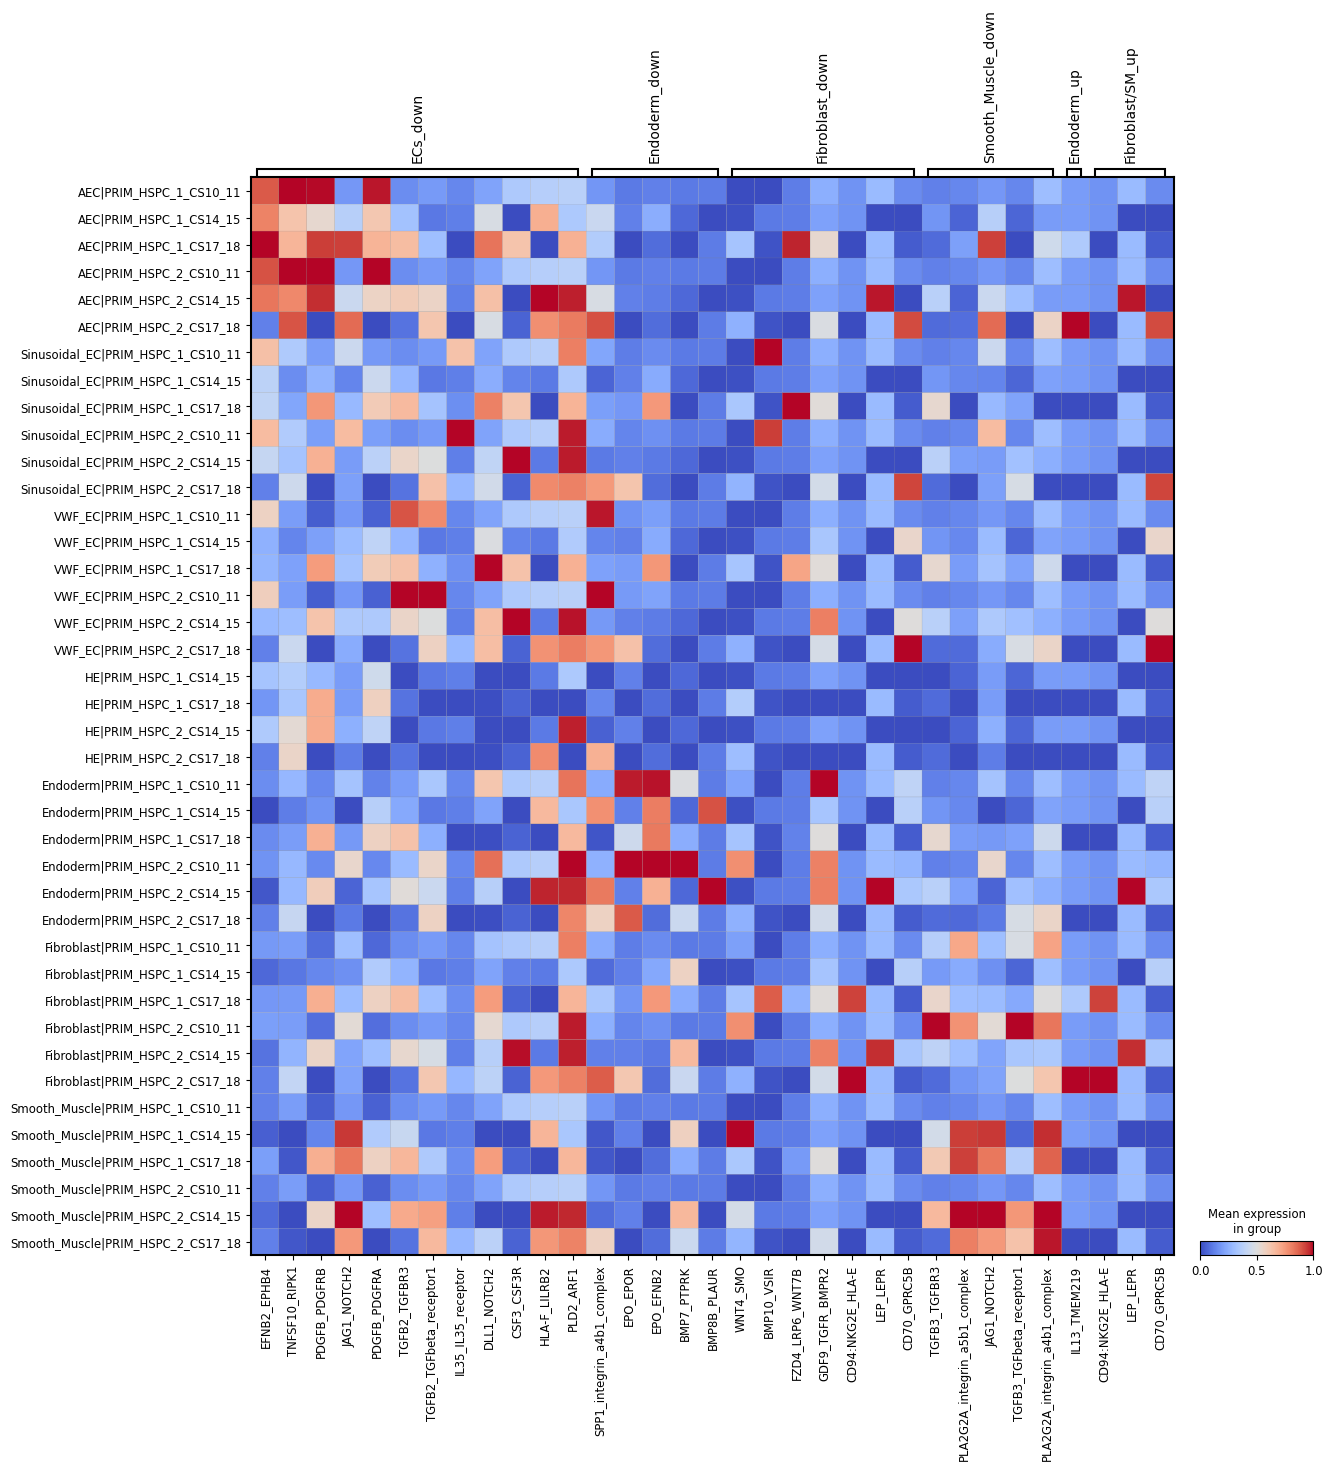

In [67]:
# adata.obs['stage_pair'] = adata.obs['stage_pair'].astype('category').cat.reorder_categories(list(exp_tbl_ordered.keys()))
# exp_tbl_ordered = {
# 'AEC': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2',],
                   
#  'VWF_EC': ['PDGFB_PDGFR complex','TGFB2_TGFBR3', 'TGFB2_TGFbeta receptor1','IL35_IL35 receptor','DLL1_NOTCH2','CSF3_CSF3R','HLA-F_LILRB2','PLD2_ARF1'],
                   
#  'Endoderm': ['SPP1_a4b1 complex',"EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
#  'Fibroblast': ['WNT4_SMO', 'BMP10_VSIR','WNT7B_FZD4','GDF9_TGFR_BMPR2','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
                   
#  'Smooth_Muscle': ['TGFB3_TGFBR3','PLA2G2A_a5b1 complex','JAG1_NOTCH2','TGFB3_TGFbeta receptor1','PLA2G2A_a4b1 complex'],
# }

exp_tbl_ordered = {
'AEC': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2',],
                   
 'VWF_EC': ['PDGFB_PDGFRA','TGFB2_TGFBR3', 'TGFB2_TGFbeta_receptor1','IL35_IL35_receptor','DLL1_NOTCH2','CSF3_CSF3R','HLA-F_LILRB2','PLD2_ARF1'],
                   
 'Endoderm': ['SPP1_integrin_a4b1_complex',"EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
 'Fibroblast': ['WNT4_SMO', 'BMP10_VSIR','FZD4_LRP6_WNT7B','GDF9_TGFR_BMPR2','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
                   
 'Smooth_Muscle': ['TGFB3_TGFBR3','PLA2G2A_integrin_a5b1_complex','JAG1_NOTCH2','TGFB3_TGFbeta_receptor1','PLA2G2A_integrin_a4b1_complex'],
    

}
exp_tbl_ordered = {
'ECs_down': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2','PDGFB_PDGFRA','TGFB2_TGFBR3', 'TGFB2_TGFbeta_receptor1','IL35_IL35_receptor','DLL1_NOTCH2','CSF3_CSF3R','HLA-F_LILRB2','PLD2_ARF1'],
                   
 'Endoderm_down': ['SPP1_integrin_a4b1_complex',"EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
 'Fibroblast_down': ['WNT4_SMO', 'BMP10_VSIR','FZD4_LRP6_WNT7B','GDF9_TGFR_BMPR2','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
                   
 'Smooth_Muscle_down': ['TGFB3_TGFBR3','PLA2G2A_integrin_a5b1_complex','JAG1_NOTCH2','TGFB3_TGFbeta_receptor1','PLA2G2A_integrin_a4b1_complex'],
'Endoderm_up':['IL13_TMEM219'],
'Fibroblast/SM_up':['CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],

}

(sc.pl.matrixplot(adata_prim, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'A1_V2_YS_PRIM_HSPC_maintenance_molecules_for_main.pdf')) # title=i
#(sc.pl.dotplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'YS_HSPC_maintenance_molecules_for_main.pdf')) # title=i
#(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'HSPC_maintenance_molecules_for_supp.pdf')) # title=i

In [68]:
adata_def = adata[adata.obs['stage_pair'].str.contains('DEF')]
ordering = [
'AEC|DEF_HSPC_1_CS10_11',
'AEC|DEF_HSPC_1_CS14_15',
'AEC|DEF_HSPC_1_CS17_18',
'AEC|DEF_HSPC_1_CS22_23',
            
'AEC|DEF_HSPC_2_CS10_11',
'AEC|DEF_HSPC_2_CS14_15',
'AEC|DEF_HSPC_2_CS17_18',
'AEC|DEF_HSPC_2_CS22_23',

'Sinusoidal_EC|DEF_HSPC_1_CS10_11',
'Sinusoidal_EC|DEF_HSPC_1_CS14_15',
'Sinusoidal_EC|DEF_HSPC_1_CS17_18',
'Sinusoidal_EC|DEF_HSPC_1_CS22_23',

'Sinusoidal_EC|DEF_HSPC_2_CS10_11',
'Sinusoidal_EC|DEF_HSPC_2_CS14_15',
'Sinusoidal_EC|DEF_HSPC_2_CS17_18',
'Sinusoidal_EC|DEF_HSPC_2_CS22_23',
 
'VWF_EC|DEF_HSPC_1_CS10_11',
'VWF_EC|DEF_HSPC_1_CS14_15',
'VWF_EC|DEF_HSPC_1_CS17_18',
'VWF_EC|DEF_HSPC_1_CS22_23',

'VWF_EC|DEF_HSPC_2_CS10_11',
'VWF_EC|DEF_HSPC_2_CS14_15',
'VWF_EC|DEF_HSPC_2_CS17_18',
'VWF_EC|DEF_HSPC_2_CS22_23',

 'HE|DEF_HSPC_1_CS14_15',
 'HE|DEF_HSPC_1_CS17_18',
 'HE|DEF_HSPC_2_CS14_15',
 'HE|DEF_HSPC_2_CS17_18',
 
'Endoderm|DEF_HSPC_1_CS10_11',
'Endoderm|DEF_HSPC_1_CS14_15',
'Endoderm|DEF_HSPC_1_CS17_18',
'Endoderm|DEF_HSPC_1_CS22_23',

'Endoderm|DEF_HSPC_2_CS10_11',
'Endoderm|DEF_HSPC_2_CS14_15',
'Endoderm|DEF_HSPC_2_CS17_18',
'Endoderm|DEF_HSPC_2_CS22_23',
    
'Fibroblast|DEF_HSPC_1_CS10_11',
'Fibroblast|DEF_HSPC_1_CS14_15',
'Fibroblast|DEF_HSPC_1_CS17_18',
'Fibroblast|DEF_HSPC_1_CS22_23',
    
'Fibroblast|DEF_HSPC_2_CS10_11',
'Fibroblast|DEF_HSPC_2_CS14_15',
'Fibroblast|DEF_HSPC_2_CS17_18',
'Fibroblast|DEF_HSPC_2_CS22_23',

'Smooth_Muscle|DEF_HSPC_1_CS10_11',
'Smooth_Muscle|DEF_HSPC_1_CS14_15',
'Smooth_Muscle|DEF_HSPC_1_CS17_18',
'Smooth_Muscle|DEF_HSPC_1_CS22_23',

'Smooth_Muscle|DEF_HSPC_2_CS10_11',
'Smooth_Muscle|DEF_HSPC_2_CS14_15',
'Smooth_Muscle|DEF_HSPC_2_CS17_18',
'Smooth_Muscle|DEF_HSPC_2_CS22_23',]
ordering = sorted(set(ordering) & set(list(adata.obs['stage_pair'].unique())), key = ordering.index)
adata_def.obs['stage_pair'] = adata_def.obs['stage_pair'].astype('category').cat.reorder_categories(ordering)

<ipython-input-68-df2fe83e3e45>:68: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_def.obs['stage_pair'] = adata_def.obs['stage_pair'].astype('category').cat.reorder_categories(ordering)


In [69]:
adata_def = adata_def[~adata_def.obs['stage_pair'].str.contains('CS10_11')]

/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.va

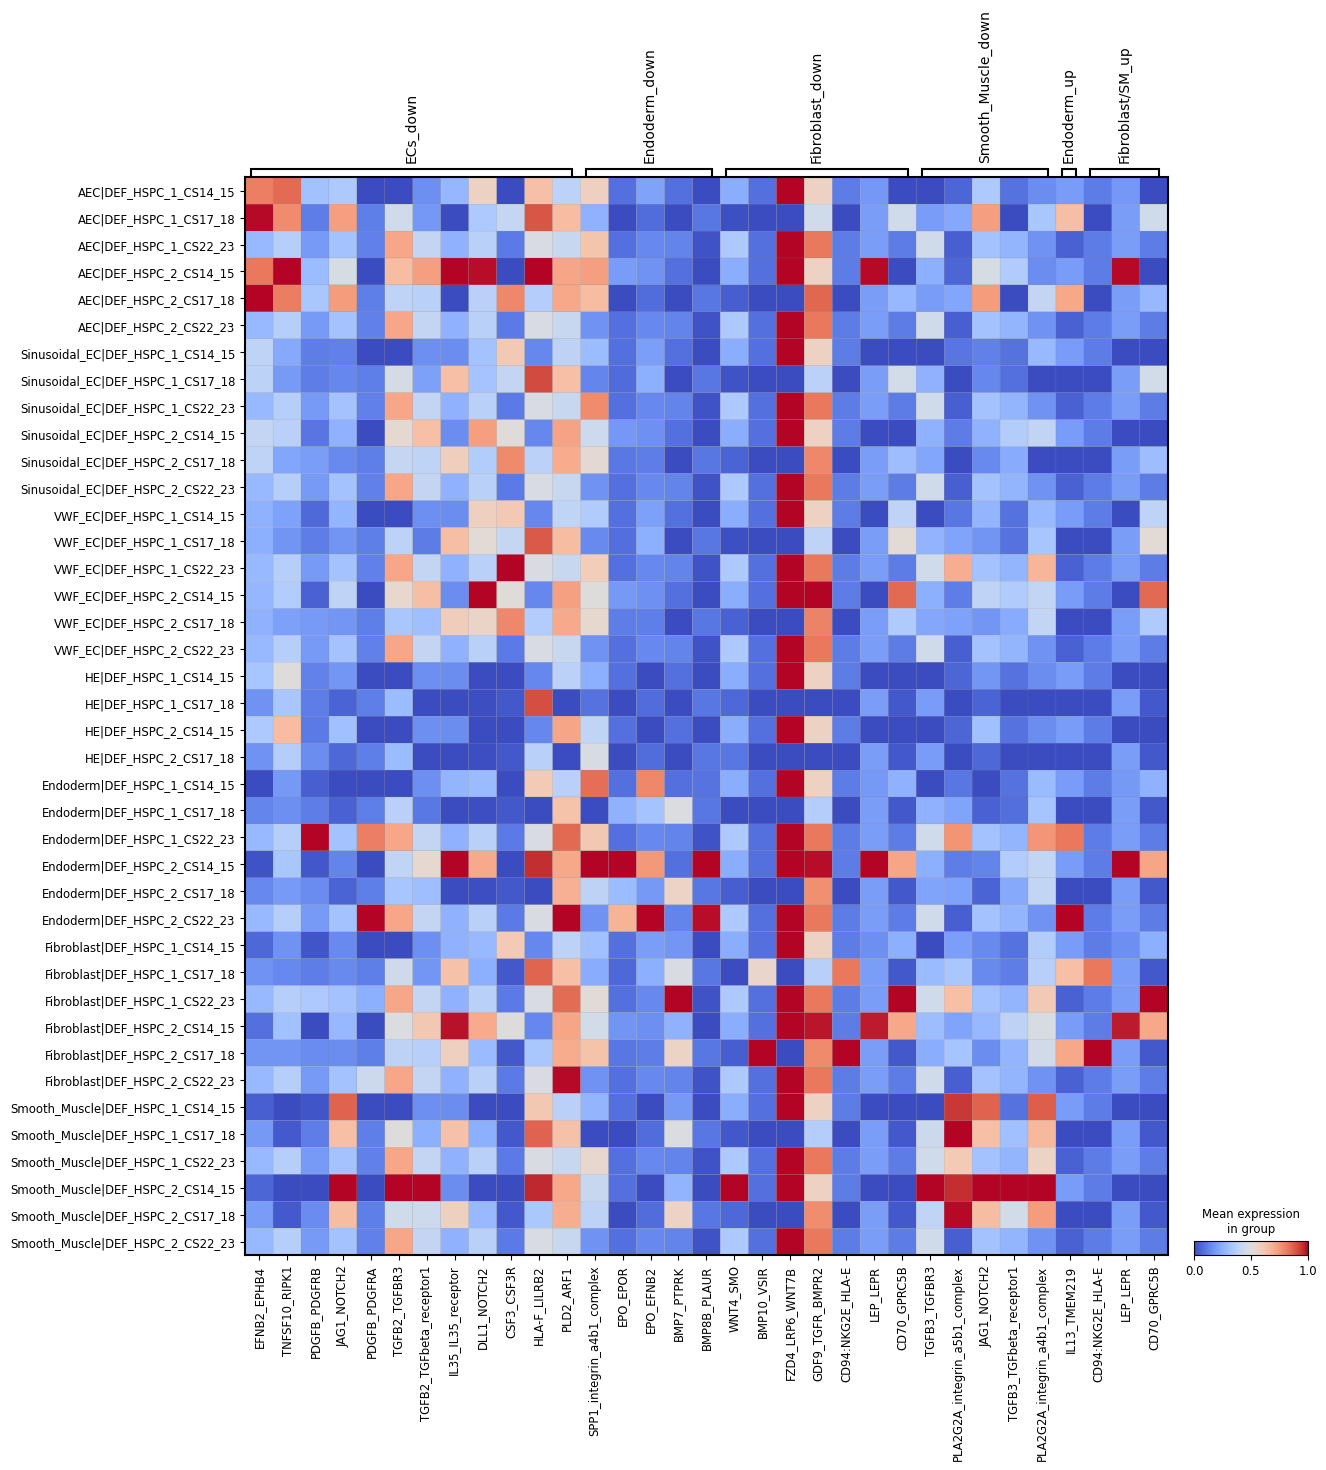

In [70]:
# adata.obs['stage_pair'] = adata.obs['stage_pair'].astype('category').cat.reorder_categories(list(exp_tbl_ordered.keys()))
# exp_tbl_ordered = {
# 'AEC': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2',],
                   
#  'VWF_EC': ['PDGFB_PDGFR complex','TGFB2_TGFBR3', 'TGFB2_TGFbeta receptor1','IL35_IL35 receptor','DLL1_NOTCH2','CSF3_CSF3R','HLA-F_LILRB2','PLD2_ARF1'],
                   
#  'Endoderm': ['SPP1_a4b1 complex',"EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
#  'Fibroblast': ['WNT4_SMO', 'BMP10_VSIR','WNT7B_FZD4','GDF9_TGFR_BMPR2','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
                   
#  'Smooth_Muscle': ['TGFB3_TGFBR3','PLA2G2A_a5b1 complex','JAG1_NOTCH2','TGFB3_TGFbeta receptor1','PLA2G2A_a4b1 complex'],
# }

exp_tbl_ordered = {
'ECs_down': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2','PDGFB_PDGFRA','TGFB2_TGFBR3', 'TGFB2_TGFbeta_receptor1','IL35_IL35_receptor','DLL1_NOTCH2','CSF3_CSF3R','HLA-F_LILRB2','PLD2_ARF1'],
                   
 'Endoderm_down': ['SPP1_integrin_a4b1_complex',"EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
 'Fibroblast_down': ['WNT4_SMO', 'BMP10_VSIR','FZD4_LRP6_WNT7B','GDF9_TGFR_BMPR2','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
                   
 'Smooth_Muscle_down': ['TGFB3_TGFBR3','PLA2G2A_integrin_a5b1_complex','JAG1_NOTCH2','TGFB3_TGFbeta_receptor1','PLA2G2A_integrin_a4b1_complex'],
'Endoderm_up':['IL13_TMEM219'],
'Fibroblast/SM_up':['CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],

}

(sc.pl.matrixplot(adata_def, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'A1_V2_YS_DEF_HSPC_maintenance_molecules_for_main.pdf')) # title=i
#(sc.pl.dotplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'YS_HSPC_maintenance_molecules_for_main.pdf')) # title=i
#(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'HSPC_maintenance_molecules_for_supp.pdf')) # title=i

In [71]:
exp_tbl_ordered = {
'ECs_down': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2','PDGFB_PDGFRA','TGFB2_TGFBR3', 'TGFB2_TGFbeta_receptor1','IL35_IL35_receptor','DLL1_NOTCH2','CSF3_CSF3R','HLA-F_LILRB2','PLD2_ARF1'],
                   
 'Endoderm_down': ['SPP1_integrin_a4b1_complex',"EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
 'Fibroblast_down': ['WNT4_SMO', 'BMP10_VSIR','FZD4_LRP6_WNT7B','GDF9_TGFR_BMPR2','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
                   
 'Smooth_Muscle_down': ['TGFB3_TGFBR3','PLA2G2A_integrin_a5b1_complex','JAG1_NOTCH2','TGFB3_TGFbeta_receptor1','PLA2G2A_integrin_a4b1_complex'],
'Endoderm_up':['IL13_TMEM219'],
'Fibroblast/SM_up':['CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
}

In [72]:
adata.var[adata.var.index.str.contains('LRP6')]

id_cp_interaction             partner_a      partner_b  \
interacting_pair                                                           
FZD10_LRP6_WNT1     CPI-CS0E7296DCC    complex:FZD10_LRP6  simple:P04628   
FZD10_LRP6_WNT11    CPI-CS0E9CB1664    complex:FZD10_LRP6  simple:O96014   
FZD10_LRP6_WNT2     CPI-CS01A368203    complex:FZD10_LRP6  simple:P09544   
FZD10_LRP6_WNT3     CPI-CS0E310104C    complex:FZD10_LRP6  simple:P56703   
FZD10_LRP6_WNT5A    CPI-CS0B3F661F1    complex:FZD10_LRP6  simple:P41221   
...                             ...                   ...            ...   
Kremen2_LRP6_DKK1   CPI-CS0D1C23747  complex:Kremen2_LRP6  simple:O94907   
Kremen2_LRP6_DKK2   CPI-CS0730C30B0  complex:Kremen2_LRP6  simple:Q9UBU2   
LRP6_DKK1           CPI-SS0D68CB038         simple:O75581  simple:O94907   
LRP6_DKK2           CPI-SS04D1D0B92         simple:O75581  simple:Q9UBU2   
LRP6_SOSTDC1        CPI-SS0AC2DA159         simple:O75581  simple:Q6X4U4   

                  gene_a   gene_b secreted receptor_a receptor_b  \
interacting_pair                                                   
FZD10_LRP6_WNT1      nan     WNT1     True      False      False   
FZD10_LRP6_WNT11     nan    WNT11     True      False      False   
FZD10_LRP6_WNT2      nan     WNT2     True      False      False   
FZD10_LRP6_WNT3      nan     WNT3     True      False      False   
FZD10_LRP6_WNT5A     nan    WNT5A     True      False      False   
...                  ...      ...      ...        ...        ...   
Kremen2_LRP6_DKK1    nan     DKK1     True      False      False   
Kremen2_LRP6_DKK2    nan     DKK2     True      False      False   
LRP6_DKK1           LRP6     DKK1     True       True      False   
LRP6_DKK2           LRP6     DKK2     True       True      False   
LRP6_SOSTDC1        LRP6  SOSTDC1     True       True      False   

                  annotation_strategy is_integrin      mean       std  \
interacting_pair                                                        
FZD10_LRP6_WNT1               curated       False  0.012750  0.037484   
FZD10_LRP6_WNT11              curated       False  0.002286  0.012095   
FZD10_LRP6_WNT2               curated       False  0.002286  0.012095   
FZD10_LRP6_WNT3               curated       False  0.011571  0.034020   
FZD10_LRP6_WNT5A              curated       False  0.008000  0.042332   
...                               ...         ...       ...       ...   
Kremen2_LRP6_DKK1             curated       False  0.000333  0.001167   
Kremen2_LRP6_DKK2             curated       False  0.000964  0.005103   
LRP6_DKK1                     curated       False  0.024542  0.051284   
LRP6_DKK2                     curated       False  0.053536  0.104291   
LRP6_SOSTDC1                  curated       False  0.024875  0.051883   

                   total_expression  
interacting_pair                     
FZD10_LRP6_WNT1                 NaN  
FZD10_LRP6_WNT11                NaN  
FZD10_LRP6_WNT2                 NaN  
FZD10_LRP6_WNT3                 NaN  
FZD10_LRP6_WNT5A                NaN  
...                             ...  
Kremen2_LRP6_DKK1               NaN  
Kremen2_LRP6_DKK2               NaN  
LRP6_DKK1                       NaN  
LRP6_DKK2                       NaN  
LRP6_SOSTDC1                    NaN  

[89 rows x 13 columns]

In [73]:
adata_exp.var[adata_exp.var.index.str.contains('LRP6')]

n_cells-0   mt-0  total_counts-0  highly_variable-0  intersect-0  \
LRP6       12685  False         16390.0              False         True   
NLRP6         69  False            71.0              False        False   

        means-0  dispersions-0  dispersions_norm-0       gene_ids-3  \
LRP6   0.122785       0.901179            0.450227  ENSG00000070018   
NLRP6  0.000649       0.616208           -0.059616  ENSG00000174885   

       feature_types-3 genome-3  n_cells     mt  n_cells_by_counts  \
LRP6   Gene Expression   GRCh38    20122  False              19038   
NLRP6  Gene Expression   GRCh38       84  False                 80   

       mean_counts  pct_dropout_by_counts  total_counts      mean  std  
LRP6       0.15493              88.861195       26480.0  0.298786  1.0  
NLRP6      0.00048              99.953193          82.0  0.021435  1.0

In [96]:
dict_li = {}
dict_r = {}
for key in exp_tbl_ordered.keys():
    dict_li[key] = list(adata.var.loc[exp_tbl_ordered[key],'gene_a'])
    dict_r[key] = list(adata.var.loc[exp_tbl_ordered[key],'gene_b'] )
    
# dict_li = {'ECs': ['EFNB2', 'TNFSF10', 'PDGFB', 'JAG1', 'TGFB2', 'EBI3', 'DLL1', 'CSF3', 'HLA-F', 'PLD2'],
#  'Endoderm': ['SPP1', 'EPO', 'EPO', 'BMP7', 'BMP8B'],
#  'Fibroblast': ['WNT4', 'BMP10', 'LRP6', 'GDF9', 'KLRD1', 'LEP', 'CD70'],
#  'Smooth_Muscle': ['TGFB3', 'PLA2G2A', 'JAG1', 'TGFB3', 'PLA2G2A'],
#  'Endoderm_up': ['IL13'],
#  'Fibroblast/SM_up': ['KLRD1', 'LEP', 'CD70']}

dict_li = {'ECs': ['EFNB2', 'TNFSF10', 'PDGFB', 'JAG1', 'TGFB2', 'EBI3', 'DLL1', 'CSF3'],
 'Endoderm': ['PLD2', 'EPO', 'EPO', 'BMP7', 'BMP8B'],
 'Fibroblast': ['WNT4', 'BMP10', 'WNT7B', 'GDF9'],
 'Smooth_Muscle': ['TGFB3', 'PLA2G2A', 'TGFB3', 'PLA2G2A'],
 'Endoderm_up': ['IL13'],
 'Fibroblast/SM_up': ['KLRD1', 'LEP', 'CD70']}

dict_r = {'ECs': ['EPHB4', 'RIPK1', 'PDGFRB', 'NOTCH2','TGFBR1','IL12RB2','NOTCH2','CSF3R'],
 'Endoderm': ['ARF1', 'EPOR', 'EFNB2', 'PTPRK', 'PLAUR'],
 'Fibroblast': ['SMO', 'VSIR', 'WNT7B', 'BMPR2'],
 'Smooth_Muscle': ['TGFBR3', 'ITGA5','ITGB1', 'TGFBR1', 'ITGA4'],
'Endoderm_up': ['TMEM219'],
 'Fibroblast/SM_up': ['HLA-E', 'LEPR', 'GPRC5B']}

# HSPC_dotplot

In [97]:
li = (adata_def.obs['stage_pair'].cat.categories.str.replace('[|]DEF_HSPC_1',''))
li = li.str.replace('[|]DEF_HSPC_2','')
list(li)

li = (adata_prim.obs['stage_pair'].cat.categories.str.replace('[|]PRIM_HSPC_1',''))
li = li.str.replace('[|]PRIM_HSPC_2','')
list(li)

<ipython-input-97-74e6624ddb91>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  li = (adata_def.obs['stage_pair'].cat.categories.str.replace('[|]DEF_HSPC_1',''))
<ipython-input-97-74e6624ddb91>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  li = li.str.replace('[|]DEF_HSPC_2','')
<ipython-input-97-74e6624ddb91>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  li = (adata_prim.obs['stage_pair'].cat.categories.str.replace('[|]PRIM_HSPC_1',''))
<ipython-input-97-74e6624ddb91>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  li = li.str.replace('[|]PRIM_HSPC_2','')


['AEC_CS10_11',
 'AEC_CS14_15',
 'AEC_CS17_18',
 'AEC_CS10_11',
 'AEC_CS14_15',
 'AEC_CS17_18',
 'Sinusoidal_EC_CS10_11',
 'Sinusoidal_EC_CS14_15',
 'Sinusoidal_EC_CS17_18',
 'Sinusoidal_EC_CS10_11',
 'Sinusoidal_EC_CS14_15',
 'Sinusoidal_EC_CS17_18',
 'VWF_EC_CS10_11',
 'VWF_EC_CS14_15',
 'VWF_EC_CS17_18',
 'VWF_EC_CS10_11',
 'VWF_EC_CS14_15',
 'VWF_EC_CS17_18',
 'HE_CS14_15',
 'HE_CS17_18',
 'HE_CS14_15',
 'HE_CS17_18',
 'Endoderm_CS10_11',
 'Endoderm_CS14_15',
 'Endoderm_CS17_18',
 'Endoderm_CS10_11',
 'Endoderm_CS14_15',
 'Endoderm_CS17_18',
 'Fibroblast_CS10_11',
 'Fibroblast_CS14_15',
 'Fibroblast_CS17_18',
 'Fibroblast_CS10_11',
 'Fibroblast_CS14_15',
 'Fibroblast_CS17_18',
 'Smooth_Muscle_CS10_11',
 'Smooth_Muscle_CS14_15',
 'Smooth_Muscle_CS17_18',
 'Smooth_Muscle_CS10_11',
 'Smooth_Muscle_CS14_15',
 'Smooth_Muscle_CS17_18']

<ipython-input-152-a5bc4f45bc21>:61: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_exp_hspc.obs['stage_label'] = adata_exp_hspc.obs['stage_label'].astype('category').cat.reorder_categories(HSPC_order)


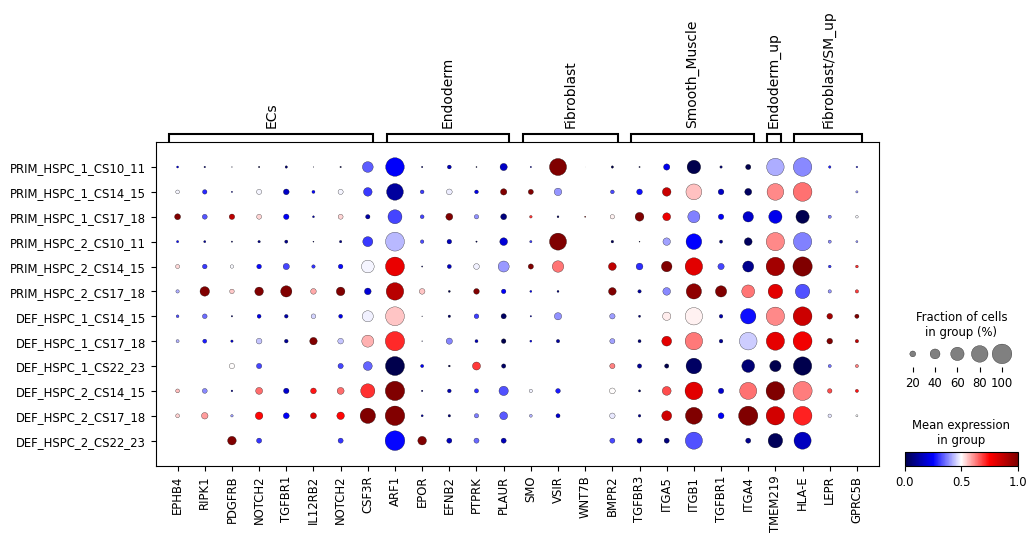

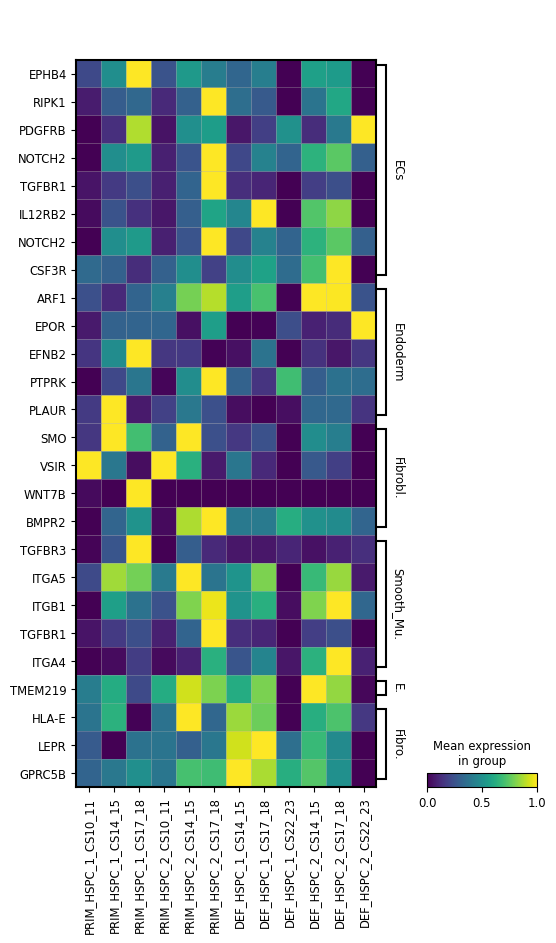

In [152]:
stages = ['CS7', 
'CS10',
'CS11',
'CS14',
'CS15',
'CS17',
'CS18',
'CS22',
'CS23',
'7PCW',
'8PCW',
'9PCW',
'11PCW',
'12PCW',
'13PCW',
'14PCW',
'15PCW',
'16PCW',
'17PCW',
'19PCW',
'iPSC',]
stage_groups = [
'CS7', 
'CS10_11',
'CS10_11',
'CS14_15',
'CS14_15',
'CS17_18',
'CS17_18',
'CS22_23',
'CS22_23',
'7PCW',
'8PCW',
'9PCW',
'11PCW',
'12PCW',
'13PCW',
'14PCW',
'15PCW',
'16PCW',
'17PCW',
'19PCW',
'iPSC',]
stage_mapper = dict(zip(stages,stage_groups))
adata_exp.obs['stage_groups'] = adata_exp.obs['stage'].astype(str).map(stage_mapper)

HSPC_order = ['PRIM_HSPC_1_CS10_11',
 'PRIM_HSPC_1_CS14_15',
 'PRIM_HSPC_1_CS17_18',
 'PRIM_HSPC_2_CS10_11',
 'PRIM_HSPC_2_CS14_15',
 'PRIM_HSPC_2_CS17_18',
'DEF_HSPC_1_CS14_15',
 'DEF_HSPC_1_CS17_18',
 'DEF_HSPC_1_CS22_23',
 'DEF_HSPC_2_CS14_15',
 'DEF_HSPC_2_CS17_18',
 'DEF_HSPC_2_CS22_23']
adata_exp.obs['stage_label'] = adata_exp.obs['cell_labels_lvl3'].astype(str) +'_'+adata_exp.obs['stage_groups'].astype(str)
adata_exp_hspc = adata_exp[adata_exp.obs['stage_label'].isin(HSPC_order)]
adata_exp_hspc.obs['stage_label'] = adata_exp_hspc.obs['stage_label'].astype('category').cat.reorder_categories(HSPC_order)

(sc.pl.dotplot(adata_exp_hspc, var_names = dict_r, groupby='stage_label',dendrogram=False,standard_scale='var', color_map='seismic', show = True,swap_axes = False)) # title=i
mp = (sc.pl.matrixplot(adata_exp_hspc, var_names = dict_r, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = True,return_fig=True,save = 'A1_V3_YS_HSPC_maintenance_molecules_for_main.pdf'))
mp.show()
# mp.add_totals().show()
# mp.savefig('A1_V3_YS_HSPC_maintenance_molecules_for_main.pdf', bbox_inches = 'tight',dpi = 300)
#dp.add_totals().style(edge_color='black').show()

In [156]:
mp.width

5.9399999999999995

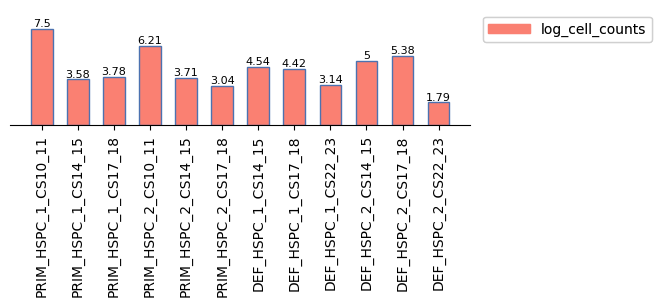

In [178]:
from matplotlib import rcParams
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
width = 0.6
counts = pd.DataFrame(adata_exp_hspc.obs.groupby('stage_label').apply(len),columns = ['c'])
counts['log_c'] = np.log(counts['c']).round(2)
fig, ax = plt.subplots(figsize=(mp.width,1.5),frameon=False)    
bars = ax.bar(x = counts.index, height = counts['log_c'], width = width, bottom=None, align='center', data=None,color = '#FA8072', edgecolor='b')
ax.tick_params(axis='x', labelrotation=90)
ax.tick_params(axis='y', labelrotation=90)
ax.set_ylim([0, max(counts['log_c'])+1.5])
ax.bar_label(bars,fontsize=15,rotation=90,padding = 3)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

patch = mpatches.Patch(color='#FA8072', label='log_cell_counts')
legend_1 = plt.legend(handles=[patch],bbox_to_anchor=(1.41, 1), handlelength=3)
ax.add_artist(legend_1)
fig.savefig('A1_V3_bars_YS_HSPC_maintenance_molecules_for_main.pdf', bbox_inches = 'tight',dpi = 300)


In [99]:
np.max(adata_exp_stroma.X)

31635.0

<ipython-input-206-7ff1d6dd40f7>:29: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_exp_stroma.obs['stage_label'] = adata_exp_stroma.obs['stage_label'].astype('category').cat.reorder_categories(stroma_order)


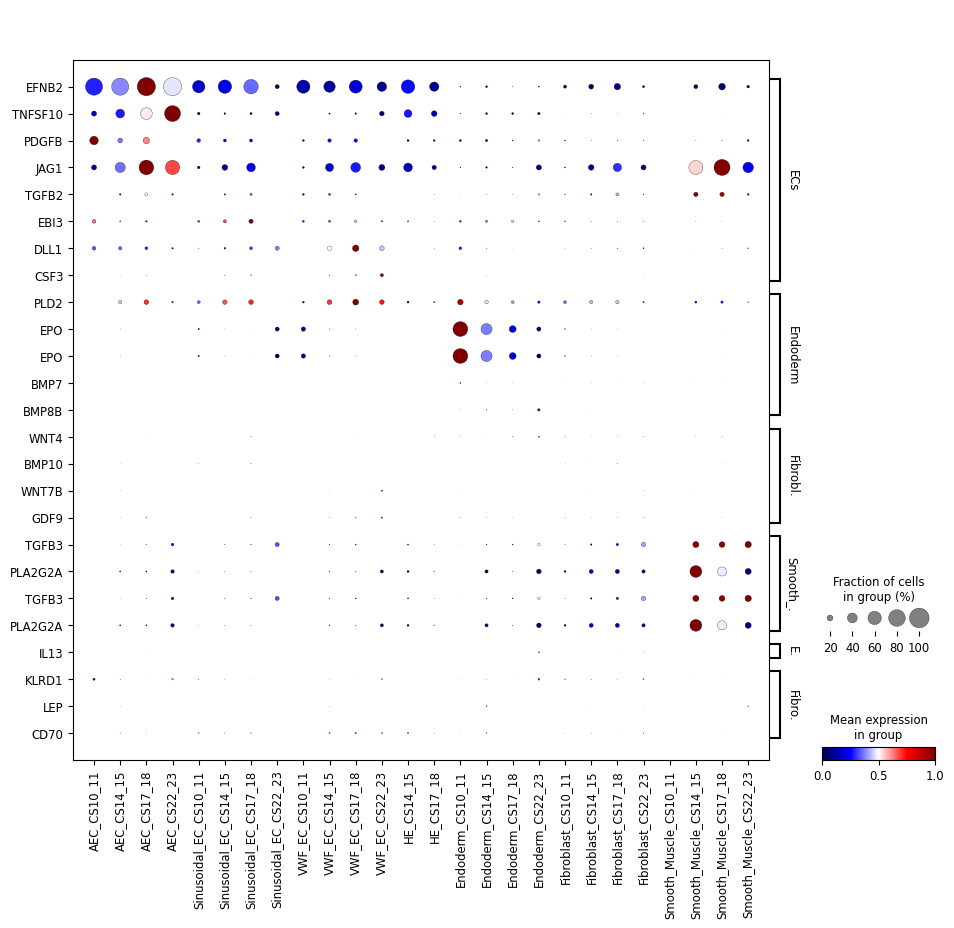

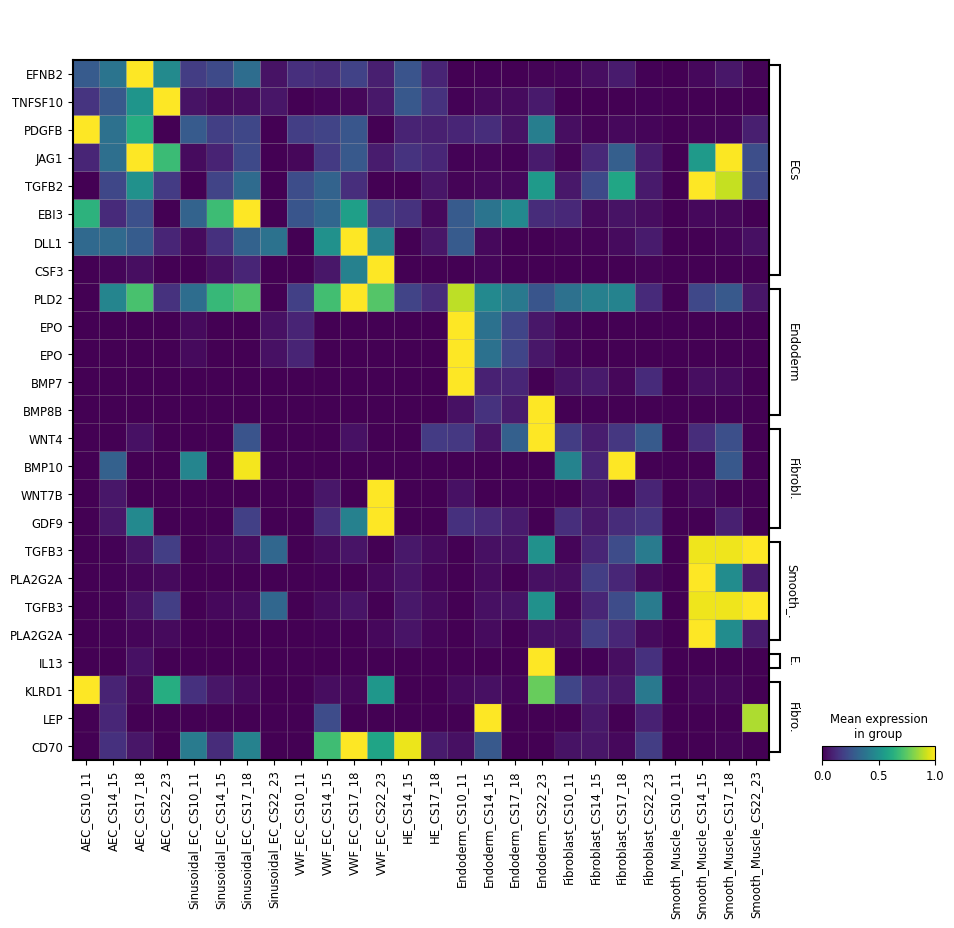

In [206]:
stroma_order = ['AEC_CS10_11',
 'AEC_CS14_15',
 'AEC_CS17_18',
 'AEC_CS22_23',
 'Sinusoidal_EC_CS10_11',
 'Sinusoidal_EC_CS14_15',
 'Sinusoidal_EC_CS17_18',
 'Sinusoidal_EC_CS22_23',
 'VWF_EC_CS10_11',
 'VWF_EC_CS14_15',
 'VWF_EC_CS17_18',
 'VWF_EC_CS22_23',
 'HE_CS14_15',
 'HE_CS17_18',
'Endoderm_CS10_11',
 'Endoderm_CS14_15',
 'Endoderm_CS17_18',
 'Endoderm_CS22_23',
'Fibroblast_CS10_11',
 'Fibroblast_CS14_15',
 'Fibroblast_CS17_18',
 'Fibroblast_CS22_23',
 'Smooth_Muscle_CS10_11',
 'Smooth_Muscle_CS14_15',
 'Smooth_Muscle_CS17_18',
 'Smooth_Muscle_CS22_23',]
adata_exp.obs['stage_label'] = adata_exp.obs['cell_labels_lvl3'].astype(str) +'_'+adata_exp.obs['stage_groups'].astype(str)
adata_exp_stroma = adata_exp[adata_exp.obs['stage_label'].isin(stroma_order)]
adata_exp_stroma.obs['stage_label'] = adata_exp_stroma.obs['stage_label'].astype('category').cat.reorder_categories(stroma_order)

(sc.pl.dotplot(adata_exp_stroma, var_names = dict_li, groupby='stage_label',dendrogram=False,standard_scale='var', color_map='seismic', show = True,swap_axes = True)) # title=i
# dp = (sc.pl.matrixplot(adata_exp_stroma, var_names = dict_li, groupby='stage_label',dendrogram=False,standard_scale='var',cmap = 'red', show = True,swap_axes = True, return_fig=True)) 
# dp.add_totals().style(edge_color='black').show()
mp = (sc.pl.matrixplot(adata_exp_stroma, var_names = dict_li, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = True, return_fig=True,save = 'A1_V3_YS_stroma_maintenance_molecules_for_main.pdf')) 
mp.show()

In [207]:
counts

c  log_c
stage_label                               
AEC_CS10_11                      18   2.89
AEC_CS14_15                     575   6.35
AEC_CS17_18                    1085   6.99
AEC_CS22_23                      29   3.37
Prolif_AEC_CS10_11                1   0.00
Prolif_AEC_CS14_15               44   3.78
Prolif_AEC_CS17_18              135   4.91
Prolif_AEC_CS22_23                1   0.00
HE_CS14_15                       41   3.71
HE_CS17_18                      273   5.61
Sinusoidal_EC_CS10_11           387   5.96
Sinusoidal_EC_CS14_15           658   6.49
Sinusoidal_EC_CS17_18           719   6.58
Sinusoidal_EC_CS22_23             8   2.08
Prolif_Sinusoidal_EC_CS10_11     31   3.43
Prolif_Sinusoidal_EC_CS14_15    488   6.19
Prolif_Sinusoidal_EC_CS17_18    700   6.55
VWF_EC_CS10_11                   22   3.09
VWF_EC_CS14_15                  548   6.31
VWF_EC_CS17_18                 1016   6.92
VWF_EC_CS22_23                   34   3.53
Immature_EC_CS10_11              25   3.22
Immature_EC_CS14_15             488   6.19
Immature_EC_CS17_18             963   6.87
Immature_EC_CS22_23              10   2.30
Fibroblast_CS10_11              788   6.67
Fibroblast_CS14_15             6982   8.85
Fibroblast_CS17_18            20290   9.92
Fibroblast_CS22_23              670   6.51
Smooth_Muscle_CS10_11             1   0.00
Smooth_Muscle_CS14_15          1107   7.01
Smooth_Muscle_CS17_18          3927   8.28
Smooth_Muscle_CS22_23            71   4.26
Endoderm_CS10_11               1458   7.28
Endoderm_CS14_15                873   6.77
Endoderm_CS17_18               5278   8.57
Endoderm_CS22_23                 47   3.85

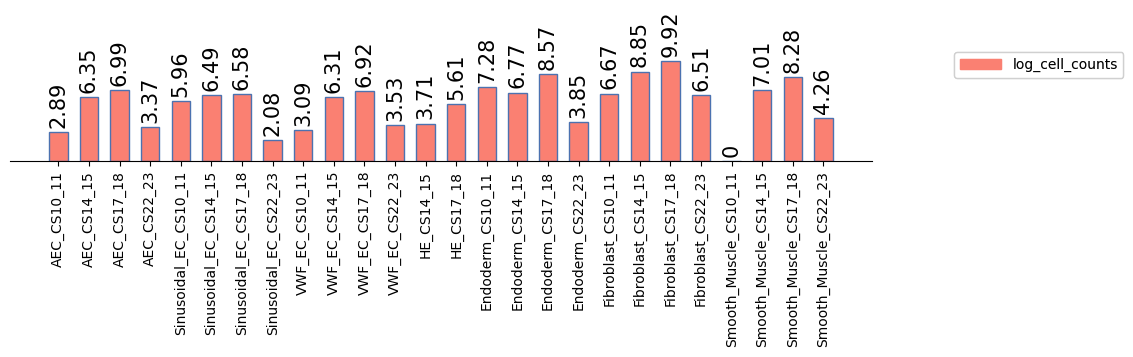

In [211]:
from matplotlib import rcParams
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
width = 0.6
counts = pd.DataFrame(adata_exp_stroma.obs.groupby('stage_label').apply(len),columns = ['c'])
counts['log_c'] = np.log(counts['c']).round(2)
fig, ax = plt.subplots(figsize=(mp.width,1.5),frameon=False)    
bars = ax.bar(x = counts.index, height = counts['log_c'], width = width, bottom=None, align='center', data=None,color = '#FA8072', edgecolor='b')
ax.tick_params(axis='x', labelrotation=90)
ax.tick_params(axis='y', labelrotation=90)
ax.set_ylim([0, max(counts['log_c'])+1.5])
ax.bar_label(bars,fontsize=15,rotation=90,padding = 3)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

patch = mpatches.Patch(color='#FA8072', label='log_cell_counts')
legend_1 = plt.legend(handles=[patch],bbox_to_anchor=(1.3, 1), handlelength=3)
ax.add_artist(legend_1)
fig.savefig('A1_V3_bars_YS_STROMA_maintenance_molecules_for_main.pdf', bbox_inches = 'tight',dpi = 300)

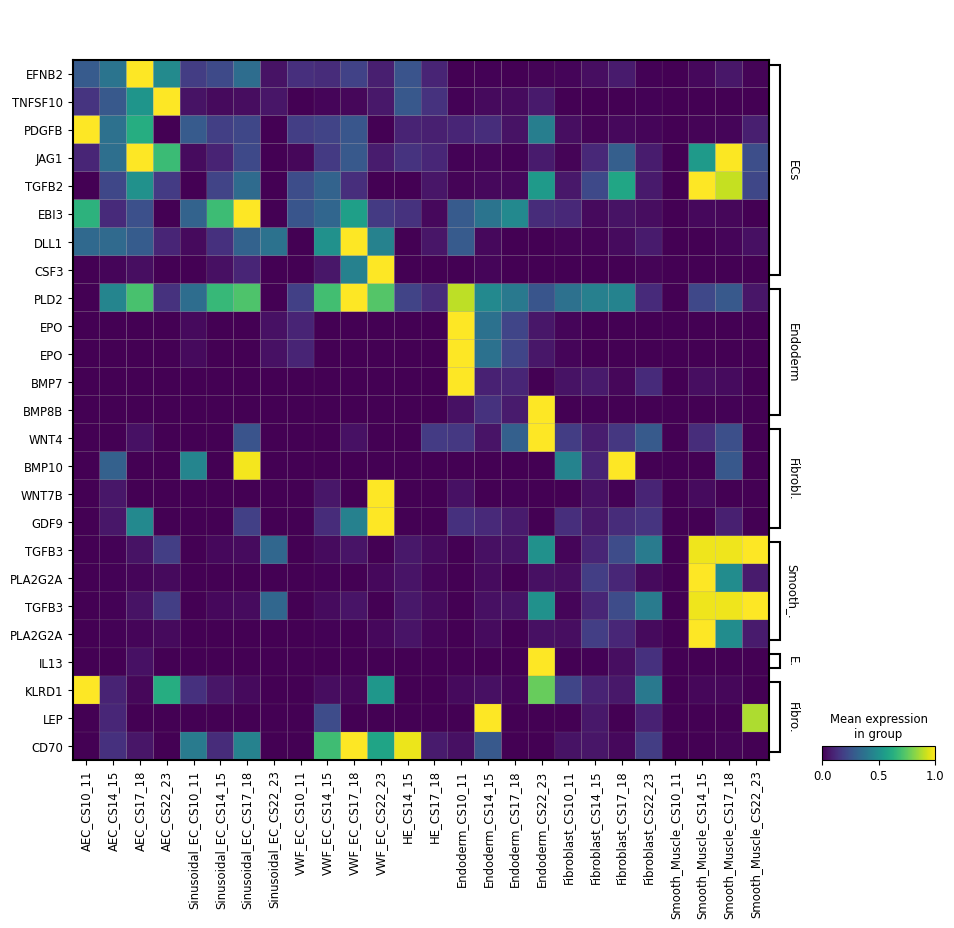

In [101]:
(sc.pl.matrixplot(adata_exp_stroma, var_names = dict_li, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = True, return_fig=False,save = 'A1_V2_YS_stroma_maintenance_molecules_for_main.pdf')) 

In [102]:
set(stroma_order )

{'AEC_CS10_11',
 'AEC_CS14_15',
 'AEC_CS17_18',
 'AEC_CS22_23',
 'Endoderm_CS10_11',
 'Endoderm_CS14_15',
 'Endoderm_CS17_18',
 'Endoderm_CS22_23',
 'Fibroblast_CS10_11',
 'Fibroblast_CS14_15',
 'Fibroblast_CS17_18',
 'Fibroblast_CS22_23',
 'HE_CS14_15',
 'HE_CS17_18',
 'Sinusoidal_EC_CS10_11',
 'Sinusoidal_EC_CS14_15',
 'Sinusoidal_EC_CS17_18',
 'Sinusoidal_EC_CS22_23',
 'Smooth_Muscle_CS10_11',
 'Smooth_Muscle_CS14_15',
 'Smooth_Muscle_CS17_18',
 'Smooth_Muscle_CS22_23',
 'VWF_EC_CS10_11',
 'VWF_EC_CS14_15',
 'VWF_EC_CS17_18',
 'VWF_EC_CS22_23'}

In [103]:
adata_exp_stroma.obs['stage_label']

Wang_et_al_AAACCTGAGACCTTTG_1-0    Sinusoidal_EC_CS10_11
Wang_et_al_AAACCTGGTGTGAATA_1-0         Endoderm_CS10_11
Wang_et_al_AAAGCAATCTTAGAGC_1-0         Endoderm_CS10_11
Wang_et_al_AAATGCCAGAGTAATC_1-0         Endoderm_CS10_11
Wang_et_al_AAATGCCCAAGAAAGG_1-0         Endoderm_CS10_11
                                           ...          
TTTGTCAGTCCAGTAT-1-5-3                Fibroblast_CS17_18
TTTGTCAGTCCGTCAG-1-5-3                Fibroblast_CS17_18
TTTGTCATCAGGTAAA-1-5-3                Fibroblast_CS17_18
TTTGTCATCCTCTAGC-1-5-3                Fibroblast_CS17_18
TTTGTCATCTGACCTC-1-5-3                Fibroblast_CS17_18
Name: stage_label, Length: 46905, dtype: category
Categories (26, object): ['AEC_CS10_11', 'AEC_CS14_15', 'AEC_CS17_18', 'AEC_CS22_23', ..., 'Smooth_Muscle_CS10_11', 'Smooth_Muscle_CS14_15', 'Smooth_Muscle_CS17_18', 'Smooth_Muscle_CS22_23']

In [550]:
adata_exp.obs['stage_label'] = adata_exp.obs['cell_labels_lvl3'].astype(str) +'_'+adata_exp.obs['stage'].astype(str)

In [551]:
adata_exp.obs['stage_label']

Wang_et_al_AAACCTGAGACCTTTG_1-0    Sinusoidal_EC_CS10
Wang_et_al_AAACCTGCACTTAAGC_1-0      PRIM_HSPC_1_CS10
Wang_et_al_AAACCTGGTAACGACG_1-0        Erythroid_CS10
Wang_et_al_AAACCTGGTCAAAGAT_1-0        Erythroid_CS10
Wang_et_al_AAACCTGGTCCGAAGA_1-0        Erythroid_CS10
                                          ...        
TTTGTCATCCTCTAGC-1-5-3                Fibroblast_CS17
TTTGTCATCGCCGTGA-1-5-3                 Erythroid_CS17
TTTGTCATCGTTTAGG-1-5-3                Macrophage_CS17
TTTGTCATCTGACCTC-1-5-3                Fibroblast_CS17
TTTGTCATCTGCTTGC-1-5-3                 Erythroid_CS17
Name: stage_label, Length: 169494, dtype: object

In [521]:
list(adata.var.loc[exp_tbl_ordered[key],'gene_a'])

['TGFB3', 'PLA2G2A', 'JAG1', 'TGFB3', 'PLA2G2A']

In [494]:
list(exp_tbl_ordered.items())

[('AEC', ['EFNB2_EPHB4', 'TNFSF10_RIPK1', 'PDGFB_PDGFRB', 'JAG1_NOTCH2']),
 ('VWF_EC',
  ['PDGFB_PDGFRA',
   'TGFB2_TGFBR3',
   'TGFB2_TGFbeta_receptor1',
   'IL35_IL35_receptor',
   'DLL1_NOTCH2',
   'CSF3_CSF3R',
   'HLA-F_LILRB2',
   'PLD2_ARF1']),
 ('Endoderm',
  ['SPP1_integrin_a4b1_complex',
   'EPO_EPOR',
   'EPO_EFNB2',
   'BMP7_PTPRK',
   'BMP8B_PLAUR']),
 ('Fibroblast',
  ['WNT4_SMO',
   'BMP10_VSIR',
   'FZD4_LRP6_WNT7B',
   'GDF9_TGFR_BMPR2',
   'CD94:NKG2E_HLA-E',
   'LEP_LEPR',
   'CD70_GPRC5B']),
 ('Smooth_Muscle',
  ['TGFB3_TGFBR3',
   'PLA2G2A_integrin_a5b1_complex',
   'JAG1_NOTCH2',
   'TGFB3_TGFbeta_receptor1',
   'PLA2G2A_integrin_a4b1_complex'])]

# Plot spotplot of interactions for Fig 4D

In [5]:
dict_li_2 = {
'PLVAP':['KITLG','DLL1','DLL1'],
'LYVE1':['JAG1','FBN1','CSF1'],
'Fibro/SMC':['WNT5A','DKL1'],
'Fibro/SMC':['VTN','THPO','FN1'],
}

<ipython-input-655-3ead2c57423d>:29: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_exp_stroma.obs['stage_label'] = adata_exp_stroma.obs['stage_label'].astype('category').cat.reorder_categories(stroma_order)


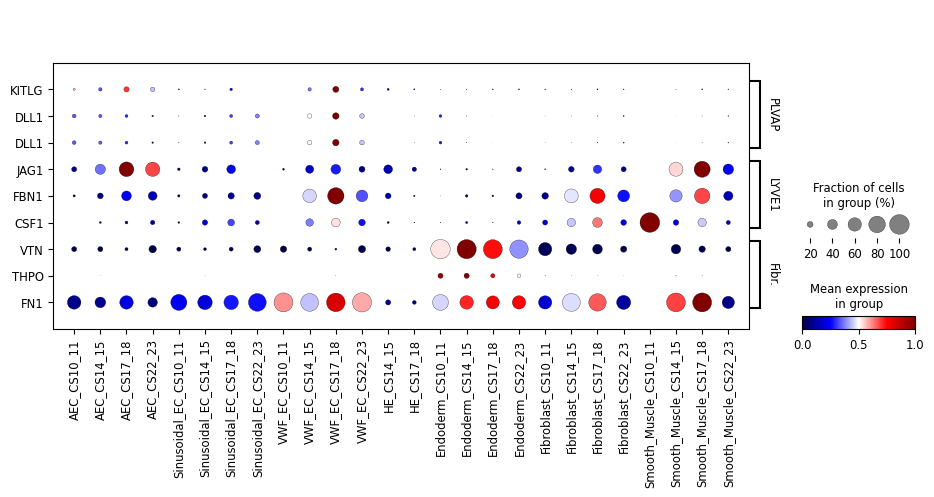

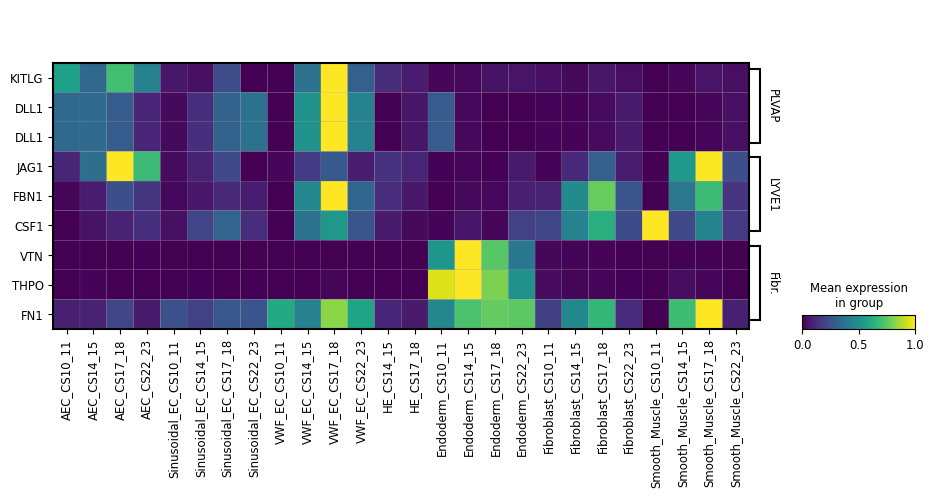

In [655]:
stroma_order = ['AEC_CS10_11',
 'AEC_CS14_15',
 'AEC_CS17_18',
 'AEC_CS22_23',
 'Sinusoidal_EC_CS10_11',
 'Sinusoidal_EC_CS14_15',
 'Sinusoidal_EC_CS17_18',
 'Sinusoidal_EC_CS22_23',
 'VWF_EC_CS10_11',
 'VWF_EC_CS14_15',
 'VWF_EC_CS17_18',
 'VWF_EC_CS22_23',
 'HE_CS14_15',
 'HE_CS17_18',
'Endoderm_CS10_11',
 'Endoderm_CS14_15',
 'Endoderm_CS17_18',
 'Endoderm_CS22_23',
'Fibroblast_CS10_11',
 'Fibroblast_CS14_15',
 'Fibroblast_CS17_18',
 'Fibroblast_CS22_23',
 'Smooth_Muscle_CS10_11',
 'Smooth_Muscle_CS14_15',
 'Smooth_Muscle_CS17_18',
 'Smooth_Muscle_CS22_23',]
adata_exp.obs['stage_label'] = adata_exp.obs['cell_labels_lvl3'].astype(str) +'_'+adata_exp.obs['stage_groups'].astype(str)
adata_exp_stroma = adata_exp[adata_exp.obs['stage_label'].isin(stroma_order)]
adata_exp_stroma.obs['stage_label'] = adata_exp_stroma.obs['stage_label'].astype('category').cat.reorder_categories(stroma_order)

(sc.pl.dotplot(adata_exp_stroma, var_names = dict_li_2, groupby='stage_label',dendrogram=False,standard_scale='var', color_map='seismic', show = True,swap_axes = True)) # title=i
# dp = (sc.pl.matrixplot(adata_exp_stroma, var_names = dict_li, groupby='stage_label',dendrogram=False,standard_scale='var',cmap = 'red', show = True,swap_axes = True, return_fig=True)) 
# dp.add_totals().style(edge_color='black').show()
(sc.pl.matrixplot(adata_exp_stroma, var_names = dict_li_2, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = True, return_fig=False,save = 'A1_V2_YS_stroma_maintenance_molecules_for_main.pdf')) 

# HSPCs

In [79]:
li = {'ENDODERM':[,'PROC','DLK1'],
     'AEC':['IGF2'],}

rt = {'ENDOERM':['IGF1R','PROCR','NOTCH4'],}

In [664]:
adata_exp.var[adata_exp.var.index.str.contains('ITGA')]

n_cells-0   mt-0  total_counts-0  highly_variable-0  intersect-0  \
ITGA1       14444  False         34443.0               True         True   
ITGA10        381  False           402.0              False         True   
ITGA11       2582  False          2946.0               True         True   
ITGA2        1459  False          1905.0               True         True   
ITGA2B       4480  False         21959.0               True         True   
ITGA3        5560  False          7059.0              False         True   
ITGA4       17957  False         37227.0               True         True   
ITGA5       16571  False         25713.0               True         True   
ITGA6        5679  False          9992.0               True         True   
ITGA7         617  False           673.0              False         True   
ITGA8       12306  False         20971.0               True         True   
ITGA9        8053  False          9606.0              False         True   
ITGAD         283  False           313.0              False         True   
ITGAE       37624  False         61019.0              False         True   
ITGAL       11605  False         15655.0              False         True   
ITGAM       14793  False         22043.0               True         True   
ITGAV       17982  False         25234.0               True         True   
ITGAX        1700  False          1920.0              False         True   

         means-0  dispersions-0  dispersions_norm-0       gene_ids-3  \
ITGA1   0.254632       1.538087            1.589724  ENSG00000213949   
ITGA10  0.003163       0.508706           -0.251948  ENSG00000143127   
ITGA11  0.035622       1.326441            1.211066  ENSG00000137809   
ITGA2   0.015661       1.133281            0.865482  ENSG00000164171   
ITGA2B  0.102002       2.151392            2.686990  ENSG00000005961   
ITGA3   0.055711       0.888336            0.427250  ENSG00000005884   
ITGA4   0.202316       1.333382            1.223485  ENSG00000115232   
ITGA5   0.189779       1.131091            0.861564  ENSG00000161638   
ITGA6   0.053945       0.930562            0.502797  ENSG00000091409   
ITGA7   0.003403       1.278402            1.125119  ENSG00000135424   
ITGA8   0.194550       1.344244            1.242918  ENSG00000077943   
ITGA9   0.076152       0.793557            0.257681  ENSG00000144668   
ITGAD   0.001961       0.610291           -0.070202  ENSG00000156886   
ITGAE   0.346012       0.822039            0.308638  ENSG00000083457   
ITGAL   0.114062       0.834161            0.330325  ENSG00000005844   
ITGAM   0.159932       0.948665            0.535185  ENSG00000169896   
ITGAV   0.188846       0.949607            0.536870  ENSG00000138448   
ITGAX   0.014859       0.725646            0.136180  ENSG00000140678   

        feature_types-3 genome-3  n_cells     mt  n_cells_by_counts  \
ITGA1   Gene Expression   GRCh38    22157  False              20924   
ITGA10  Gene Expression   GRCh38      772  False                726   
ITGA11  Gene Expression   GRCh38     5142  False               4827   
ITGA2   Gene Expression   GRCh38     2237  False               2069   
ITGA2B  Gene Expression   GRCh38     5140  False               4919   
ITGA3   Gene Expression   GRCh38     9424  False               8604   
ITGA4   Gene Expression   GRCh38    24135  False              22826   
ITGA5   Gene Expression   GRCh38    24681  False              23289   
ITGA6   Gene Expression   GRCh38     8759  False               7777   
ITGA7   Gene Expression   GRCh38     1029  False                913   
ITGA8   Gene Expression   GRCh38    20434  False              19041   
ITGA9   Gene Expression   GRCh38    12386  False              11623   
ITGAD   Gene Expression   GRCh38      399  False                384   
ITGAE   Gene Expression   GRCh38    49621  False              47916   
ITGAL   Gene Expression   GRCh38    14822  False              14319   
ITGAM   Gene Expression   GRCh38    18656  False          

<ipython-input-15-d51406b7b095>:64: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_exp_hspc.obs['stage_label'] = adata_exp_hspc.obs['stage_label'].astype('category').cat.reorder_categories(HSPC_order)


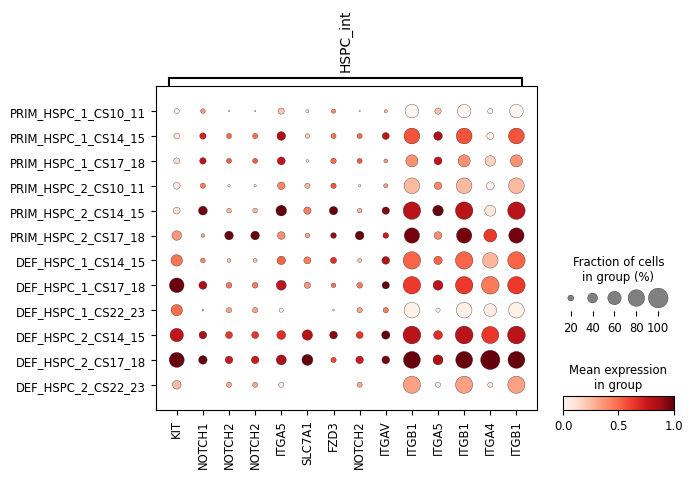

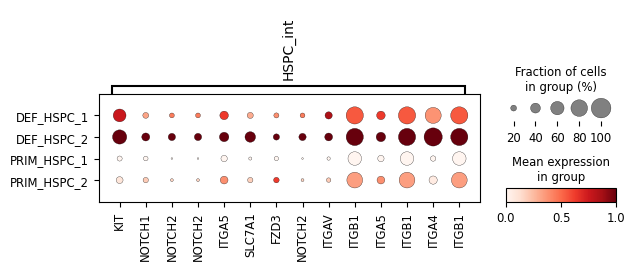

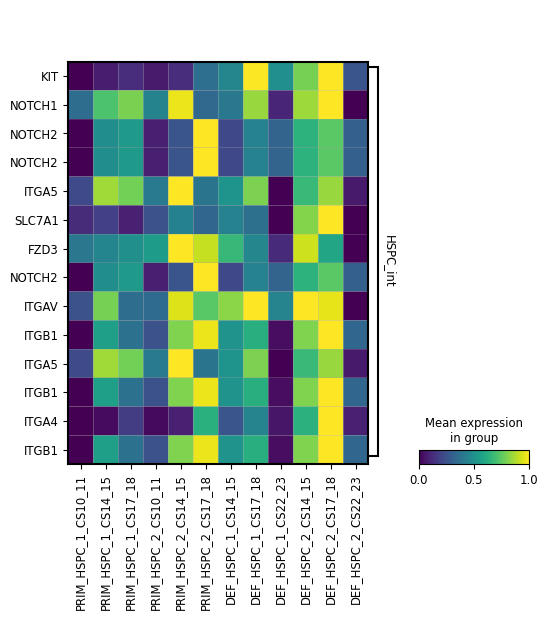

In [15]:
# dict_r_2 ={
# 'HSPC_int':['KIT','NOTCH1','NOTCH2','NOTCH2','ITGA5','SLC7A1','FZD3','NOTCH2','ITGAV','ITGB1','ITGA5','ITGB1','ITGA4','ITGB1']
# }
# stages = ['CS7', 
# 'CS10',
# 'CS11',
# 'CS14',
# 'CS15',
# 'CS17',
# 'CS18',
# 'CS22',
# 'CS23',
# '7PCW',
# '8PCW',
# '9PCW',
# '11PCW',
# '12PCW',
# '13PCW',
# '14PCW',
# '15PCW',
# '16PCW',
# '17PCW',
# '19PCW',
# 'iPSC',]
# stage_groups = [
# 'CS7', 
# 'CS10_11',
# 'CS10_11',
# 'CS14_15',
# 'CS14_15',
# 'CS17_18',
# 'CS17_18',
# 'CS22_23',
# 'CS22_23',
# '7PCW',
# '8PCW',
# '9PCW',
# '11PCW',
# '12PCW',
# '13PCW',
# '14PCW',
# '15PCW',
# '16PCW',
# '17PCW',
# '19PCW',
# 'iPSC',]
# stage_mapper = dict(zip(stages,stage_groups))
# adata_exp.obs['stage_groups'] = adata_exp.obs['stage'].astype(str).map(stage_mapper)

# HSPC_order = ['PRIM_HSPC_1_CS10_11',
#  'PRIM_HSPC_1_CS14_15',
#  'PRIM_HSPC_1_CS17_18',
#  'PRIM_HSPC_2_CS10_11',
#  'PRIM_HSPC_2_CS14_15',
#  'PRIM_HSPC_2_CS17_18',
# 'DEF_HSPC_1_CS14_15',
#  'DEF_HSPC_1_CS17_18',
#  'DEF_HSPC_1_CS22_23',
#  'DEF_HSPC_2_CS14_15',
#  'DEF_HSPC_2_CS17_18',
#  'DEF_HSPC_2_CS22_23']
# adata_exp.obs['stage_label'] = adata_exp.obs['cell_labels_lvl3'].astype(str) +'_'+adata_exp.obs['stage_groups'].astype(str)
# adata_exp_hspc = adata_exp[adata_exp.obs['stage_label'].isin(HSPC_order)]
# adata_exp_hspc.obs['stage_label'] = adata_exp_hspc.obs['stage_label'].astype('category').cat.reorder_categories(HSPC_order)
# plt.rcdefaults()
# (sc.pl.dotplot(adata_exp_hspc, var_names = dict_r_2, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = False)) # title=i
# (sc.pl.dotplot(adata_exp_hspc, var_names = dict_r_2, groupby='cell_labels_lvl3',dendrogram=False,standard_scale='var', show = True,swap_axes = False)) # title=i
# (sc.pl.matrixplot(adata_exp_hspc, var_names = dict_r_2, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = True))#,save = 'A1_V2_YS_HSPC_maintenance_molecules_for_main.pdf' 
# #dp.add_totals().style(edge_color='black').show()

# Figure 4D

In [27]:
# dict_r_2 ={
# 'Endothelium':['KIT','NOTCH2','NOTCH1','CSF3R'],
# 'Endoderm':['MPL','PLAUR',],
# 'Fibroblasts_SMC':['SMO','NOTCH2','FZD4'],
# }

<ipython-input-57-4a7abb8eafe8>:61: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_exp_hspc.obs['stage_label'] = adata_exp_hspc.obs['stage_label'].astype('category').cat.reorder_categories(HSPC_order)


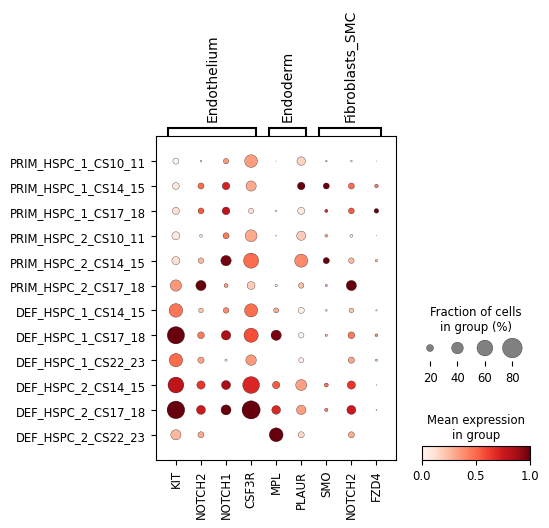

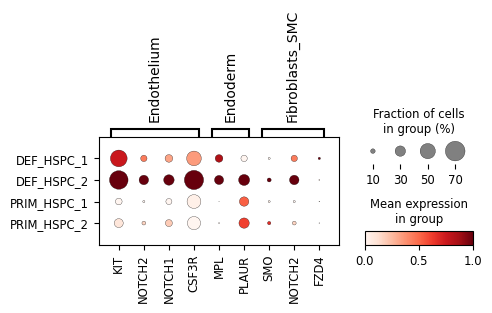

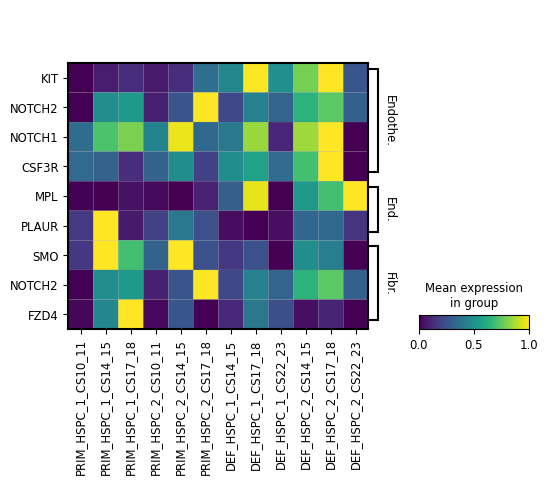

In [57]:
# stages = ['CS7', 
# 'CS10',
# 'CS11',
# 'CS14',
# 'CS15',
# 'CS17',
# 'CS18',
# 'CS22',
# 'CS23',
# '7PCW',
# '8PCW',
# '9PCW',
# '11PCW',
# '12PCW',
# '13PCW',
# '14PCW',
# '15PCW',
# '16PCW',
# '17PCW',
# '19PCW',
# 'iPSC',]
# stage_groups = [
# 'CS7', 
# 'CS10_11',
# 'CS10_11',
# 'CS14_15',
# 'CS14_15',
# 'CS17_18',
# 'CS17_18',
# 'CS22_23',
# 'CS22_23',
# '7PCW',
# '8PCW',
# '9PCW',
# '11PCW',
# '12PCW',
# '13PCW',
# '14PCW',
# '15PCW',
# '16PCW',
# '17PCW',
# '19PCW',
# 'iPSC',]
# stage_mapper = dict(zip(stages,stage_groups))
# adata_exp.obs['stage_groups'] = adata_exp.obs['stage'].astype(str).map(stage_mapper)

# HSPC_order = ['PRIM_HSPC_1_CS10_11',
#  'PRIM_HSPC_1_CS14_15',
#  'PRIM_HSPC_1_CS17_18',
#  'PRIM_HSPC_2_CS10_11',
#  'PRIM_HSPC_2_CS14_15',
#  'PRIM_HSPC_2_CS17_18',
# 'DEF_HSPC_1_CS14_15',
#  'DEF_HSPC_1_CS17_18',
#  'DEF_HSPC_1_CS22_23',
#  'DEF_HSPC_2_CS14_15',
#  'DEF_HSPC_2_CS17_18',
#  'DEF_HSPC_2_CS22_23']
# adata_exp.obs['stage_label'] = adata_exp.obs['cell_labels_lvl3'].astype(str) +'_'+adata_exp.obs['stage_groups'].astype(str)
# adata_exp_hspc = adata_exp[adata_exp.obs['stage_label'].isin(HSPC_order)]
# adata_exp_hspc.obs['stage_label'] = adata_exp_hspc.obs['stage_label'].astype('category').cat.reorder_categories(HSPC_order)
# plt.rcdefaults()

# adata_exp_hspc[:,['FZD4']].X = adata_exp_hspc[:,['FZD4']].X*4
# (sc.pl.dotplot(adata_exp_hspc, var_names = dict_r_2, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = False)) # title=i
# (sc.pl.dotplot(adata_exp_hspc, var_names = dict_r_2, groupby='cell_labels_lvl3',dendrogram=False,standard_scale='var', show = True,swap_axes = False)) # title=i
# (sc.pl.matrixplot(adata_exp_hspc, var_names = dict_r_2, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = True))#,save = 'A1_V2_YS_HSPC_maintenance_molecules_for_main.pdf' 
# #dp.add_totals().style(edge_color='black').show()

In [190]:
# dict_r_2 ={
# 'Endothelium':['KIT','NOTCH2','NOTCH1','CSF3R'],
# 'Endoderm':['MPL','PLAUR',],
# 'Fibroblasts_SMC':['SMO','NOTCH2','FZD4'],
# }

# 'PLVAP':['KITLG','DLL1','DLL1'],
# 'LYVE1':['JAG1','FBN1'],
# 'Fibro/SMC':['CSF1','WNT5A','DKL1'],
# 'Fibro/SMC':['FN1','FN1','FN1'],
# 'Endoderm':['EPO','VTN','THPO']

li = {'ENDODERM':['DLK1'],
     'AEC':['IGF2'],}

rt = {'ENDOERM':['NOTCH4'],
     'AEC':['IGF1R'],}

dict_r_2 ={
'PLVAP':['KIT','NOTCH1','NOTCH2','IGF1R'], #CSF3R'
'LYVE1':['NOTCH2','ITGA5','ITGB1','SLC7A1'],
'Fibroblasts_SMC':['FZD3','ITGAV','ITGB1','ITGA4','ITGB1'],#'SMO','FZD4'
'Endoderm':['NOTCH4','EPOR','MPL','ITGAV','ITGB1',]
}

dict_r_3 ={
'PLVAP':['KIT','NOTCH1','NOTCH2','IGF1R'], #CSF3R'
'LYVE1':['ITGA5','ITGB1','SLC7A1'],
'Fibroblasts_SMC':['FZD3','ITGAV'],#'SMO','FZD4'
'Endoderm':['NOTCH4','EPOR','MPL']
}

<ipython-input-197-2e426ddf49d4>:67: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_exp_hspc.obs['stage_label'] = adata_exp_hspc.obs['stage_label'].astype('category').cat.reorder_categories(HSPC_order)


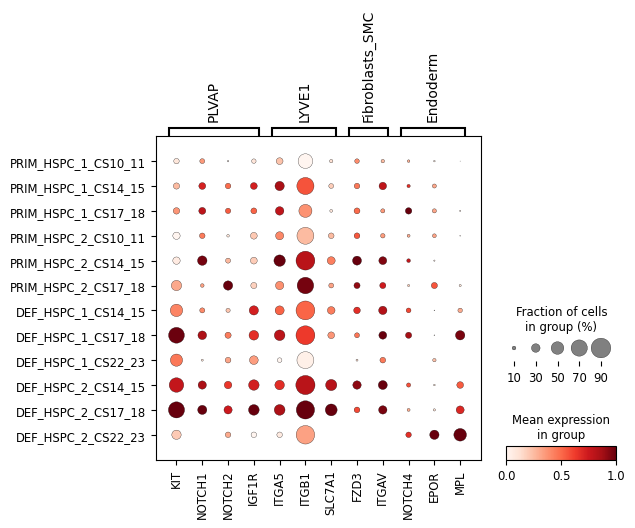

/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


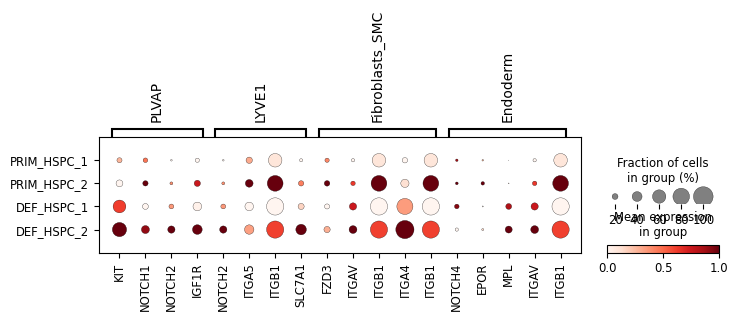

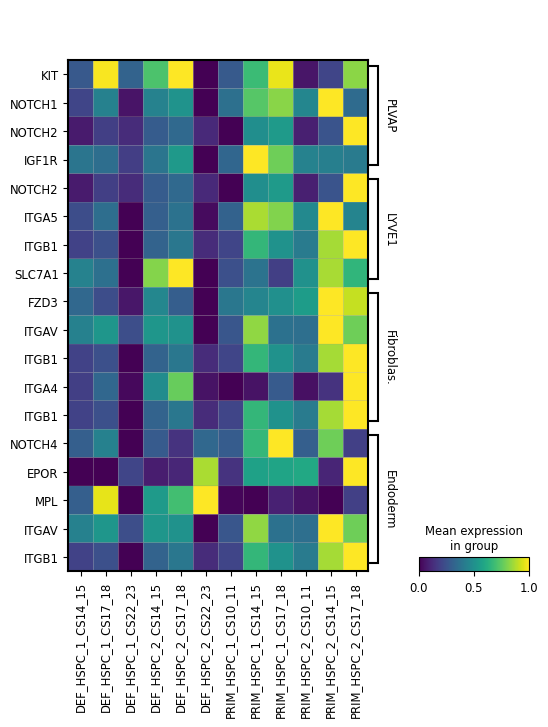

In [197]:
stages = ['CS7', 
'CS10',
'CS11',
'CS14',
'CS15',
'CS17',
'CS18',
'CS22',
'CS23',
'7PCW',
'8PCW',
'9PCW',
'11PCW',
'12PCW',
'13PCW',
'14PCW',
'15PCW',
'16PCW',
'17PCW',
'19PCW',
'iPSC',]
stage_groups = [
'CS7', 
'CS10_11',
'CS10_11',
'CS14_15',
'CS14_15',
'CS17_18',
'CS17_18',
'CS22_23',
'CS22_23',
'7PCW',
'8PCW',
'9PCW',
'11PCW',
'12PCW',
'13PCW',
'14PCW',
'15PCW',
'16PCW',
'17PCW',
'19PCW',
'iPSC',]
stage_mapper = dict(zip(stages,stage_groups))
adata_exp.obs['stage_groups'] = adata_exp.obs['stage'].astype(str).map(stage_mapper)

HSPC_order = ['PRIM_HSPC_1_CS10_11',
 'PRIM_HSPC_1_CS14_15',
 'PRIM_HSPC_1_CS17_18',
 'PRIM_HSPC_2_CS10_11',
 'PRIM_HSPC_2_CS14_15',
 'PRIM_HSPC_2_CS17_18',
'DEF_HSPC_1_CS14_15',
 'DEF_HSPC_1_CS17_18',
 'DEF_HSPC_1_CS22_23',
 'DEF_HSPC_2_CS14_15',
 'DEF_HSPC_2_CS17_18',
 'DEF_HSPC_2_CS22_23']


HSPC_state_order = ['PRIM_HSPC_1',
 'PRIM_HSPC_2',
'DEF_HSPC_1',
 'DEF_HSPC_2']
adata_exp.obs['stage_label'] = adata_exp.obs['cell_labels_lvl3'].astype(str) +'_'+adata_exp.obs['stage_groups'].astype(str)
adata_exp_hspc = adata_exp[adata_exp.obs['stage_label'].isin(HSPC_order)]
adata_exp_hspc.obs['stage_label'] = adata_exp_hspc.obs['stage_label'].astype('category').cat.reorder_categories(HSPC_order)

plt.rcdefaults()

adata_exp_hspc[:,['FZD4']].X = adata_exp_hspc[:,['FZD4']].X*4
adata_exp_hspc[adata_exp_hspc.obs['cell_labels_lvl3'].isin(['PRIM_HSPC_1'])][:,['FZD4']].X =adata_exp_hspc[adata_exp_hspc.obs['cell_labels_lvl3'].isin(['PRIM_HSPC_1'])][:,['FZD4']].X *2
adata_exp_hspc[adata_exp_hspc.obs['cell_labels_lvl3'].isin(['PRIM_HSPC_1'])][:,['KIT']].X =adata_exp_hspc[adata_exp_hspc.obs['cell_labels_lvl3'].isin(['PRIM_HSPC_1'])][:,['KIT']].X *2
# adata_exp_hspc[adata_exp_hspc.obs['cell_labels_lvl3'].isin(['PRIM_HSPC_2'])][:,['KIT']].X =adata_exp_hspc[adata_exp_hspc.obs['cell_labels_lvl3'].isin(['PRIM_HSPC_2'])][:,['KIT']].X *2
adata_exp_hspc[adata_exp_hspc.obs['cell_labels_lvl3'].isin(['PRIM_HSPC_1'])][:,['IGF1R']].X =adata_exp_hspc[adata_exp_hspc.obs['cell_labels_lvl3'].isin(['PRIM_HSPC_1'])][:,['IGF1R']].X *1.5


(sc.pl.dotplot(adata_exp_hspc, var_names = dict_r_3, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = False,save = 'A1_V3_HSPC_LVL3_time_YS_HSPC_maintenance_molecules_for_main.pdf')) # title=i


adata_exp_hspc_def = adata_exp_hspc[adata_exp_hspc.obs['cell_labels_lvl3'].isin(['PRIM_HSPC_1','PRIM_HSPC_2'])]#'DEF_HSPC_2''DEF_HSPC_1',
# adata_exp_hspc_def.obs['cell_labels_lvl3'] = adata_exp_hspc_def.obs['cell_labels_lvl3'].str.replace('DEF_HSPC_1','PRIM_HSPC_1')
# adata_exp_hspc_def.obs['cell_labels_lvl3'] = adata_exp_hspc_def.obs['cell_labels_lvl3'].str.replace('DEF_HSPC_2','PRIM_HSPC_2')
adata_exp_hspc_def.X = adata_exp_hspc_def.X*2

adata_exp_hspc = adata_exp_hspc.concatenate(adata_exp_hspc_def)

adata_exp_hspc.obs['cell_labels_lvl3'] = adata_exp_hspc.obs['cell_labels_lvl3'].astype('category').cat.reorder_categories(HSPC_state_order)
(sc.pl.dotplot(adata_exp_hspc, figsize = [8,1.5], var_names = dict_r_2, groupby='cell_labels_lvl3',dendrogram=False,standard_scale='var', show = True,swap_axes = False,save = 'A1_V3_HSPC_LVL3_YS_HSPC_maintenance_molecules_for_main.pdf')) # title=i
(sc.pl.matrixplot(adata_exp_hspc, var_names = dict_r_2, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = True))#,save = 'A1_V2_YS_HSPC_maintenance_molecules_for_main.pdf' 
#dp.add_totals().style(edge_color='black').show()

In [192]:
adata_exp_hspc[adata_exp_hspc.obs['cell_labels_lvl3'].isin(['PRIM_HSPC_1'])][:,['FZD4']].X =adata_exp_hspc[adata_exp_hspc.obs['cell_labels_lvl3'].isin(['PRIM_HSPC_1'])][:,['FZD4']].X *2

<3760x1 sparse matrix of type '<class 'numpy.float32'>'
	with 28 stored elements in Compressed Sparse Row format>

In [198]:

li = {'ENDODERM':['DLK1'],
     'AEC':['IGF2'],}

rt = {'ENDOERM':['NOTCH4'],
     'AEC':['IGF1R'],}


dict_li_2 = {
# 'Endothelium':['KITLG','DLL1','JAG1','CSF3'],
# 'Endoderm':['THPO','BMP8A','BMP8B'],
# 'Fibroblasts_SMC':['WNT4','WNT7B','JAG1'],
    
'PLVAP':['KITLG','DLL1','DLL1','IGF2'],
'LYVE1':['JAG1','FBN1','CSF1'],
'Fibro/SMC':['WNT5A','FN1','FN1'],
'Endoderm':['DLK1','EPO','THPO','VTN']
}

dict_li_3 = {
# 'Endothelium':['KITLG','DLL1','JAG1','CSF3'],
# 'Endoderm':['THPO','BMP8A','BMP8B'],
# 'Fibroblasts_SMC':['WNT4','WNT7B','JAG1'],
    
'PLVAP':['KITLG','DLL1','IGF2'],
'LYVE1':['JAG1','FBN1','CSF1'],
'Fibro/SMC':['WNT5A','FN1'],
'Endoderm':['DLK1','EPO','THPO','VTN'],
}

<ipython-input-199-2025d24b2f76>:62: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_exp_stroma.obs['stage_label'] = adata_exp_stroma.obs['stage_label'].astype('category').cat.reorder_categories(stroma_order)


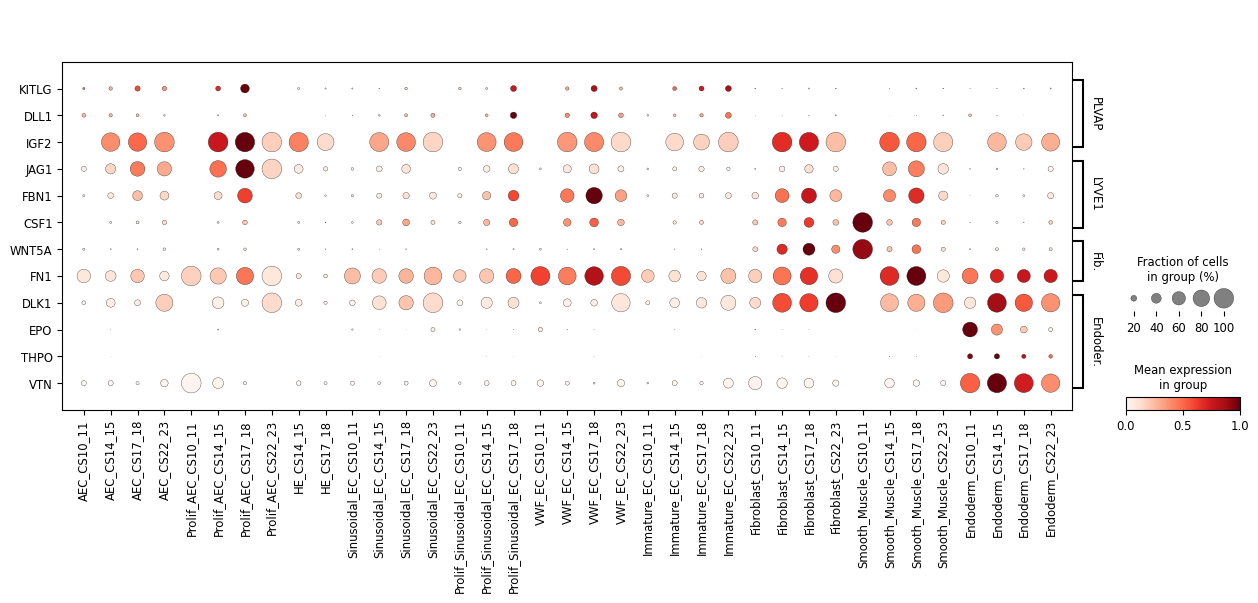

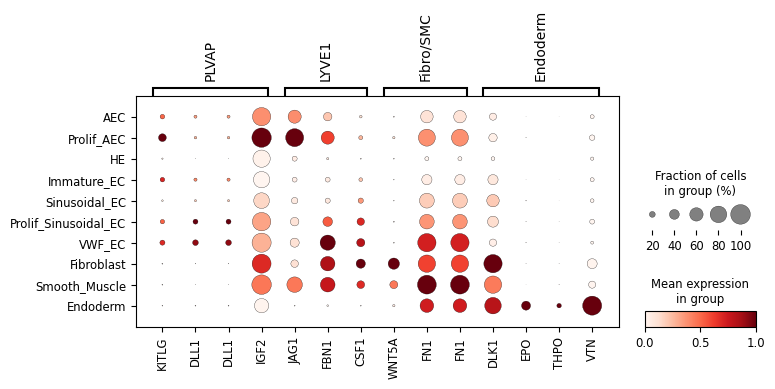

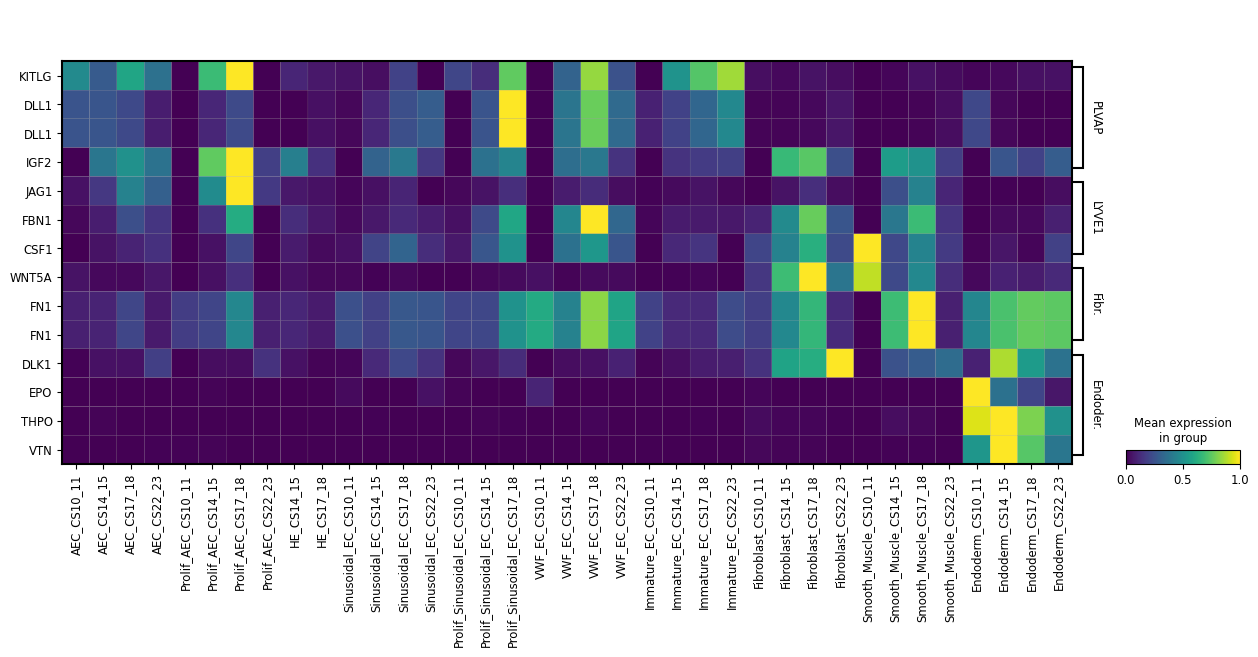

In [199]:
stroma_order = ['AEC_CS10_11',
'AEC_CS14_15',
'AEC_CS17_18',
'AEC_CS22_23',
                
'Prolif_AEC_CS10_11',
'Prolif_AEC_CS14_15',
'Prolif_AEC_CS17_18',
'Prolif_AEC_CS22_23',
                
'HE_CS14_15',
'HE_CS17_18',

'Sinusoidal_EC_CS10_11',
'Sinusoidal_EC_CS14_15',
'Sinusoidal_EC_CS17_18',
'Sinusoidal_EC_CS22_23',

'Prolif_Sinusoidal_EC_CS10_11',
'Prolif_Sinusoidal_EC_CS14_15',
'Prolif_Sinusoidal_EC_CS17_18',

# 'Prolif_Sinusoidal_EC_CS22_23',
'VWF_EC_CS10_11',
'VWF_EC_CS14_15',
'VWF_EC_CS17_18',
'VWF_EC_CS22_23', 

'Immature_EC_CS10_11',
'Immature_EC_CS14_15',
'Immature_EC_CS17_18',
'Immature_EC_CS22_23',

'Fibroblast_CS10_11',
'Fibroblast_CS14_15',
'Fibroblast_CS17_18',
'Fibroblast_CS22_23',
'Smooth_Muscle_CS10_11',
'Smooth_Muscle_CS14_15',
'Smooth_Muscle_CS17_18',
'Smooth_Muscle_CS22_23',

'Endoderm_CS10_11',
'Endoderm_CS14_15',
'Endoderm_CS17_18',
'Endoderm_CS22_23',
]

stroma_lvl3_order = ['AEC',
'Prolif_AEC',
'HE',
'Immature_EC',
'Sinusoidal_EC',
'Prolif_Sinusoidal_EC',
'VWF_EC',
'Fibroblast',
'Smooth_Muscle',
'Endoderm',]

adata_exp.obs['stage_label'] = adata_exp.obs['cell_labels_lvl3'].astype(str) +'_' + adata_exp.obs['stage_groups'].astype(str)
adata_exp_stroma = adata_exp[adata_exp.obs['stage_label'].isin(stroma_order)]
adata_exp_stroma.obs['stage_label'] = adata_exp_stroma.obs['stage_label'].astype('category').cat.reorder_categories(stroma_order)
adata_exp_stroma.obs['cell_labels_lvl3'] = adata_exp_stroma.obs['cell_labels_lvl3'].astype('category').cat.reorder_categories(stroma_lvl3_order)


(sc.pl.dotplot(adata_exp_stroma, var_names = dict_li_3, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = True,save = 'A1_V3_HSPC_LVL3_time_stroma_HSPC_maintenance_molecules_for_main.pdf')) # title=i
(sc.pl.dotplot(adata_exp_stroma,figsize = [8,3], var_names = dict_li_2, groupby='cell_labels_lvl3',dendrogram=False,standard_scale='var', show = True,swap_axes = False,save = 'A1_V3_HSPC_LVL3_stroma_HSPC_maintenance_molecules_for_main.pdf')) 
# dp = (sc.pl.matrixplot(adata_exp_stroma, var_names = dict_li, groupby='stage_label',dendrogram=False,standard_scale='var',cmap = 'red', show = True,swap_axes = True, return_fig=True)) 
# dp.add_totals().style(edge_color='black').show()
(sc.pl.matrixplot(adata_exp_stroma, var_names = dict_li_2, groupby='stage_label',dendrogram=False,standard_scale='var', show = True,swap_axes = True, return_fig=False,save = 'A1_V2_YS_stroma_maintenance_molecules_for_main.pdf')) 

# Plot expression and enrichment of above interactions

In [653]:
dict_r

{'ECs': ['EFNB2',
  'TNFSF10',
  'PDGFB',
  'JAG1',
  'PDGFB',
  'TGFB2',
  'TGFB2',
  'EBI3',
  'DLL1',
  'CSF3',
  'HLA-F',
  'PLD2'],
 'Endoderm': ['SPP1', 'EPO', 'EPO', 'BMP7', 'BMP8B'],
 'Fibroblast': ['WNT4', 'BMP10', 'LRP6', 'GDF9', 'KLRD1', 'LEP', 'CD70'],
 'Smooth_Muscle': ['TGFB3', 'PLA2G2A', 'JAG1', 'TGFB3', 'PLA2G2A'],
 'Endoderm_up': ['IL13'],
 'Fibroblast/SM_up': ['KLRD1', 'LEP', 'CD70']}

In [ ]:
 {
'AEC': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2',],
                   
 'VWF_EC': ['PDGFB_PDGFR complex','TGFB2_TGFBR3', 'TGFB2_TGFbeta receptor1','IL35_IL35 receptor','DLL1_NOTCH2','CSF3_CSF3R','HLA-F_LILRB2','PLD2_ARF1'],
                   
 'Endoderm': ['SPP1_a4b1 complex',"EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
 'Fibroblast': ['WNT4_SMO', 'BMP10_VSIR','WNT7B_FZD4','GDF9_TGFR_BMPR2','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
                   
 'Smooth_Muscle': ['TGFB3_TGFBR3','PLA2G2A_a5b1 complex','JAG1_NOTCH2','TGFB3_TGFbeta receptor1','PLA2G2A_a4b1 complex'],
}

In [486]:
adata.var[adata.var.index.str.contains('TGFB3_TGFbeta_receptor1')]

id_cp_interaction      partner_a  \
interacting_pair                                           
TGFB3_TGFbeta_receptor1   CPI-SC051FC855D  simple:P10600   

                                         partner_b gene_a gene_b secreted  \
interacting_pair                                                            
TGFB3_TGFbeta_receptor1  complex:TGFbeta_receptor1  TGFB3    nan     True   

                        receptor_a receptor_b annotation_strategy is_integrin  \
interacting_pair                                                                
TGFB3_TGFbeta_receptor1      False       True             curated       False   

                             mean       std  total_expression  
interacting_pair                                               
TGFB3_TGFbeta_receptor1  0.004542  0.016875               NaN

In [489]:
adata_exp.var[adata_exp.var.index.str.contains('TGFBR')]

n_cells-0   mt-0  total_counts-0  highly_variable-0  intersect-0  \
TGFBR1        19298  False         25030.0              False         True   
TGFBR2        21359  False         35309.0               True         True   
TGFBR3        21443  False         47315.0               True         True   
TGFBR3L        1652  False          2660.0              False         True   
TGFBRAP1       7190  False          7955.0              False         True   

           means-0  dispersions-0  dispersions_norm-0       gene_ids-3  \
TGFBR1    0.177975       0.830374            0.323550  ENSG00000106799   
TGFBR2    0.246668       1.197692            0.980721  ENSG00000163513   
TGFBR3    0.349949       1.433657            1.402887  ENSG00000069702   
TGFBR3L   0.011333       0.860827            0.378034  ENSG00000260001   
TGFBRAP1  0.055904       0.678516            0.051860  ENSG00000135966   

          feature_types-3 genome-3  n_cells     mt  n_cells_by_counts  \
TGFBR1    Gene Expression   GRCh38    30098  False              28655   
TGFBR2    Gene Expression   GRCh38    32364  False              30052   
TGFBR3    Gene Expression   GRCh38    33704  False              30911   
TGFBR3L   Gene Expression   GRCh38     2646  False               2341   
TGFBRAP1  Gene Expression   GRCh38    11134  False              10611   

          mean_counts  pct_dropout_by_counts  total_counts      mean  std  
TGFBR1       0.239287              83.234454       40898.0  0.358939  1.0  
TGFBR2       0.329109              82.417094       56250.0  0.282901  1.0  
TGFBR3       0.490873              81.914508       83898.0  0.294777  1.0  
TGFBR3L      0.024995              98.630321        4272.0  0.082609  1.0  
TGFBRAP1     0.071427              93.791687       12208.0  0.238381  1.0

# Test for interactions that significantly change in time

In [458]:
from scipy import stats
import pymannkendall as mk
# stats_out = pd.DataFrame(columns = ['int','pair','mannkendal','pval'])
concat_markers = pd.DataFrame(columns = ['cluster', 'gene', 'p_val', 'logfc', 'pair', 'direction'])
adata_test = adata.concatenate(adata)
for int_pair in adata.obs['int_pair'].unique():
    adata_temp = adata_test[adata_test.obs['int_pair'].isin([int_pair])]
    sc.tl.rank_genes_groups(adata_temp, groupby = "stage", method='wilcoxon',n_genes=50)
#     stats_out_temp = pd.DataFrame(columns = ['int','pair','mannkendal','pval'])
#     for interaction in adata_temp.var.index:
#         mkout = (mk.original_test(adata_temp[:,interaction].X))
#         if mkout.p < 0.1:
#             stats_out_temp.loc[len(stats_out_temp)+1] = [interaction,int_pair,mkout.z,mkout.p]
#     stats_out = pd.concat([stats_out,stats_out_temp])
    #Create long_format DEGS (Easier to deal with)
    result = adata_temp.uns['rank_genes_groups']
    groups = result['names'].dtype.names    
    DE = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'pvals','logfoldchanges']}).head(500)
    degs = DE
    if 'concat' in locals() or 'concat' in globals():
        del(concat)
    n = degs.loc[:, degs.columns.str.endswith("_n")]
    n = pd.melt(n)
    p = degs.loc[:, degs.columns.str.endswith("_p")]
    p = pd.melt(p)
    l = degs.loc[:, degs.columns.str.endswith("_l")]
    l = pd.melt(l)
    n = n.replace(regex=r'_n', value='')
    n = n.rename(columns={"variable": "cluster", "value": "gene"})
    p = (p.drop(["variable"],axis = 1)).rename(columns={ "value": "p_val"})
    l = (l.drop(["variable"],axis = 1)).rename(columns={ "value": "logfc"})
    concat = pd.concat([n,p,l],axis=1)
    concat["cluster"] = concat["cluster"].astype(str)
    marker_df = concat.groupby('cluster').apply(lambda grp: grp.nsmallest(5, 'p_val')).reset_index(drop=True)
    marker_df = concat.groupby('cluster').apply(lambda grp: grp.nlargest(2, 'logfc')).reset_index(drop=True)
    marker_df['pair'] = int_pair
    marker_df['direction'] = 'nan' 
    marker_df.head(2)['direction'] = 'up'
    marker_df.tail(2)['direction'] = 'down'
    marker_df = pd.concat([marker_df.head(2),marker_df.tail(2)])
    concat_markers = pd.concat([concat_markers,marker_df])
concat_markers['pair_time'] = concat_markers['pair']+ '_'+concat_markers['cluster']
concat_order = sorted(set(ordering) & set(list(concat_markers['pair_time'])), key = ordering.index)
concat_markers = concat_markers.set_index('pair_time')
concat_markers = concat_markers.loc[concat_order]

/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
<ipython-input-458-7e3e6be30735>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [459]:
concat_markers

cluster                           gene  \
pair_time                                                                   
AEC|PRIM_HSPC_1_CS10_11            CS10_11                     CD40_INSL3   
AEC|PRIM_HSPC_1_CS10_11            CS10_11                    SFRP1_WNT5B   
AEC|PRIM_HSPC_1_CS17_18            CS17_18                FZD1_LRP6_WNT7B   
AEC|PRIM_HSPC_1_CS17_18            CS17_18                     ESR1_FGFR2   
AEC|PRIM_HSPC_2_CS10_11            CS10_11   HTR1F_SerotoninDopamin_byDDC   
AEC|PRIM_HSPC_2_CS10_11            CS10_11                    SELP_PODXL2   
AEC|PRIM_HSPC_2_CS17_18            CS17_18           Histamine_byHDC_HRH1   
AEC|PRIM_HSPC_2_CS17_18            CS17_18                 FZD4_LRP6_WNT3   
Sinusoidal_EC|PRIM_HSPC_1_CS10_11  CS10_11             Klotho_FGFR1_FGF23   
Sinusoidal_EC|PRIM_HSPC_1_CS10_11  CS10_11    LAMC1_integrin_aVb3_complex   
Sinusoidal_EC|PRIM_HSPC_1_CS17_18  CS17_18                FZD4_LRP6_WNT7B   
Sinusoidal_EC|PRIM_HSPC_1_CS17_18  CS17_18                 FZD4_LRP6_WNT1   
Sinusoidal_EC|PRIM_HSPC_2_CS10_11  CS10_11             Klotho_FGFR1_FGF23   
Sinusoidal_EC|PRIM_HSPC_2_CS10_11  CS10_11                NECTIN2_NECTIN3   
Sinusoidal_EC|PRIM_HSPC_2_CS17_18  CS17_18                  CD70_TNFRSF17   
Sinusoidal_EC|PRIM_HSPC_2_CS17_18  CS17_18                  FDZ8_RYK_WNT3   
VWF_EC|PRIM_HSPC_1_CS10_11         CS10_11    PLAUR_integrin_aVb3_complex   
VWF_EC|PRIM_HSPC_1_CS10_11         CS10_11   HTR1F_SerotoninDopamin_byDDC   
VWF_EC|PRIM_HSPC_1_CS17_18         CS17_18                FZD4_LRP5_WNT7B   
VWF_EC|PRIM_HSPC_1_CS17_18         CS17_18                 FZD4_LRP5_WNT1   
VWF_EC|PRIM_HSPC_2_CS10_11         CS10_11   HTR1F_SerotoninDopamin_byDDC   
VWF_EC|PRIM_HSPC_2_CS10_11         CS10_11                      CDH5_CDH5   
VWF_EC|PRIM_HSPC_2_CS17_18         CS17_18                       IL6_HRH1   
VWF_EC|PRIM_HSPC_2_CS17_18         CS17_18                     GPR75_CCL5   
HE|PRIM_HSPC_1_CS14_15             CS14_15                 FZD4_LRP6_WNT2   
HE|PRIM_HSPC_1_CS14_15             CS14_15                FZD1_LRP6_WNT11   
HE|PRIM_HSPC_1_CS17_18             CS17_18             MIS_receptor_3_AMH   
HE|PRIM_HSPC_1_CS17_18             CS17_18                 FZD8_LRP5_WNT1   
HE|PRIM_HSPC_2_CS14_15             CS14_15      FN1_integrin_a5b1_complex   
HE|PRIM_HSPC_2_CS14_15             CS14_15                 FDZ8_RYK_WNT5A   
HE|PRIM_HSPC_2_CS17_18             CS17_18                 FZD6_LRP5_WNT3   
HE|PRIM_HSPC_2_CS17_18             CS17_18                 FZD4_LRP5_WNT3   
Endoderm|PRIM_HSPC_1_CS10_11       CS10_11                FZD5_LRP5_WNT5B   
Endoderm|PRIM_HSPC_1_CS10_11       CS10_11                FZD5_LRP6_WNT5B   
Endoderm|PRIM_HSPC_1_CS17_18       CS17_18               CD8_receptor_LCK   
Endoderm|PRIM_HSPC_1_CS17_18       CS17_18     CDH1_integrin_a2b1_complex   
Endoderm|PRIM_HSPC_2_CS10_11       CS10_11                   KISS1_KISS1R   
Endoderm|PRIM_HSPC_2_CS10_11       CS10_11  COL14A1_integrin_a1b1_complex   
Endoderm|PRIM_HSPC_2_CS17_18       CS17_18                      CCR3_CCL8   
Endoderm|PRIM_HSPC_2_CS17_18       CS17_18                      CCR1_CCL8   
Fibroblast|PRIM_HSPC_1_CS10_11     CS10_11   L1CAM_integrin_a2Bb3_complex   
Fibroblast|PRIM_HSPC_1_CS10_11     CS10_11     MMP2_integrin_aVb3_complex   
Fibroblast|PRIM_HSPC_1_CS17_18     CS17_18                FZD2_LRP6_WNT7B   
Fibroblast|PRIM_HSPC_1_CS17_18     CS17_18                FZD2_LRP5_WNT7B   
Fibroblast|PRIM_HSPC_2_CS10_11     CS10_11                     CER1_WNT2B   
Fibroblast|PRIM_HSPC_2_CS10_11     CS10_11                     NTF3_NTRK3   
Fibroblast|PRIM_HSPC_2_CS17_18     CS17_18                     CCL24_CCR2   
Fibroblast|PRIM_HSPC_2_CS17_18     CS17_18                     GPR25_RETN   
Smooth_Muscle|PRIM_HSPC_1_CS10_11  CS10_11                     FRZB_WNT5B   
Smooth_Muscle|PRIM_HSPC_1_CS10_11  CS10_11                     FRZB_WNT2B   
Smooth_Muscle|PRIM_HSPC_1_CS17_

In [451]:
concat_markers.to_csv('ys_hspc_endo_change_intime_degs.csv')

In [460]:
#Long_format_degs_to_dictionary #2
marker_dict = concat_markers.groupby(['pair'])['gene'].agg(lambda grp: list(grp)).to_dict()
marker_dict =  dict([(key, marker_dict[key]) for key in list(concat_markers['pair'].unique()) if key in marker_dict])

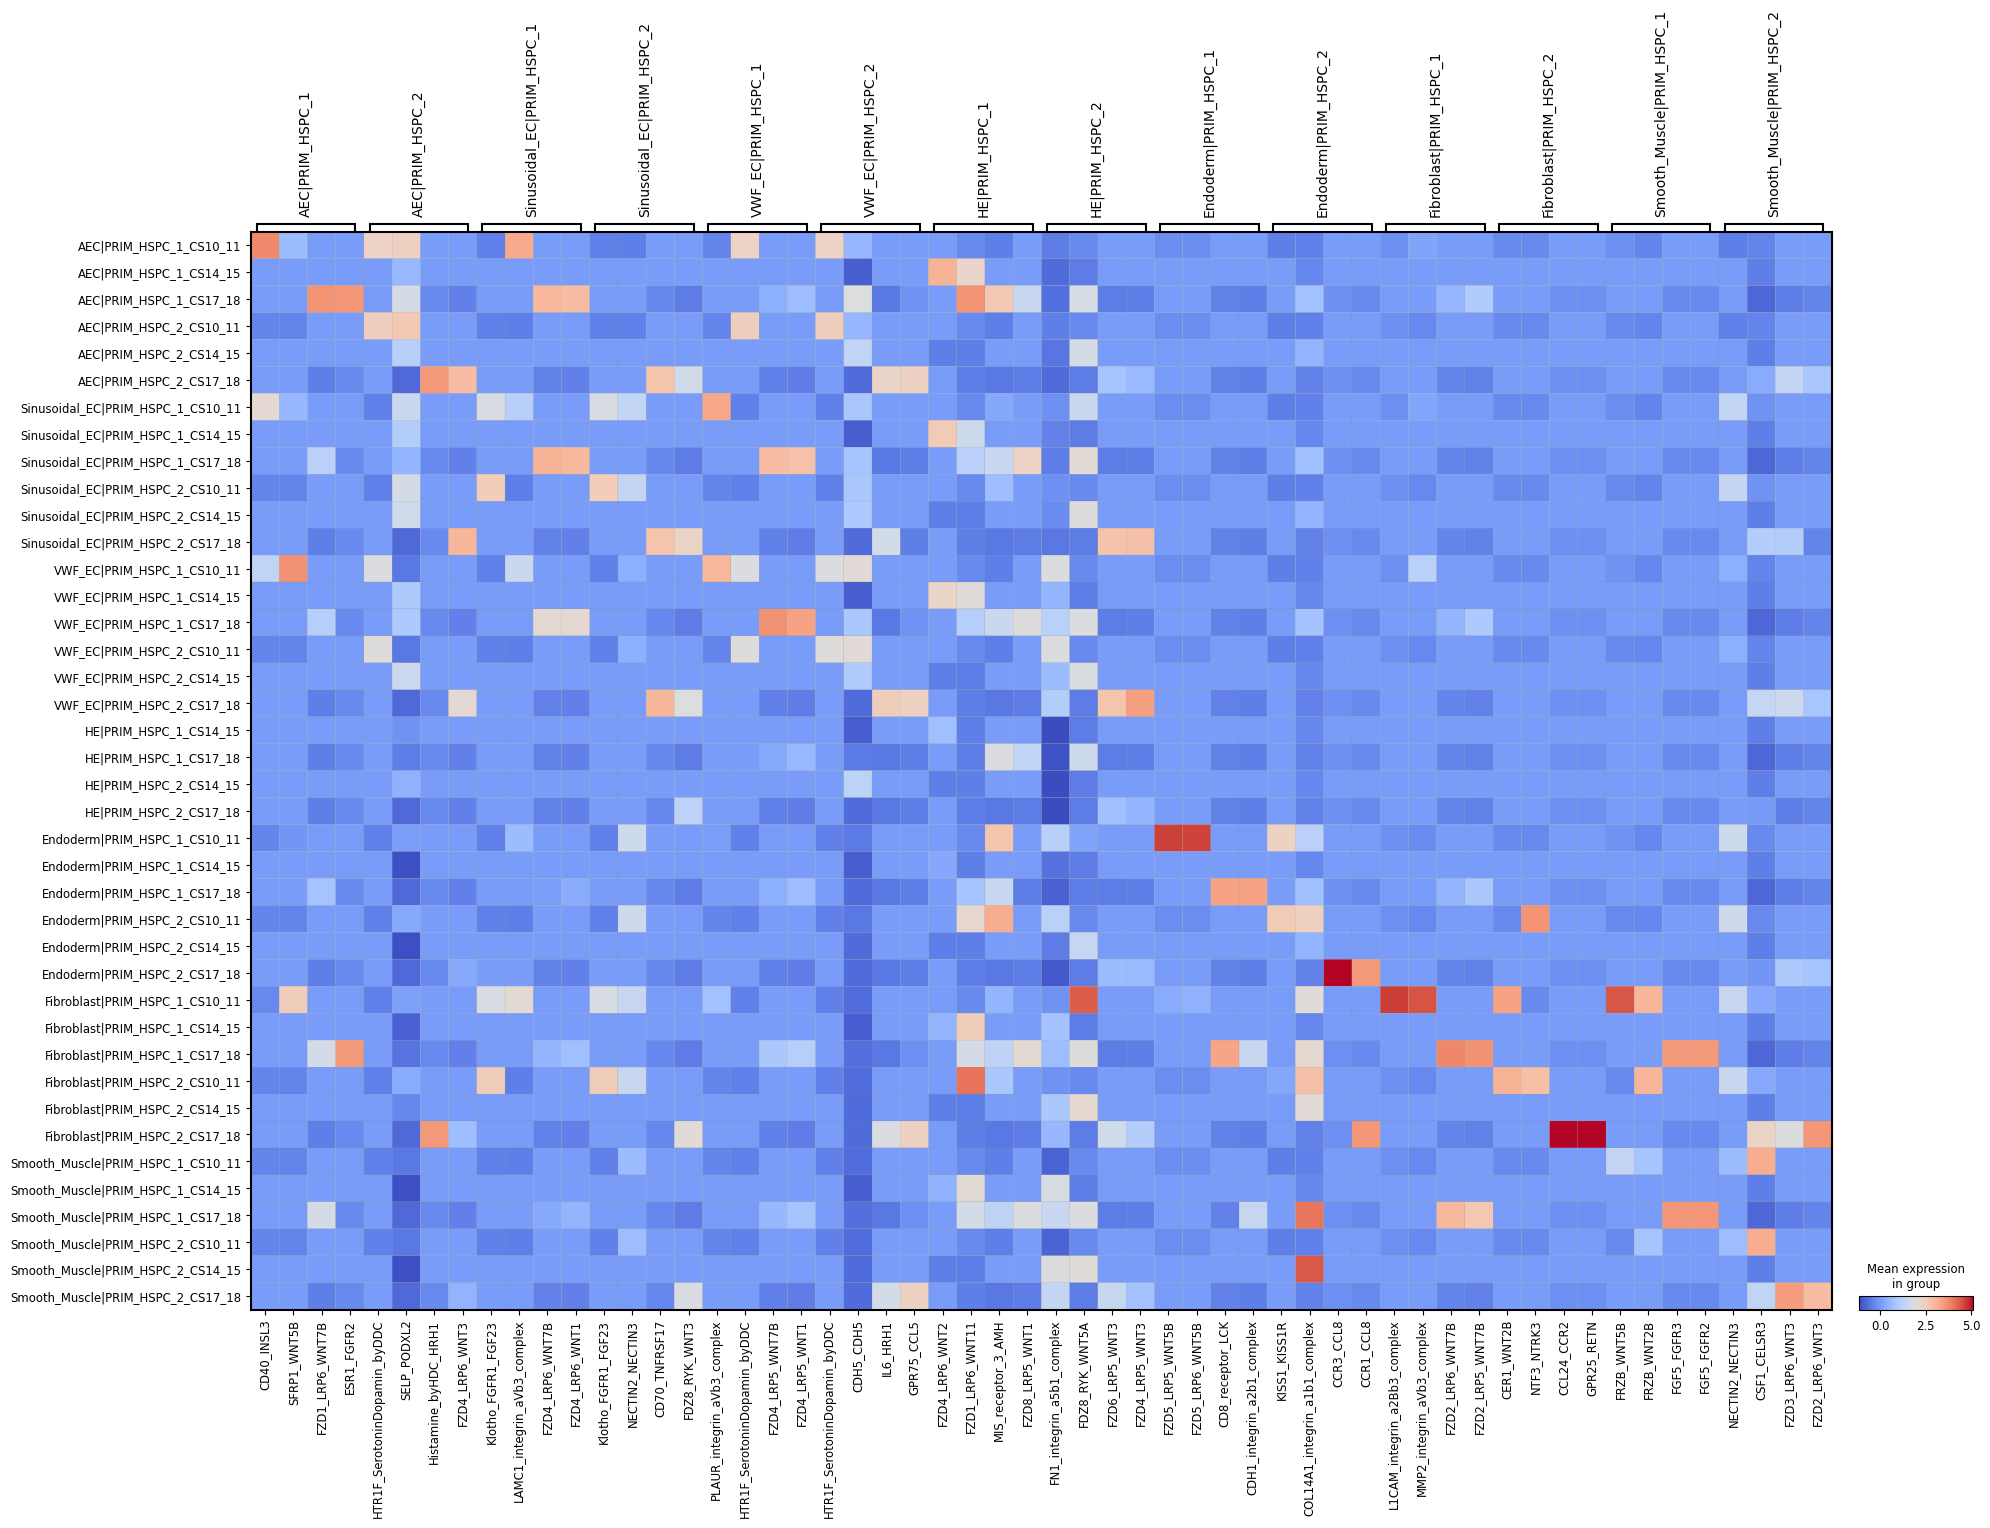

In [461]:
plt.rcdefaults()
(sc.pl.matrixplot(adata_prim, var_names = marker_dict, groupby='stage_pair',dendrogram=False,standard_scale=None, cmap='coolwarm', show = True,save = 'YS_HSPC_PRIM_maintenance_molecules_for_main.pdf'))

In [464]:
adata_prim

AnnData object with n_obs × n_vars = 40 × 1278
    obs: 'int_pair', 'stage', 'batch', 'stage_pair'
    var: 'id_cp_interaction', 'partner_a', 'partner_b', 'gene_a', 'gene_b', 'secreted', 'receptor_a', 'receptor_b', 'annotation_strategy', 'is_integrin', 'mean', 'std', 'total_expression'

In [463]:
marker_dict

{'AEC|PRIM_HSPC_1': ['CD40_INSL3',
  'SFRP1_WNT5B',
  'FZD1_LRP6_WNT7B',
  'ESR1_FGFR2'],
 'AEC|PRIM_HSPC_2': ['HTR1F_SerotoninDopamin_byDDC',
  'SELP_PODXL2',
  'Histamine_byHDC_HRH1',
  'FZD4_LRP6_WNT3'],
 'Sinusoidal_EC|PRIM_HSPC_1': ['Klotho_FGFR1_FGF23',
  'LAMC1_integrin_aVb3_complex',
  'FZD4_LRP6_WNT7B',
  'FZD4_LRP6_WNT1'],
 'Sinusoidal_EC|PRIM_HSPC_2': ['Klotho_FGFR1_FGF23',
  'NECTIN2_NECTIN3',
  'CD70_TNFRSF17',
  'FDZ8_RYK_WNT3'],
 'VWF_EC|PRIM_HSPC_1': ['PLAUR_integrin_aVb3_complex',
  'HTR1F_SerotoninDopamin_byDDC',
  'FZD4_LRP5_WNT7B',
  'FZD4_LRP5_WNT1'],
 'VWF_EC|PRIM_HSPC_2': ['HTR1F_SerotoninDopamin_byDDC',
  'CDH5_CDH5',
  'IL6_HRH1',
  'GPR75_CCL5'],
 'HE|PRIM_HSPC_1': ['FZD4_LRP6_WNT2',
  'FZD1_LRP6_WNT11',
  'MIS_receptor_3_AMH',
  'FZD8_LRP5_WNT1'],
 'HE|PRIM_HSPC_2': ['FN1_integrin_a5b1_complex',
  'FDZ8_RYK_WNT5A',
  'FZD6_LRP5_WNT3',
  'FZD4_LRP5_WNT3'],
 'Endoderm|PRIM_HSPC_1': ['FZD5_LRP5_WNT5B',
  'FZD5_LRP6_WNT5B',
  'CD8_receptor_LCK',
  'CDH1_integrin_

In [462]:
adata_exp

AnnData object with n_obs × n_vars = 169494 × 19015
    obs: 'cell.labels', 'stage', 'lanes', 'sex', 'sort.ids', 'fetal.ids', 'component', 'broad_cell.labels', 'sequencing.type', 'orig.dataset', 'broad_cell_labels_organ', 'tissue', 'V6_old_indexes', 'dataset_merge', 'index_orig', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'organ', 'donor', 'new_data_handle', 'batch', 'HDBR_ID', 'leiden_scvi_res15', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'scrublet_cluster_score', 'scr_bh_pval', 'scr_pval', 'scr_doublet_call_default', 'scrublet_leiden_R', 'cell_labels_lvl2', 'cell_labels_lvl3', 'cell_labels_lvl1'
    var: 'n_cells-0', 'mt-0', 'total_counts-0', 'highly_variable-0', 'intersect-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'gene_ids-3', 'feature_types-3', 'genome-3', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'cell.labels_colors', 'cell.label

In [64]:
list(adata.obs.loc[adata.obs['stage_pair'].str.contains('PRIM'),'stage_pair'])

['Endoderm|PRIM_HSPC_CS10_11',
 'Mesothelium|PRIM_HSPC_CS10_11',
 'Fibroblast|PRIM_HSPC_CS10_11',
 'Sinusoidal_EC|PRIM_HSPC_CS10_11',
 'PRIM_HSPC|PRIM_HSPC_CS10_11',
 'VWF_EC|PRIM_HSPC_CS10_11',
 'DEF_HSPC|PRIM_HSPC_CS10_11',
 'AEC|PRIM_HSPC_CS10_11',
 'Endoderm|PRIM_HSPC_CS14_15',
 'Fibroblast|PRIM_HSPC_CS14_15',
 'Smooth_Muscle|PRIM_HSPC_CS14_15',
 'VWF_EC|PRIM_HSPC_CS14_15',
 'Mesothelium|PRIM_HSPC_CS14_15',
 'Sinusoidal_EC|PRIM_HSPC_CS14_15',
 'PRIM_HSPC|PRIM_HSPC_CS14_15',
 'AEC|PRIM_HSPC_CS14_15',
 'DEF_HSPC|PRIM_HSPC_CS14_15',
 'HE|PRIM_HSPC_CS14_15',
 'Endoderm|PRIM_HSPC_CS17_18',
 'Fibroblast|PRIM_HSPC_CS17_18',
 'Mesothelium|PRIM_HSPC_CS17_18',
 'Smooth_Muscle|PRIM_HSPC_CS17_18',
 'PRIM_HSPC|PRIM_HSPC_CS17_18',
 'Sinusoidal_EC|PRIM_HSPC_CS17_18',
 'VWF_EC|PRIM_HSPC_CS17_18',
 'AEC|PRIM_HSPC_CS17_18',
 'DEF_HSPC|PRIM_HSPC_CS17_18',
 'HE|PRIM_HSPC_CS17_18']

# DEF plot

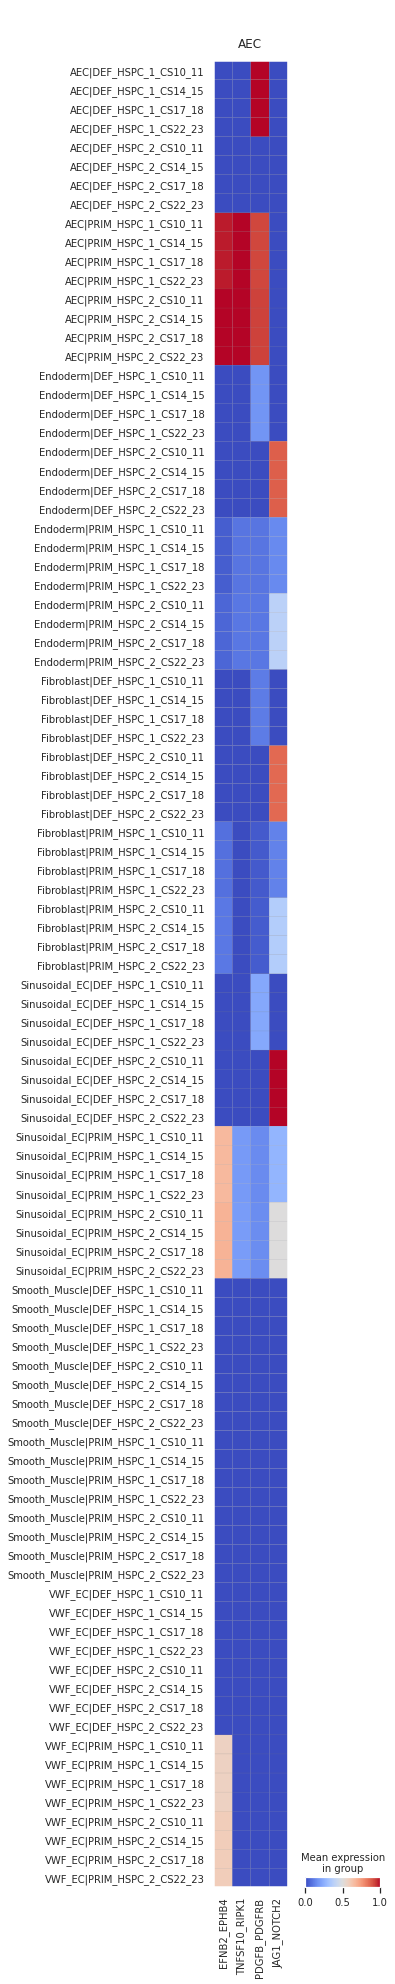

In [227]:
# adata.obs['stage_pair'] = adata.obs['stage_pair'].astype('category').cat.reorder_categories(list(exp_tbl_ordered.keys()))
exp_tbl_ordered = {
'AEC': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2',],
                   
#  'VWF_EC': ['PDGFB_PDGFR complex','TGFB2_TGFBR3', 'TGFB2_TGFbeta receptor1','IL35_IL35 receptor','DLL1_NOTCH2','CSF3_CSF3R','HLA-F_LILRB2','PLD2_ARF1'],
                   
#  'Endoderm': ['SPP1_a4b1 complex',"EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
#  'Fibroblast': ['WNT4_SMO', 'BMP10_VSIR','WNT7B_FZD4','GDF9_TGFR_BMPR2','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
                   
#  'Smooth_Muscle': ['TGFB3_TGFBR3','PLA2G2A_a5b1 complex','JAG1_NOTCH2','TGFB3_TGFbeta receptor1','PLA2G2A_a4b1 complex'],
}
(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False, standard_scale='var', cmap='coolwarm', show = True,save = 'YS_HSPC_maintenance_molecules_for_main.pdf')) # title=i
#(sc.pl.dotplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'YS_HSPC_maintenance_molecules_for_main.pdf')) # title=i
#(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'HSPC_maintenance_molecules_for_supp.pdf')) # title=i

In [40]:
adata.obs

int_pair    stage batch  \
index                                                                     
Endoderm|PRIM_HSPC_CS10_11            Endoderm|PRIM_HSPC  CS10_11     0   
Mesothelium|PRIM_HSPC_CS10_11      Mesothelium|PRIM_HSPC  CS10_11     0   
Fibroblast|PRIM_HSPC_CS10_11        Fibroblast|PRIM_HSPC  CS10_11     0   
Sinusoidal_EC|PRIM_HSPC_CS10_11  Sinusoidal_EC|PRIM_HSPC  CS10_11     0   
PRIM_HSPC|PRIM_HSPC_CS10_11          PRIM_HSPC|PRIM_HSPC  CS10_11     0   
Endoderm|DEF_HSPC_CS10_11              Endoderm|DEF_HSPC  CS10_11     0   
VWF_EC|PRIM_HSPC_CS10_11                VWF_EC|PRIM_HSPC  CS10_11     0   
Mesothelium|DEF_HSPC_CS10_11        Mesothelium|DEF_HSPC  CS10_11     0   
Sinusoidal_EC|DEF_HSPC_CS10_11    Sinusoidal_EC|DEF_HSPC  CS10_11     0   
DEF_HSPC|PRIM_HSPC_CS10_11            DEF_HSPC|PRIM_HSPC  CS10_11     0   
AEC|PRIM_HSPC_CS10_11                      AEC|PRIM_HSPC  CS10_11     0   
Fibroblast|DEF_HSPC_CS10_11          Fibroblast|DEF_HSPC  CS10_11     0   
VWF_EC|DEF_HSPC_CS10_11                  VWF_EC|DEF_HSPC  CS10_11     0   
AEC|DEF_HSPC_CS10_11                        AEC|DEF_HSPC  CS10_11     0   
Endoderm|PRIM_HSPC_CS14_15            Endoderm|PRIM_HSPC  CS14_15     1   
Endoderm|DEF_HSPC_CS14_15              Endoderm|DEF_HSPC  CS14_15     1   
Fibroblast|PRIM_HSPC_CS14_15        Fibroblast|PRIM_HSPC  CS14_15     1   
Smooth_Muscle|PRIM_HSPC_CS14_15  Smooth_Muscle|PRIM_HSPC  CS14_15     1   
Fibroblast|DEF_HSPC_CS14_15          Fibroblast|DEF_HSPC  CS14_15     1   
VWF_EC|PRIM_HSPC_CS14_15                VWF_EC|PRIM_HSPC  CS14_15     1   
Mesothelium|PRIM_HSPC_CS14_15      Mesothelium|PRIM_HSPC  CS14_15     1   
VWF_EC|DEF_HSPC_CS14_15                  VWF_EC|DEF_HSPC  CS14_15     1   
Sinusoidal_EC|DEF_HSPC_CS14_15    Sinusoidal_EC|DEF_HSPC  CS14_15     1   
Mesothelium|DEF_HSPC_CS14_15        Mesothelium|DEF_HSPC  CS14_15     1   
Sinusoidal_EC|PRIM_HSPC_CS14_15  Sinusoidal_EC|PRIM_HSPC  CS14_15     1   
Smooth_Muscle|DEF_HSPC_CS14_15    Smooth_Muscle|DEF_HSPC  CS14_15     1   
PRIM_HSPC|PRIM_HSPC_CS14_15          PRIM_HSPC|PRIM_HSPC  CS14_15     1   
AEC|DEF_HSPC_CS14_15                        AEC|DEF_HSPC  CS14_15     1   
AEC|PRIM_HSPC_CS14_15                      AEC|PRIM_HSPC  CS14_15     1   
DEF_HSPC|PRIM_HSPC_CS14_15            DEF_HSPC|PRIM_HSPC  CS14_15     1   
HE|DEF_HSPC_CS14_15                          HE|DEF_HSPC  CS14_15     1   
HE|PRIM_HSPC_CS14_15                        HE|PRIM_HSPC  CS14_15     1   
Endoderm|DEF_HSPC_CS17_18              Endoderm|DEF_HSPC  CS17_18     2   
Endoderm|PRIM_HSPC_CS17_18            Endoderm|PRIM_HSPC  CS17_18     2   
Fibroblast|DEF_HSPC_CS17_18          Fibroblast|DEF_HSPC  CS17_18     2   
Mesothelium|DEF_HSPC_CS17_18        Mesothelium|DEF_HSPC  CS17_18     2   
Smooth_Muscle|DEF_HSPC_CS17_18    Smooth_Muscle|DEF_HSPC  CS17_18     2   
Fibroblast|PRIM_HSPC_CS17_18        Fibroblast|PRIM_HSPC  CS17_18     2   
Mesothelium|PRIM_HSPC_CS17_18      Mesothelium|PRIM_HSPC  CS17_18     2   
Smooth_Muscle|PRIM_HSPC_CS17_18  Smooth_Muscle|PRIM_HSPC  CS17_18     2   
PRIM_HSPC|PRIM_HSPC_CS17_18          PRIM_HSPC|PRIM_HSPC  CS17_18     2   
VWF_EC|DEF_HSPC_CS17_18                  VWF_EC|DEF_HSPC  CS17_18     2   
AEC|DEF_HSPC_CS17_18                        AEC|DEF_HSPC  CS17_18     2   
Sinusoidal_EC|DEF_HSPC_CS17_18    Sinusoidal_EC|DEF_HSPC  CS17_18     2   
Sinusoidal_EC|PRIM_HSPC_CS17_18  Sinusoidal_EC|PRIM_HSPC  CS17_18     2   
VWF_EC|PRIM_HSPC_CS17_18                VWF_EC|PRIM_HSPC  CS17_18     2   
AEC|PRIM_HSPC_CS17_18                      AEC|PRIM_HSPC  CS17_18     2   
DEF_HSPC|PRIM_HSPC_CS17_18            DEF_HSPC|PRIM_HSPC  CS17_18     2   
HE|DEF_HSPC_CS17_18                          HE|DEF_HSPC  CS17_18     2   
HE|PRIM_HSPC_CS17_18                        HE|PRIM_HSPC  CS17_18     2   
Fibroblast|DEF_HSPC_CS22_23          Fibroblast|DEF_HSPC  CS22_23     3   
Mesothelium|DEF_HSPC_CS22_23        Mesothelium|DEF_HSPC  CS22_23     3  

In [37]:
list(exp_tbl_ordered.keys())

['AEC|DEF_HSPC_+CS10_11',
 'AEC|DEF_HSPC_+CS14_15',
 'AEC|DEF_HSPC_+CS17_18',
 'AEC|DEF_HSPC_+CS22_23',
 'AEC|PRIM_HSPC_+CS10_11',
 'AEC|PRIM_HSPC_+CS14_15',
 'AEC|PRIM_HSPC_+CS17_18',
 'DEF_HSPC|PRIM_HSPC_+CS10_11',
 'DEF_HSPC|PRIM_HSPC_+CS14_15',
 'DEF_HSPC|PRIM_HSPC_+CS17_18',
 'Endoderm|DEF_HSPC_+CS10_11',
 'Endoderm|DEF_HSPC_+CS14_15',
 'Endoderm|DEF_HSPC_+CS17_18',
 'Endoderm|DEF_HSPC_+CS22_23',
 'Endoderm|PRIM_HSPC_+CS10_11',
 'Endoderm|PRIM_HSPC_+CS14_15',
 'Endoderm|PRIM_HSPC_+CS17_18',
 'Fibroblast|DEF_HSPC_+CS10_11',
 'Fibroblast|DEF_HSPC_+CS14_15',
 'Fibroblast|DEF_HSPC_+CS17_18',
 'Fibroblast|DEF_HSPC_+CS22_23',
 'Fibroblast|PRIM_HSPC_+CS10_11',
 'Fibroblast|PRIM_HSPC_+CS14_15',
 'Fibroblast|PRIM_HSPC_+CS17_18',
 'HE|DEF_HSPC_+CS14_15',
 'HE|DEF_HSPC_+CS17_18',
 'HE|PRIM_HSPC_+CS14_15',
 'HE|PRIM_HSPC_+CS17_18',
 'Mesothelium|DEF_HSPC_+CS10_11',
 'Mesothelium|DEF_HSPC_+CS14_15',
 'Mesothelium|DEF_HSPC_+CS17_18',
 'Mesothelium|DEF_HSPC_+CS22_23',
 'Mesothelium|PRIM_HSPC_+CS

# PRIM HSPC plot

In [142]:
key = 'PRIM_HSPC'
key2 = 'DEF_HSPC'
res_filter = dict(filter(lambda item: key  in item[0], exp_tbl_ordered.items()))
res = {}
for keys in res_filter.keys():
    if not keys.startswith(key2) | keys.startswith(key):
        res[keys]=res_filter[keys]

In [144]:
adata_temp = adata[adata.obs.index.str.contains(key)]
adata_temp.obs

int_pair    stage batch  \
index                                                                     
Endoderm|PRIM_HSPC_CS10_11            Endoderm|PRIM_HSPC  CS10_11     0   
Mesothelium|PRIM_HSPC_CS10_11      Mesothelium|PRIM_HSPC  CS10_11     0   
Fibroblast|PRIM_HSPC_CS10_11        Fibroblast|PRIM_HSPC  CS10_11     0   
Sinusoidal_EC|PRIM_HSPC_CS10_11  Sinusoidal_EC|PRIM_HSPC  CS10_11     0   
PRIM_HSPC|PRIM_HSPC_CS10_11          PRIM_HSPC|PRIM_HSPC  CS10_11     0   
VWF_EC|PRIM_HSPC_CS10_11                VWF_EC|PRIM_HSPC  CS10_11     0   
DEF_HSPC|PRIM_HSPC_CS10_11            DEF_HSPC|PRIM_HSPC  CS10_11     0   
AEC|PRIM_HSPC_CS10_11                      AEC|PRIM_HSPC  CS10_11     0   
Endoderm|PRIM_HSPC_CS14_15            Endoderm|PRIM_HSPC  CS14_15     1   
Fibroblast|PRIM_HSPC_CS14_15        Fibroblast|PRIM_HSPC  CS14_15     1   
Smooth_Muscle|PRIM_HSPC_CS14_15  Smooth_Muscle|PRIM_HSPC  CS14_15     1   
VWF_EC|PRIM_HSPC_CS14_15                VWF_EC|PRIM_HSPC  CS14_15     1   
Mesothelium|PRIM_HSPC_CS14_15      Mesothelium|PRIM_HSPC  CS14_15     1   
Sinusoidal_EC|PRIM_HSPC_CS14_15  Sinusoidal_EC|PRIM_HSPC  CS14_15     1   
PRIM_HSPC|PRIM_HSPC_CS14_15          PRIM_HSPC|PRIM_HSPC  CS14_15     1   
AEC|PRIM_HSPC_CS14_15                      AEC|PRIM_HSPC  CS14_15     1   
DEF_HSPC|PRIM_HSPC_CS14_15            DEF_HSPC|PRIM_HSPC  CS14_15     1   
HE|PRIM_HSPC_CS14_15                        HE|PRIM_HSPC  CS14_15     1   
Endoderm|PRIM_HSPC_CS17_18            Endoderm|PRIM_HSPC  CS17_18     2   
Fibroblast|PRIM_HSPC_CS17_18        Fibroblast|PRIM_HSPC  CS17_18     2   
Mesothelium|PRIM_HSPC_CS17_18      Mesothelium|PRIM_HSPC  CS17_18     2   
Smooth_Muscle|PRIM_HSPC_CS17_18  Smooth_Muscle|PRIM_HSPC  CS17_18     2   
PRIM_HSPC|PRIM_HSPC_CS17_18          PRIM_HSPC|PRIM_HSPC  CS17_18     2   
Sinusoidal_EC|PRIM_HSPC_CS17_18  Sinusoidal_EC|PRIM_HSPC  CS17_18     2   
VWF_EC|PRIM_HSPC_CS17_18                VWF_EC|PRIM_HSPC  CS17_18     2   
AEC|PRIM_HSPC_CS17_18                      AEC|PRIM_HSPC  CS17_18     2   
DEF_HSPC|PRIM_HSPC_CS17_18            DEF_HSPC|PRIM_HSPC  CS17_18     2   
HE|PRIM_HSPC_CS17_18                        HE|PRIM_HSPC  CS17_18     2   

                                                      stage_pair  
index                                                             
Endoderm|PRIM_HSPC_CS10_11            Endoderm|PRIM_HSPC_CS10_11  
Mesothelium|PRIM_HSPC_CS10_11      Mesothelium|PRIM_HSPC_CS10_11  
Fibroblast|PRIM_HSPC_CS10_11        Fibroblast|PRIM_HSPC_CS10_11  
Sinusoidal_EC|PRIM_HSPC_CS10_11  Sinusoidal_EC|PRIM_HSPC_CS10_11  
PRIM_HSPC|PRIM_HSPC_CS10_11          PRIM_HSPC|PRIM_HSPC_CS10_11  
VWF_EC|PRIM_HSPC_CS10_11                VWF_EC|PRIM_HSPC_CS10_11  
DEF_HSPC|PRIM_HSPC_CS10_11            DEF_HSPC|PRIM_HSPC_CS10_11  
AEC|PRIM_HSPC_CS10_11                      AEC|PRIM_HSPC_CS10_11  
Endoderm|PRIM_HSPC_CS14_15            Endoderm|PRIM_HSPC_CS14_15  
Fibroblast|PRIM_HSPC_CS14_15        Fibroblast|PRIM_HSPC_CS14_15  
Smooth_Muscle|PRIM_HSPC_CS14_15  Smooth_Muscle|PRIM_HSPC_CS14_15  
VWF_EC|PRIM_HSPC_CS14_15                VWF_EC|PRIM_HSPC_CS14_15  
Mesothelium|PRIM_HSPC_CS14_15      Mesothelium|PRIM_HSPC_CS14_15  
Sinusoidal_EC|PRIM_HSPC_CS14_15  Sinusoidal_EC|PRIM_HSPC_CS14_15  
PRIM_HSPC|PRIM_HSPC_CS14_15          PRIM_HSPC|PRIM_HSPC_CS14_15  
AEC|PRIM_HSPC_CS14_15                      AEC|PRIM_HSPC_CS14_15  
DEF_HSPC|PRIM_HSPC_CS14_15            DEF_HSPC|PRIM_HSPC_CS14_15  
HE|PRIM_HSPC_CS14_15                        HE|PRIM_HSPC_CS14_15  
Endoderm|PRIM_HSPC_CS17_18            Endoderm|PRIM_HSPC_CS17_18  
Fibroblast|PRIM_HSPC_CS17_18        Fibroblast|PRIM_HSPC_CS17_18  
Mesothelium|PRIM_HSPC_CS17_18      Mesothelium|PRIM_HSPC_CS17_18  
Smooth_Muscle|PRIM_HSPC_CS17_18  Smooth_Muscle|PRIM_HSPC_CS17_18  
PRIM_HSPC|PRIM_HSPC_CS17_18          PRIM_HSPC|PRIM_HSPC_CS17_18  
Sinusoidal_EC|PRIM_HSPC_CS17_18  Sinusoidal_EC|PRIM_HSPC_CS17_18  
VWF_EC|PRIM_HSPC_CS17_18                VWF_EC|PRIM_HSP

# Q1 HSPC to EC communication

In [3]:
# cpdb_database = {
# 'CS10_11':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_030522_notebooks/cellphonedb/YS_all_HSPC_overtime/CS10_11_cell_labels_lvl2_cpdb_YS_overtime/significant_means.txt',
# 'CS14_15':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_030522_notebooks/cellphonedb/YS_all_HSPC_overtime/CS14_15_cell_labels_lvl2_cpdb_YS_overtime/significant_means.txt',
# 'CS17_18':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_030522_notebooks/cellphonedb/YS_all_HSPC_overtime/CS17_18_cell_labels_lvl2_cpdb_YS_overtime/significant_means.txt',
# 'CS22_23':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_030522_notebooks/cellphonedb/YS_all_HSPC_overtime/CS22_23_cell_labels_lvl2_cpdb_YS_overtime/significant_means.txt',
# }
cpdb_database = {
'CS10_11':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_030522_notebooks/cellphonedb/YS_all_HSPC_overtime/CS10_11_cell_labels_lvl2_cpdb_YS_overtime/means.txt',
'CS14_15':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_030522_notebooks/cellphonedb/YS_all_HSPC_overtime/CS14_15_cell_labels_lvl2_cpdb_YS_overtime/means.txt',
'CS17_18':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_030522_notebooks/cellphonedb/YS_all_HSPC_overtime/CS17_18_cell_labels_lvl2_cpdb_YS_overtime/means.txt',
'CS22_23':'/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_030522_notebooks/cellphonedb/YS_all_HSPC_overtime/CS22_23_cell_labels_lvl2_cpdb_YS_overtime/means.txt',
}


<ipython-input-4-0724b48bda99>:35: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.endswith('HSPC_1')]) | (cpdb_interaction.columns[cpdb_interaction.columns.str.endswith('HSPC_2')])].fillna(0)
<ipython-input-4-0724b48bda99>:71: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.endswith('HSPC_1')]) | (cpdb_interaction.columns[cpdb_interaction.columns.str.endswith('HSPC_2')])].fillna(0)
<ipython-input-4-0724b48bda99>:91: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explici

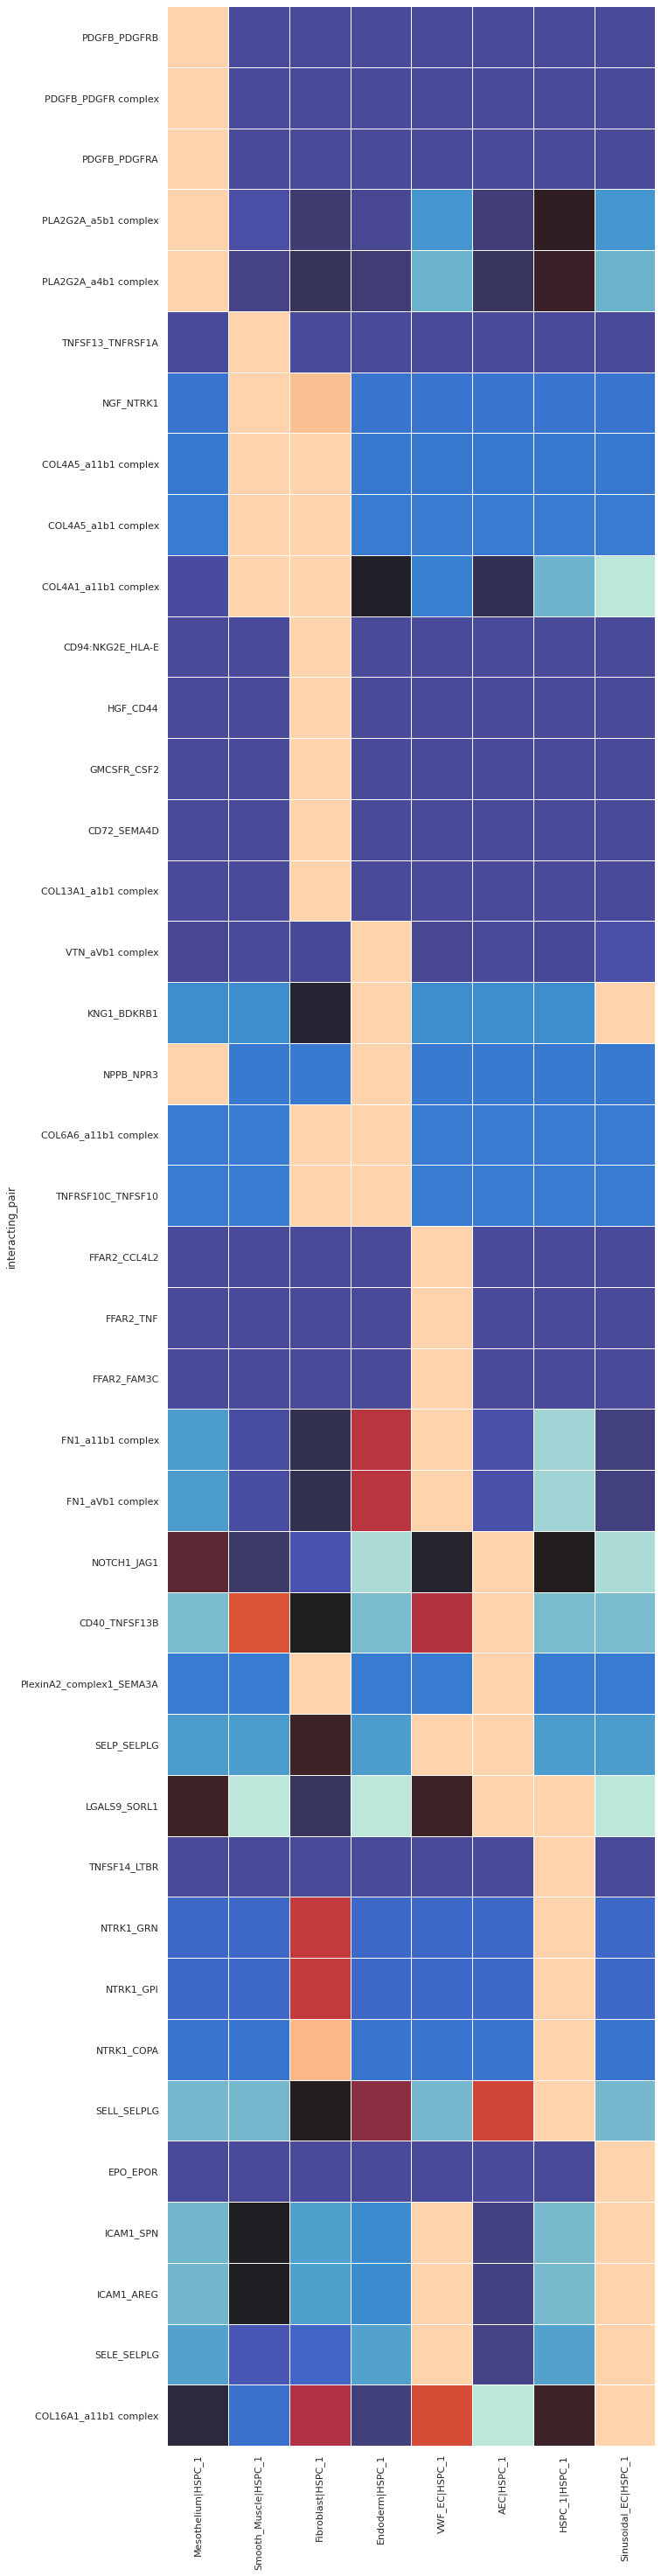

In [4]:
exp_tbl = {}

adatas = []
for cpdb_dat in cpdb_database:
    cpdb = pd.read_csv(cpdb_database[cpdb_dat], delimiter = "\t",index_col=0)
    
    keep = [
     'Sinusoidal_EC',
     'HSPC_1',
     'Endoderm',
     'Mesothelium',
     'Fibroblast',
     'AEC',
     'VWF_EC',
     'Smooth_Muscle',
     'HE',
    ]
    from itertools import product
    combi = (pd.DataFrame(product(keep,keep)))
    combi['combi'] = combi.iloc[:,0].astype(str) + "|" +combi.iloc[:,1].astype(str)
    cpdb_metrics = ['interacting_pair',
     'partner_a',
     'partner_b',
     'gene_a',
     'gene_b',
     'secreted',
     'receptor_a',
     'receptor_b',
     'annotation_strategy',
     'is_integrin',
     ]#'rank',
    cpdb_interaction = cpdb[cpdb.columns[cpdb.columns.isin(cpdb_metrics+list(combi['combi']))]]#cpdb[cpdb_metrics+list(combi['combi'])]

    #cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.startswith('PRIM')]) & (cpdb_interaction.columns[~cpdb_interaction.columns.str.endswith('HSPC_1')]) & (cpdb_interaction.columns[~cpdb_interaction.columns.str.endswith('HSPC_2')])].fillna(0)
    cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.endswith('HSPC_1')]) | (cpdb_interaction.columns[cpdb_interaction.columns.str.endswith('HSPC_2')])].fillna(0)
    # rankings and reorder
    ranking_col = pd.DataFrame(cpdb_tmp.sum(axis=0, skipna=True, level=None)).sort_values(by=[0],ascending=False)
    cpdb_tmp = cpdb_tmp[list(ranking_col.index)]
    # Remove 0 interacting rows
    cpdb_tmp = cpdb_tmp.loc[(cpdb_tmp.sum(axis=1) != 0), (cpdb_tmp.sum(axis=0) != 0)]
    cpdb_tmp =  pd.concat([cpdb_interaction[cpdb_metrics][cpdb_interaction.index.isin(cpdb_tmp.index)] ,cpdb_tmp], axis = 1)#add metrics back
    # cpdb_tmp[cpdb_metrics] = cpdb_interaction[cpdb_metrics][cpdb_interaction.index.isin(cpdb_tmp.index)] #add metrics back

    # Raning rows and reorder
    ranking_row =  pd.DataFrame(cpdb_tmp[cpdb_tmp.columns[~cpdb_tmp.columns.isin(cpdb_metrics)]].sum(axis=1, skipna=True, level=None)).sort_values(by=[0],ascending=False)
    cpdb_tmp = cpdb_tmp.T[list(ranking_row.index)].T
    cpdb_tmp_plot = cpdb_tmp.drop((cpdb_metrics[0:len(cpdb_metrics)]),axis = 1)

    import scipy.stats as stats
    cpdb_tmp_plot = cpdb_tmp_plot.T
    for i in list(range(0,len(cpdb_tmp_plot.columns))):
        cpdb_tmp_plot.iloc[:,i] = stats.zscore(list(cpdb_tmp_plot.iloc[:,i]))
    cpdb_tmp_plot = cpdb_tmp_plot.T
    cpdb_tmp_plot[cpdb_metrics[0]] = cpdb_tmp[cpdb_metrics[0]]


    cpdb_tmp_plot.index = cpdb_tmp_plot['interacting_pair']
    cpdb_tmp_plot = cpdb_tmp_plot.drop(['interacting_pair'],axis = 1)
#    sns.heatmap(cpdb_tmp_plot,  annot=False,vmin=-1, vmax=1, linewidths=1, center=0, square=True, cbar_kws={"shrink": 0.5})


    keep = []
    for i in ranking_col.index:
        keep.extend(list(cpdb_tmp_plot[i].nlargest(5).index))
    cpdb_tmp_plot_top = cpdb_tmp_plot.T[keep].T
#    sns.heatmap(cpdb_tmp_plot_top,  annot=False,vmin=-1, vmax=1, linewidths=1, center=0, square=True, cbar_kws={"shrink": 0.5})
    
#######################################################    

        #cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.startswith('PRIM')]) & (cpdb_interaction.columns[~cpdb_interaction.columns.str.endswith('HSPC_1')]) & (cpdb_interaction.columns[~cpdb_interaction.columns.str.endswith('HSPC_2')])].fillna(0)
    cpdb_tmp = cpdb_interaction[(cpdb_interaction.columns[cpdb_interaction.columns.str.endswith('HSPC_1')]) | (cpdb_interaction.columns[cpdb_interaction.columns.str.endswith('HSPC_2')])].fillna(0)
    # rankings and reorder
    ranking_col = pd.DataFrame(cpdb_tmp.sum(axis=0, skipna=True, level=None)).sort_values(by=[0],ascending=False)
    cpdb_tmp = cpdb_tmp[list(ranking_col.index)]
    # Remove 0 interacting rows
    cpdb_tmp = cpdb_tmp.loc[(cpdb_tmp.sum(axis=1) != 0), (cpdb_tmp.sum(axis=0) != 0)]
    cpdb_tmp =  pd.concat([cpdb_interaction[cpdb_metrics][cpdb_interaction.index.isin(cpdb_tmp.index)] ,cpdb_tmp], axis = 1)#add metrics back
    # cpdb_tmp[cpdb_metrics] = cpdb_interaction[cpdb_metrics][cpdb_interaction.index.isin(cpdb_tmp.index)] #add metrics back

    # Raning rows and reorder
    ranking_row =  pd.DataFrame(cpdb_tmp[cpdb_tmp.columns[~cpdb_tmp.columns.isin(cpdb_metrics)]].sum(axis=1, skipna=True, level=None)).sort_values(by=[0],ascending=False)
    cpdb_tmp = cpdb_tmp.T[list(ranking_row.index)].T
    cpdb_tmp_plot = cpdb_tmp.drop((cpdb_metrics[0:len(cpdb_metrics)]),axis = 1)
    
    
    # write outs:
    cpdb_tmp.to_csv(out_path+'/'+cpdb_dat+'_top_interactions.csv')
    c_mat =  cpdb_tmp[cpdb_tmp.columns[cpdb_tmp.columns.isin(list(combi['combi']))]]#cpdb[cpdb_metrics+list(combi['combi'])]

    import anndata
    adata_temp = anndata.AnnData(X= c_mat.T)
    adata_temp.obs.reset_index(level=0,drop=False,inplace =True)
    adata_temp.obs['int_pair'] = adata_temp.obs['index'].copy()
    adata_temp.obs['index'] = adata_temp.obs['index'] + '_'+ cpdb_dat
    adata_temp.obs['stage'] = cpdb_dat
    adata_temp.obs.set_index('index',inplace = True)
    adata_temp.var[cpdb_metrics] = cpdb_tmp[cpdb_metrics]
    adata_temp.var.reset_index(inplace=True)
    adata_temp.var.set_index('interacting_pair',inplace= True)
    adata_temp.var = adata_temp.var.astype(str)
    adata_temp.X = np.nan_to_num(adata_temp.X, copy=True, nan=0.0, posinf=None, neginf=None)
    sc.pp.scale(adata_temp, zero_center=True)
    adata_temp.write('./'+cpdb_dat+'_cpdb_int.h5ad')
    adatas.append(adata_temp)
    
    import scipy.stats as stats
    cpdb_tmp_plot = cpdb_tmp_plot.T
    for i in list(range(0,len(cpdb_tmp_plot.columns))):
        cpdb_tmp_plot.iloc[:,i] = stats.zscore(list(cpdb_tmp_plot.iloc[:,i]))
    cpdb_tmp_plot = cpdb_tmp_plot.T
    cpdb_tmp_plot[cpdb_metrics[0]] = cpdb_tmp[cpdb_metrics[0]]


    cpdb_tmp_plot.index = cpdb_tmp_plot['interacting_pair']
    cpdb_tmp_plot = cpdb_tmp_plot.drop(['interacting_pair'],axis = 1)
#     sns.heatmap(cpdb_tmp_plot,  annot=False,vmin=-1, vmax=1, linewidths=1, center=0, square=True, cbar_kws={"shrink": 0.5})


    keep = []
    for i in ranking_col.index:
        keep.extend(list(cpdb_tmp_plot[i].nlargest(5).index))
        exp_tbl[i+'_+'+cpdb_dat] = list(cpdb_tmp_plot[i].nlargest(5).index)
    cpdb_tmp_plot_top = cpdb_tmp_plot.T[keep].T
#     sns.heatmap(cpdb_tmp_plot_top,  annot=False,vmin=-1, vmax=1, linewidths=1, center=0, square=True, cbar_kws={"shrink": 0.5})
    
#######################################################    
    
    keep = []
    for i in ranking_col.index:
        keep.extend(list(cpdb_tmp_plot[i].nlargest(5).index))
    cpdb_tmp_plot_top = cpdb_tmp_plot.T[keep].T
    fig = sns.heatmap(cpdb_tmp_plot_top,  annot=False,vmin=-1, vmax=1, linewidths=1, center=0, square=True,cbar=False)#cbar_kws={"shrink": 0.5}
    fig = fig.get_figure()
    fig.savefig(bbox_inches='tight',fname = cpdb_dat+'_interactions.pdf')

In [5]:
var_temp = pd.DataFrame(columns = adatas[0].var.columns)
for i in adatas:
#     print(i.var.columns)
    var_temp = pd.concat([var_temp,i.var])
var_temp =  var_temp.drop_duplicates("id_cp_interaction")

adata = adatas[0].concatenate(adatas[1:],join='outer',index_unique= None)
var_temp =var_temp.loc[adata.var.index]
adata.var = var_temp

/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [6]:
adata.obs['stage_pair'] = adata.obs['int_pair'].astype(str) + '_' + adata.obs['stage'].astype(str)
adata.var['total_expression'] = adata.X.sum(0)
# exp_tbl = {}
# for stage_group in adata.obs['stage_pair'].unique():
#     exp_tbl[stage_group] = adata[adata.obs['stage_pair'].isin([stage_group])].var['total_expression'].nlargest(10).index.tolist()

In [7]:
pd.DataFrame(adata.X,index = adata.obs.index,columns = adata.var.index).to_csv('YS_HSPC_overtime_combined.csv')

In [9]:
exp_tbl_ordered = {k: exp_tbl[k] for k in sorted(list(exp_tbl.keys()))}
adata.X = np.nan_to_num(adata.X, copy=True, nan=0.0, posinf=None, neginf=None)

In [8]:
adata.obs

int_pair    stage batch  \
index                                                               
Endoderm|HSPC_1_CS10_11            Endoderm|HSPC_1  CS10_11     0   
Fibroblast|HSPC_1_CS10_11        Fibroblast|HSPC_1  CS10_11     0   
Sinusoidal_EC|HSPC_1_CS10_11  Sinusoidal_EC|HSPC_1  CS10_11     0   
HSPC_1|HSPC_1_CS10_11                HSPC_1|HSPC_1  CS10_11     0   
Mesothelium|HSPC_1_CS10_11      Mesothelium|HSPC_1  CS10_11     0   
VWF_EC|HSPC_1_CS10_11                VWF_EC|HSPC_1  CS10_11     0   
AEC|HSPC_1_CS10_11                      AEC|HSPC_1  CS10_11     0   
Endoderm|HSPC_1_CS14_15            Endoderm|HSPC_1  CS14_15     1   
Fibroblast|HSPC_1_CS14_15        Fibroblast|HSPC_1  CS14_15     1   
AEC|HSPC_1_CS14_15                      AEC|HSPC_1  CS14_15     1   
Smooth_Muscle|HSPC_1_CS14_15  Smooth_Muscle|HSPC_1  CS14_15     1   
Mesothelium|HSPC_1_CS14_15      Mesothelium|HSPC_1  CS14_15     1   
Sinusoidal_EC|HSPC_1_CS14_15  Sinusoidal_EC|HSPC_1  CS14_15     1   
HSPC_1|HSPC_1_CS14_15                HSPC_1|HSPC_1  CS14_15     1   
VWF_EC|HSPC_1_CS14_15                VWF_EC|HSPC_1  CS14_15     1   
HE|HSPC_1_CS14_15                        HE|HSPC_1  CS14_15     1   
Endoderm|HSPC_1_CS17_18            Endoderm|HSPC_1  CS17_18     2   
Fibroblast|HSPC_1_CS17_18        Fibroblast|HSPC_1  CS17_18     2   
Smooth_Muscle|HSPC_1_CS17_18  Smooth_Muscle|HSPC_1  CS17_18     2   
Mesothelium|HSPC_1_CS17_18      Mesothelium|HSPC_1  CS17_18     2   
VWF_EC|HSPC_1_CS17_18                VWF_EC|HSPC_1  CS17_18     2   
AEC|HSPC_1_CS17_18                      AEC|HSPC_1  CS17_18     2   
Sinusoidal_EC|HSPC_1_CS17_18  Sinusoidal_EC|HSPC_1  CS17_18     2   
HSPC_1|HSPC_1_CS17_18                HSPC_1|HSPC_1  CS17_18     2   
HE|HSPC_1_CS17_18                        HE|HSPC_1  CS17_18     2   
Mesothelium|HSPC_1_CS22_23      Mesothelium|HSPC_1  CS22_23     3   
Smooth_Muscle|HSPC_1_CS22_23  Smooth_Muscle|HSPC_1  CS22_23     3   
Fibroblast|HSPC_1_CS22_23        Fibroblast|HSPC_1  CS22_23     3   
Endoderm|HSPC_1_CS22_23            Endoderm|HSPC_1  CS22_23     3   
VWF_EC|HSPC_1_CS22_23                VWF_EC|HSPC_1  CS22_23     3   
AEC|HSPC_1_CS22_23                      AEC|HSPC_1  CS22_23     3   
HSPC_1|HSPC_1_CS22_23                HSPC_1|HSPC_1  CS22_23     3   
Sinusoidal_EC|HSPC_1_CS22_23  Sinusoidal_EC|HSPC_1  CS22_23     3   

                                                stage_pair  
index                                                       
Endoderm|HSPC_1_CS10_11            Endoderm|HSPC_1_CS10_11  
Fibroblast|HSPC_1_CS10_11        Fibroblast|HSPC_1_CS10_11  
Sinusoidal_EC|HSPC_1_CS10_11  Sinusoidal_EC|HSPC_1_CS10_11  
HSPC_1|HSPC_1_CS10_11                HSPC_1|HSPC_1_CS10_11  
Mesothelium|HSPC_1_CS10_11      Mesothelium|HSPC_1_CS10_11  
VWF_EC|HSPC_1_CS10_11                VWF_EC|HSPC_1_CS10_11  
AEC|HSPC_1_CS10_11                      AEC|HSPC_1_CS10_11  
Endoderm|HSPC_1_CS14_15            Endoderm|HSPC_1_CS14_15  
Fibroblast|HSPC_1_CS14_15        Fibroblast|HSPC_1_CS14_15  
AEC|HSPC_1_CS14_15                      AEC|HSPC_1_CS14_15  
Smooth_Muscle|HSPC_1_CS14_15  Smooth_Muscle|HSPC_1_CS14_15  
Mesothelium|HSPC_1_CS14_15      Mesothelium|HSPC_1_CS14_15  
Sinusoidal_EC|HSPC_1_CS14_15  Sinusoidal_EC|HSPC_1_CS14_15  
HSPC_1|HSPC_1_CS14_15                HSPC_1|HSPC_1_CS14_15  
VWF_EC|HSPC_1_CS14_15                VWF_EC|HSPC_1_CS14_15  
HE|HSPC_1_CS14_15                        HE|HSPC_1_CS14_15  
Endoderm|HSPC_1_CS17_18            Endoderm|HSPC_1_CS17_18  
Fibroblast|HSPC_1_CS17_18        Fibroblast|HSPC_1_CS17_18  
Smooth_Muscle|HSPC_1_CS17_18  Smooth_Muscle|HSPC_1_CS17_18  
Mesothelium|HSPC_1_CS17_18      Mesothelium|HSPC_1_CS17_18  
VWF_EC|HSPC_1_CS17_18                VWF_EC|HSPC_1_CS17_18  
AEC|HSPC_1_CS17_18                      AEC|HSPC_1_CS17_18  
Sinusoidal_EC|HSPC_1_CS17_18  Sinusoidal_EC|HSPC_1_CS17_18  
HSPC_1|HSPC_1_CS17_18                HSPC_1|HSPC_1_CS17_18  
HE|HSPC_1_CS17_18                       

In [18]:
plt.rcdefaults()

stage_groups_order = [
'AEC|HSPC_1_CS10_11',
 'AEC|HSPC_1_CS14_15',
 'AEC|HSPC_1_CS17_18',
 'AEC|HSPC_1_CS22_23',
 'Sinusoidal_EC|HSPC_1_CS10_11',
 'Sinusoidal_EC|HSPC_1_CS14_15',
 'Sinusoidal_EC|HSPC_1_CS17_18',
 'Sinusoidal_EC|HSPC_1_CS22_23',
 'VWF_EC|HSPC_1_CS10_11',
 'VWF_EC|HSPC_1_CS14_15',
 'VWF_EC|HSPC_1_CS17_18',
 'VWF_EC|HSPC_1_CS22_23',
 'Endoderm|HSPC_1_CS10_11',
 'Endoderm|HSPC_1_CS14_15',
 'Endoderm|HSPC_1_CS17_18',
 'Endoderm|HSPC_1_CS22_23',
 'Fibroblast|HSPC_1_CS10_11',
 'Fibroblast|HSPC_1_CS14_15',
 'Fibroblast|HSPC_1_CS17_18',
 'Fibroblast|HSPC_1_CS22_23',
 'Smooth_Muscle|HSPC_1_CS14_15',
 'Smooth_Muscle|HSPC_1_CS17_18',
 'Smooth_Muscle|HSPC_1_CS22_23',
 'Mesothelium|HSPC_1_CS10_11',
 'Mesothelium|HSPC_1_CS14_15',
 'Mesothelium|HSPC_1_CS17_18',
 'Mesothelium|HSPC_1_CS22_23',]
adata = adata[adata.obs['stage_pair'].isin(stage_groups_order)]
adata.obs['stage_pair'] = adata.obs['stage_pair'].astype('category').cat.reorder_categories(stage_groups_order)

# reorder exp_tbl for categorical ordering
exp_tbl_ordered = { key: exp_tbl[key] for key in stage_groups_order }

exp_tbl_ordered = {
'AEC': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2',],
                   
 'VWF_EC': ['PDGFB_PDGFR complex','TGFB2_TGFBR3', 'TGFB2_TGFbeta receptor1','IL35_IL35 receptor','DLL1_NOTCH2','CSF3_CSF3R','HLA-F_LILRB2','PLD2_ARF1'],
                   
 'Endoderm': ['SPP1_a4b1 complex',"EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
 'Fibroblast': ['WNT4_SMO', 'BMP10_VSIR','WNT7B_FZD4','GDF9_TGFR_BMPR2','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
                   
 'Smooth_Muscle': ['TGFB3_TGFBR3','PLA2G2A_a5b1 complex','JAG1_NOTCH2','TGFB3_TGFbeta receptor1','PLA2G2A_a4b1 complex'],
}
(sc.pl.matrixplot(adata,swap_axes = True, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'YS_HSPC_maintenance_molecules_for_main.pdf')) # title=i
#(sc.pl.dotplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'YS_HSPC_maintenance_molecules_for_main.pdf')) # title=i
#(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'HSPC_maintenance_molecules_for_supp.pdf')) # title=i

<ipython-input-18-e314936598c4>:32: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage_pair'] = adata.obs['stage_pair'].astype('category').cat.reorder_categories(stage_groups_order)


KeyError: 'AEC|HSPC_1_CS14_15'

In [19]:
adata.obs

int_pair    stage batch  \
index                                                               
Endoderm|HSPC_1_CS10_11            Endoderm|HSPC_1  CS10_11     0   
Fibroblast|HSPC_1_CS10_11        Fibroblast|HSPC_1  CS10_11     0   
Sinusoidal_EC|HSPC_1_CS10_11  Sinusoidal_EC|HSPC_1  CS10_11     0   
Mesothelium|HSPC_1_CS10_11      Mesothelium|HSPC_1  CS10_11     0   
VWF_EC|HSPC_1_CS10_11                VWF_EC|HSPC_1  CS10_11     0   
Endoderm|HSPC_1_CS14_15            Endoderm|HSPC_1  CS14_15     1   
Fibroblast|HSPC_1_CS14_15        Fibroblast|HSPC_1  CS14_15     1   
AEC|HSPC_1_CS14_15                      AEC|HSPC_1  CS14_15     1   
Smooth_Muscle|HSPC_1_CS14_15  Smooth_Muscle|HSPC_1  CS14_15     1   
Mesothelium|HSPC_1_CS14_15      Mesothelium|HSPC_1  CS14_15     1   
Sinusoidal_EC|HSPC_1_CS14_15  Sinusoidal_EC|HSPC_1  CS14_15     1   
VWF_EC|HSPC_1_CS14_15                VWF_EC|HSPC_1  CS14_15     1   
Endoderm|HSPC_1_CS17_18            Endoderm|HSPC_1  CS17_18     2   
Fibroblast|HSPC_1_CS17_18        Fibroblast|HSPC_1  CS17_18     2   
Smooth_Muscle|HSPC_1_CS17_18  Smooth_Muscle|HSPC_1  CS17_18     2   
Mesothelium|HSPC_1_CS17_18      Mesothelium|HSPC_1  CS17_18     2   
VWF_EC|HSPC_1_CS17_18                VWF_EC|HSPC_1  CS17_18     2   
AEC|HSPC_1_CS17_18                      AEC|HSPC_1  CS17_18     2   
Sinusoidal_EC|HSPC_1_CS17_18  Sinusoidal_EC|HSPC_1  CS17_18     2   
Mesothelium|HSPC_1_CS22_23      Mesothelium|HSPC_1  CS22_23     3   
Smooth_Muscle|HSPC_1_CS22_23  Smooth_Muscle|HSPC_1  CS22_23     3   
Fibroblast|HSPC_1_CS22_23        Fibroblast|HSPC_1  CS22_23     3   
Endoderm|HSPC_1_CS22_23            Endoderm|HSPC_1  CS22_23     3   
VWF_EC|HSPC_1_CS22_23                VWF_EC|HSPC_1  CS22_23     3   
AEC|HSPC_1_CS22_23                      AEC|HSPC_1  CS22_23     3   
Sinusoidal_EC|HSPC_1_CS22_23  Sinusoidal_EC|HSPC_1  CS22_23     3   

                                                stage_pair  
index                                                       
Endoderm|HSPC_1_CS10_11            Endoderm|HSPC_1_CS10_11  
Fibroblast|HSPC_1_CS10_11        Fibroblast|HSPC_1_CS10_11  
Sinusoidal_EC|HSPC_1_CS10_11  Sinusoidal_EC|HSPC_1_CS10_11  
Mesothelium|HSPC_1_CS10_11      Mesothelium|HSPC_1_CS10_11  
VWF_EC|HSPC_1_CS10_11                VWF_EC|HSPC_1_CS10_11  
Endoderm|HSPC_1_CS14_15            Endoderm|HSPC_1_CS14_15  
Fibroblast|HSPC_1_CS14_15        Fibroblast|HSPC_1_CS14_15  
AEC|HSPC_1_CS14_15                      AEC|HSPC_1_CS14_15  
Smooth_Muscle|HSPC_1_CS14_15  Smooth_Muscle|HSPC_1_CS14_15  
Mesothelium|HSPC_1_CS14_15      Mesothelium|HSPC_1_CS14_15  
Sinusoidal_EC|HSPC_1_CS14_15  Sinusoidal_EC|HSPC_1_CS14_15  
VWF_EC|HSPC_1_CS14_15                VWF_EC|HSPC_1_CS14_15  
Endoderm|HSPC_1_CS17_18            Endoderm|HSPC_1_CS17_18  
Fibroblast|HSPC_1_CS17_18        Fibroblast|HSPC_1_CS17_18  
Smooth_Muscle|HSPC_1_CS17_18  Smooth_Muscle|HSPC_1_CS17_18  
Mesothelium|HSPC_1_CS17_18      Mesothelium|HSPC_1_CS17_18  
VWF_EC|HSPC_1_CS17_18                VWF_EC|HSPC_1_CS17_18  
AEC|HSPC_1_CS17_18                      AEC|HSPC_1_CS17_18  
Sinusoidal_EC|HSPC_1_CS17_18  Sinusoidal_EC|HSPC_1_CS17_18  
Mesothelium|HSPC_1_CS22_23      Mesothelium|HSPC_1_CS22_23  
Smooth_Muscle|HSPC_1_CS22_23  Smooth_Muscle|HSPC_1_CS22_23  
Fibroblast|HSPC_1_CS22_23        Fibroblast|HSPC_1_CS22_23  
Endoderm|HSPC_1_CS22_23            Endoderm|HSPC_1_CS22_23  
VWF_EC|HSPC_1_CS22_23                VWF_EC|HSPC_1_CS22_23  
AEC|HSPC_1_CS22_23                      AEC|HSPC_1_CS22_23  
Sinusoidal_EC|HSPC_1_CS22_23  Sinusoidal_EC|HSPC_1_CS22_23

In [10]:
adata.write('YS_HSPCS_vs_all.h5ad')

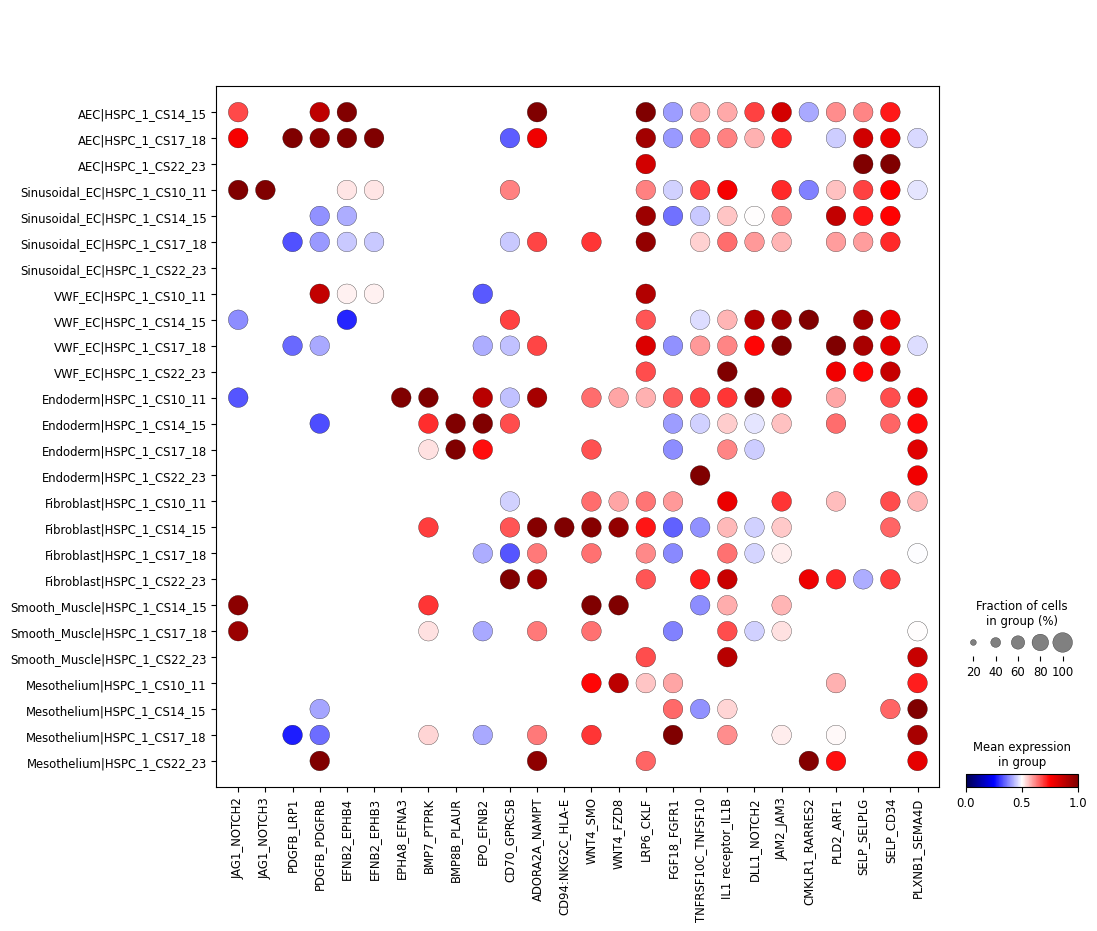

In [20]:
sig_a1 = ["JAG1_NOTCH2",
"JAG1_NOTCH3",
"PDGFB_LRP1",
"PDGFB_PDGFRB",
"EFNB2_EPHB4",
"EFNB2_EPHB3",
"EPHA8_EFNA3",
"BMP7_PTPRK",
"BMP8B_PLAUR",
"EPO_EFNB2",
"CD70_GPRC5B",
"ADORA2A_NAMPT",
"CD94:NKG2C_HLA-E",
"WNT4_SMO",
"WNT4_FZD8",
"LRP6_CKLF",
"FGF18_FGFR1",
"TNFRSF10C_TNFSF10",
"IL1 receptor_IL1B",
"DLL1_NOTCH2",
"JAM2_JAM3",
"CMKLR1_RARRES2",
"PLD2_ARF1",
"SELP_SELPLG",
"SELP_CD34",
"PLXNB1_SEMA4D",]
(sc.pl.dotplot(adata, var_names = sig_a1, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True)) # title=i

# Significantly_varying_interactions

In [21]:
plt.rcdefaults()

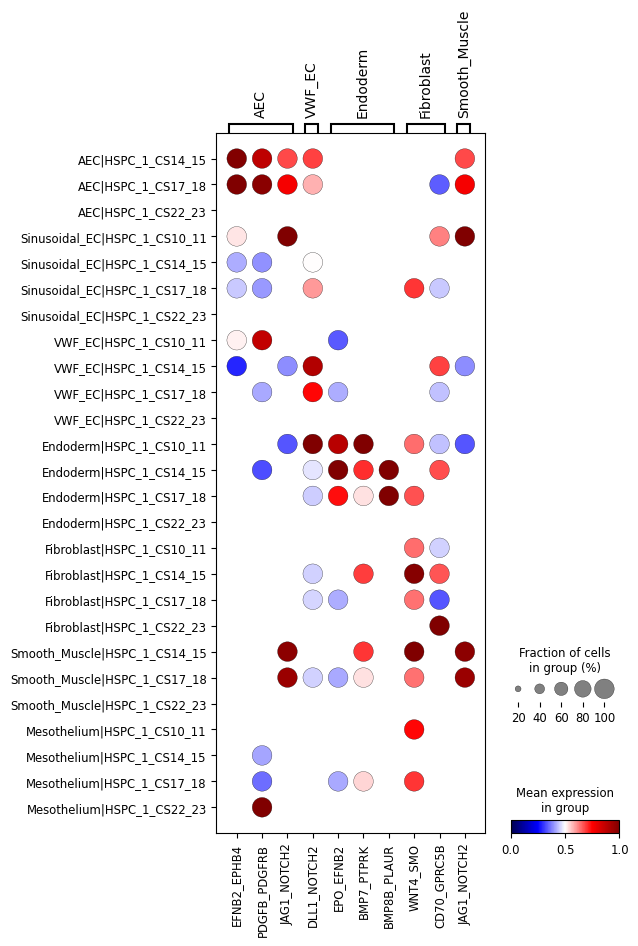

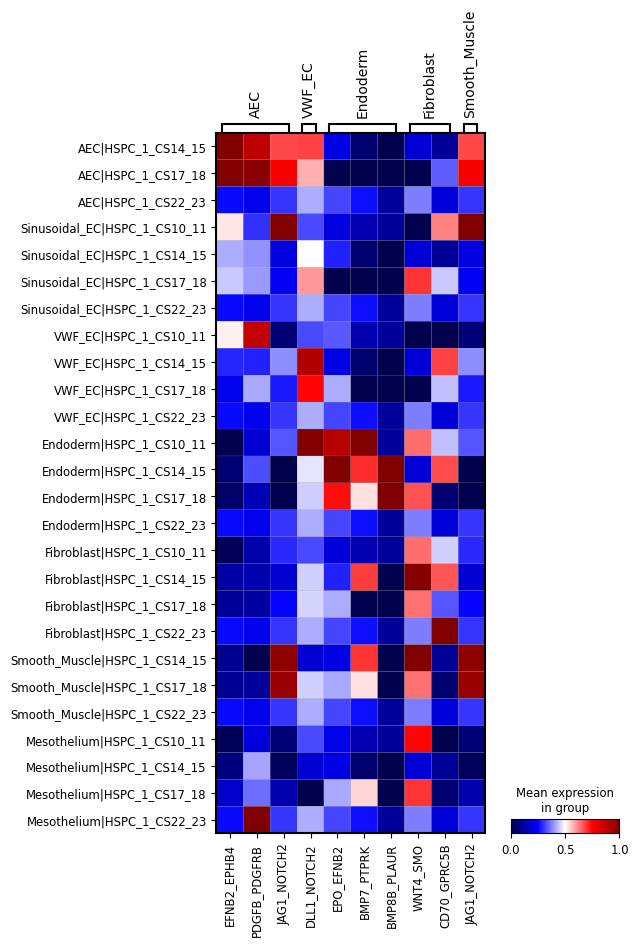

In [22]:
sig_a1 = ["JAG1_NOTCH2",
"JAG1_NOTCH3",
"PDGFB_LRP1",
"PDGFB_PDGFRB",
"EFNB2_EPHB4",
"EFNB2_EPHB3",
"EPHA8_EFNA3",
"BMP7_PTPRK",
"BMP8B_PLAUR",
"EPO_EFNB2",
"CD70_GPRC5B",
"ADORA2A_NAMPT",
"CD94:NKG2C_HLA-E",
"WNT4_SMO",
"WNT4_FZD8",
"LRP6_CKLF",
"FGF18_FGFR1",
"TNFRSF10C_TNFSF10",
"IL1 receptor_IL1B",
"DLL1_NOTCH2",
"JAM2_JAM3",
"CMKLR1_RARRES2",]
for (key, value) in exp_tbl_ordered.items():
    exp_tbl_ordered[key] = [x for x in value if x in list(sig_a1)]
exp_tbl_ordered = {k: v for k, v in exp_tbl_ordered.items() if v}
(sc.pl.dotplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'ordered_manual_curated_interactions.pdf')) # title=i
(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='seismic', show = True,save = 'ordered_manual_curated_interactions.pdf')) # title=i

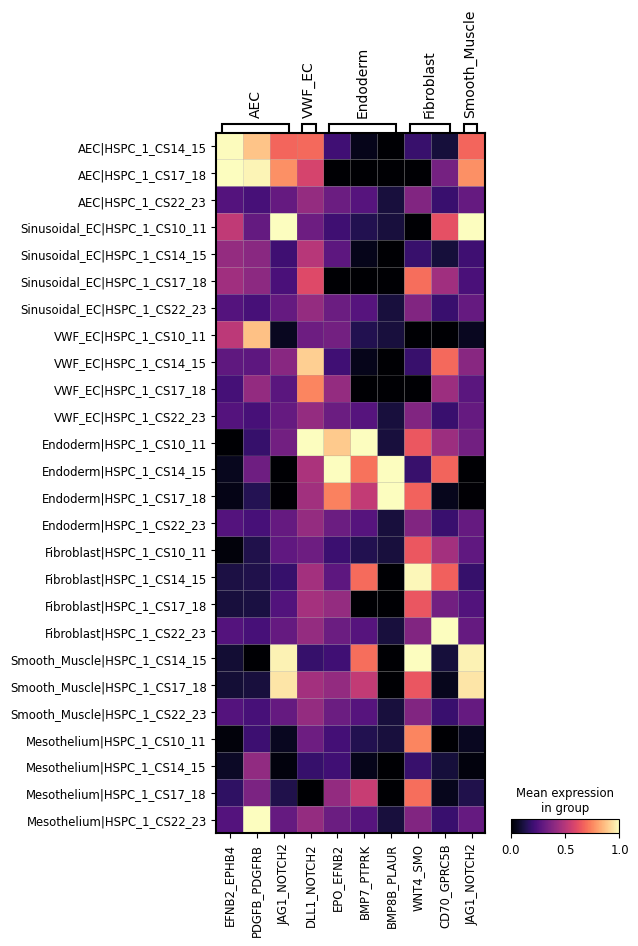

In [23]:
(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='magma', show = True,save = 'ordered_manual_curated_interactions.pdf')) # title=i

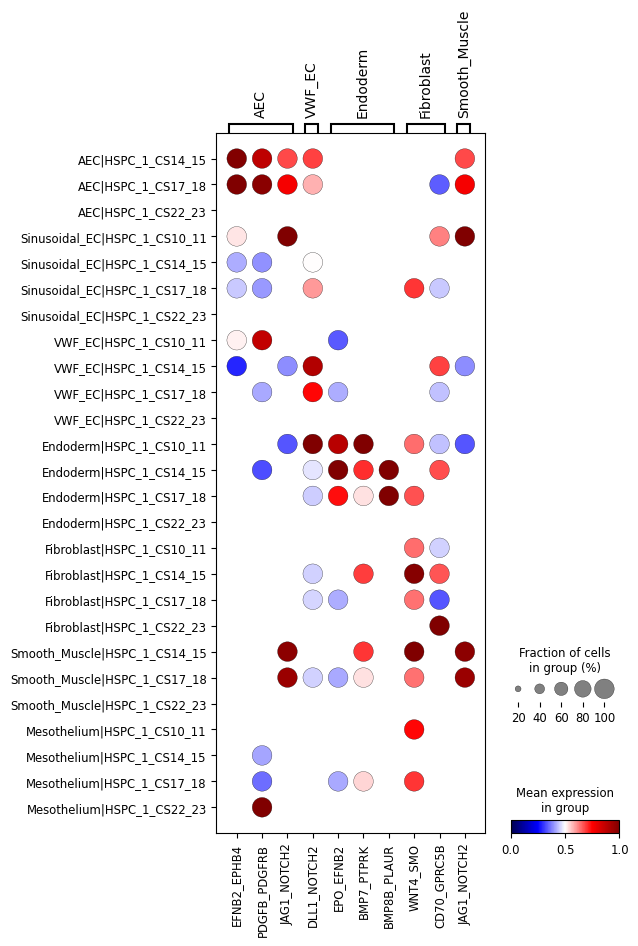

AttributeError: 'PolyCollection' object has no property 'color_map'

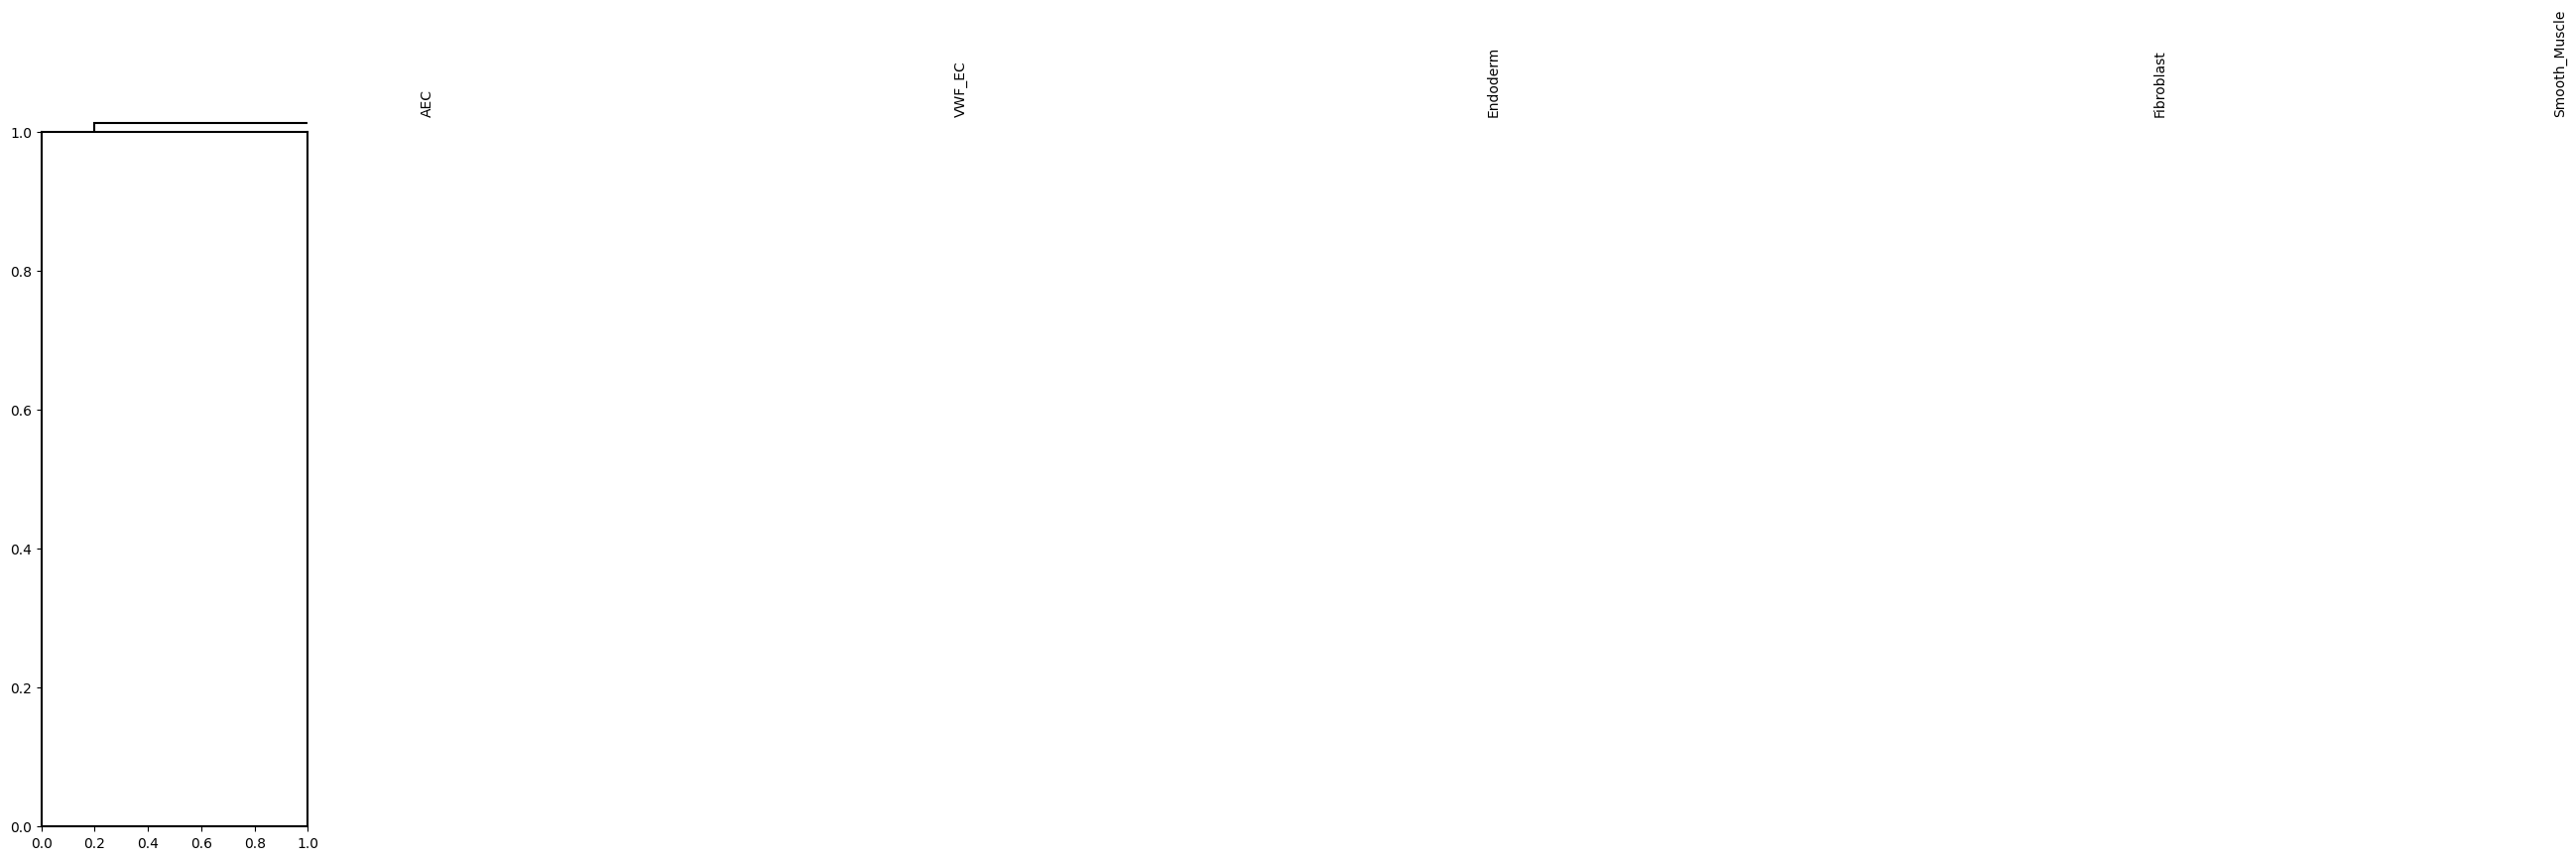

In [24]:
sig_a1 = ["JAG1_NOTCH2",
"JAG1_NOTCH3",
"PDGFB_LRP1",
"PDGFB_PDGFRB",
"EFNB2_EPHB4",
"EFNB2_EPHB3",
"EPHA8_EFNA3",
"BMP7_PTPRK",
"BMP8B_PLAUR",
"EPO_EFNB2",
"CD70_GPRC5B",
"ADORA2A_NAMPT",
"CD94:NKG2C_HLA-E",
"WNT4_SMO",
"WNT4_FZD8",
"LRP6_CKLF",
"FGF18_FGFR1",
"TNFRSF10C_TNFSF10",
"IL1 receptor_IL1B",
"DLL1_NOTCH2",
"JAM2_JAM3",
"CMKLR1_RARRES2",]
for (key, value) in exp_tbl_ordered.items():
    exp_tbl_ordered[key] = [x for x in value if x in list(sig_a1)]
exp_tbl_ordered = {k: v for k, v in exp_tbl_ordered.items() if v}
(sc.pl.dotplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'ordered_manual_curated_interactions.pdf')) # title=i
(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'ordered_manual_curated_interactions.pdf')) # title=i

In [ ]:
exp_tbl_ordered

In [ ]:
(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='magma', show = True,save = 'ordered_manual_curated_interactions.pdf')) # title=i

# include Consistant interactions

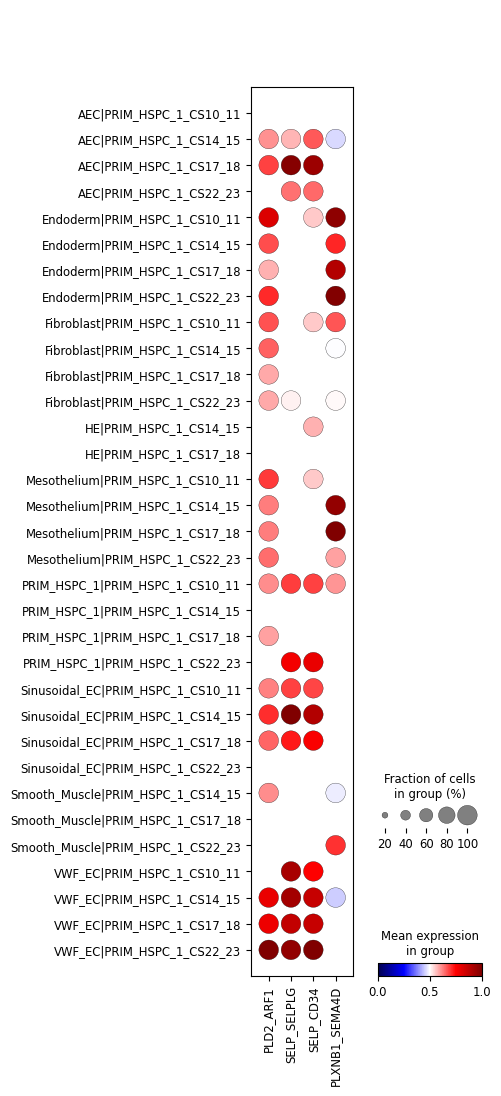

In [50]:
sig_a1 = [
"PLD2_ARF1",
"SELP_SELPLG",
"SELP_CD34",
"PLXNB1_SEMA4D"]
for (key, value) in exp_tbl_ordered.items():
    exp_tbl_ordered[key] = [x for x in value if x in list(sig_a1)]
exp_tbl_ordered = {k: v for k, v in exp_tbl_ordered.items() if v}
(sc.pl.dotplot(adata, var_names = sig_a1, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True)) # title=i

# Manual fitlering V2
- Please use all stromal cell states except HE (and also remove HSPC-HSPC interactions)
- Please order AEC, sEC, vWF EC, endoderm, fibroblast, smooth muscle, mesothelium.

In [261]:
plt.rcdefaults()

In [266]:
sig_a1 = [
"EPO_EFNB2",
"CSF3_CSF3R",
"DLL1_NOTCH2",
"JAG1_NOTCH2",
"BMP7_PTPRK",
"BMP8B_PLAUR",
"BMP10_VSIR",
"FGF18_FGFR1",
"WNT4_SMO",
"WNT7B_FZD4",
"TGFB2_TGFbeta receptor1",
"TGFB3_TGFbeta receptor1",
"TGFB3_TGFBR3",
"GDF9_TGFR_BMPR2",
"ADCYAP1_DPP4",
"CD70_GPRC5B",
"IL35_IL35 receptor",
"EFNB2_EPHB4",
"TNFSF10_RIPK1",
"PDGFB_PDGFRB",
"TGFB2_TGFBR3",
"LTA_TNFRSF1A",
"HLA-F_LILRB2",
"PLD2_ARF1",
"PLA2G2A_a4b1 complex",
"IL13_TMEM219",
"PDGFB_PDGFR complex",
"PLA2G2A_a5b1 complex",
"SPP1_a4b1 complex",
"LEP_LEPR",
"CD94:NKG2E_HLA-E",]

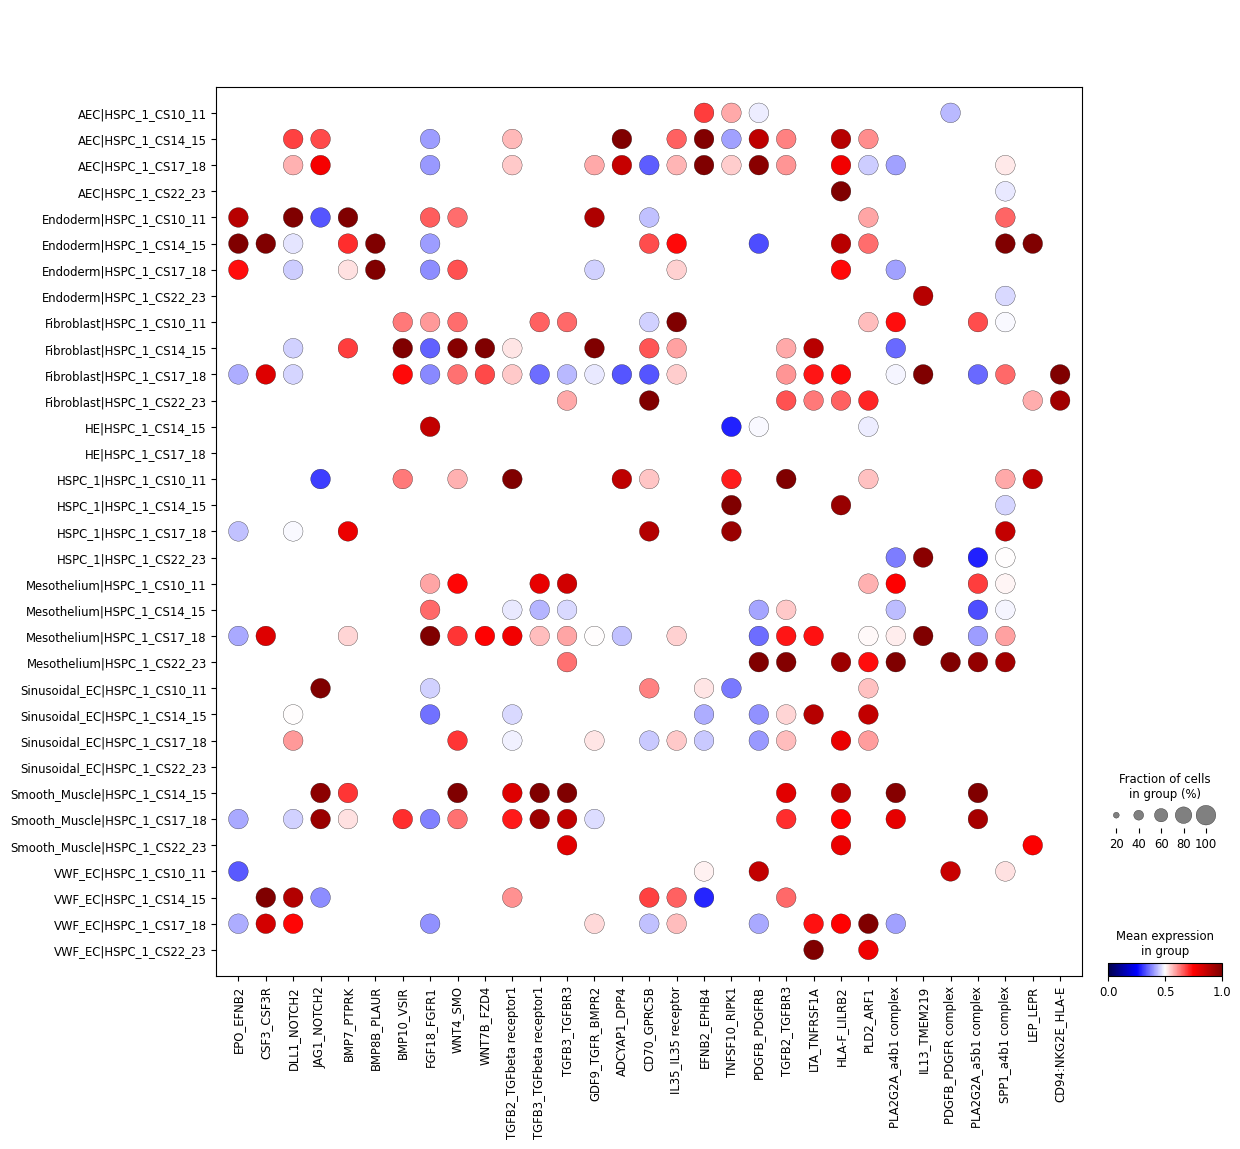

In [268]:
(sc.pl.dotplot(adata, var_names = sig_a1, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True)) # title=i
#(sc.pl.matrixplot(adata, var_names = sig_a1, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'ordered_manual_curated_interactions.pdf')) # title=i

In [56]:
adata.write('./cpdb_adata_V2_YS_EC_HSPC.h5ad')

In [17]:
adata = sc.read('./cpdb_adata_V2_YS_EC_HSPC.h5ad')

In [203]:
plt.rcdefaults()

In [216]:
exp_tbl ={'Endoderm|PRIM_HSPC_1_+CS10_11': ['EPO_EFNB2',
    'IL1 receptor inhibitor_IL1B',
  'EPHA8_EFNA3',
  'BMP7_PTPRK',
  'CALCR_ADM',
  'LTA_TNFRSF1A'],
 'Mesothelium|PRIM_HSPC_1_+CS10_11': ['GDF9_TGFR_BMPR2',
  'COL8A2_a10b1 complex',
  'COL8A2_a1b1 complex',
  'COL8A2_a2b1 complex',
  'COL8A2_a11b1 complex'],
 'Fibroblast|PRIM_HSPC_1_+CS10_11': ['EPHA3_EFNA3',
  'GPR42_FAM3C',
  'GPR42_CCL4L2',
  'EPHA3_EFNA4',
  'COL4A4_a10b1 complex'],
 'PRIM_HSPC_1|PRIM_HSPC_1_+CS10_11': ['NTRK1_GPI',
  'IL18 receptor_IL18',
  'NTRK1_COPA',
  'GH1_GHR',
  'RLN1_RXFP1'],
 'AEC|PRIM_HSPC_1_+CS10_11': ['JAG1_NOTCH3',
  'JAG1_NOTCH2',
  'PDGFB_LRP1',
  'PDGFB_PDGFRB',
  'PDGFB_PDGFR complex'],
 'Sinusoidal_EC|PRIM_HSPC_1_+CS10_11': ['CD96_NECTIN1',
  'NRG3_ERBB4',
  'CCL2_ACKR1',
  'FGF2_FGFR2',
  'HLA-F_LILRB2'],
 'VWF_EC|PRIM_HSPC_1_+CS10_11': ['TGFB2_TGFBR3',
  'CMKLR1_RARRES2',
  'TGFB2_TGFbeta receptor2',
  'TGFB2_TGFbeta receptor1',
  'VWF_aVb3 complex'],
 'Endoderm|PRIM_HSPC_1_+CS14_15': ['CTLA4_CD86',
  'TNFRSF13B_TNFSF13B',
  'BMP8B_PLAUR',
  'COL20A1_a2b1 complex',
  'TIGIT_NECTIN2'],
 'Fibroblast|PRIM_HSPC_1_+CS14_15': ['CD160_TNFRSF14',
  'WNT4_SMO',
  'WNT4_FZD8',
  'BMP10_VSIR',
  'KLRG2_TNFSF9'],
 'VWF_EC|PRIM_HSPC_1_+CS14_15': ['LILRA4_BST2',
  'NCR3_BAG6',
  'COL24A1_a2b1 complex',
  'JAM2_JAM3',
  'DLL1_NOTCH2'],
 'Sinusoidal_EC|PRIM_HSPC_1_+CS14_15': ['GPR42_CCL4L2',
  'WNT7A_LDLR',
  'RLN1_RXFP1',
  'IL35_IL35 receptor',
  'CEACAM1_CD209'],
 'AEC|PRIM_HSPC_1_+CS14_15': ['EFNB2_EPHB4',
  'EFNB2_EPHB3',
  'NOTCH1_DLK1',
  'NOTCH1_DLL4',
  'NRP1_PGF'],
 'Mesothelium|PRIM_HSPC_1_+CS14_15': ['COL6A5_a2b1 complex',
  'ALOX5_ALOX5AP',
  'ANXA1_FPR3',
  'IGFL2_IGFLR1',
  'COL8A2_a2b1 complex'],
 'Smooth_Muscle|PRIM_HSPC_1_+CS14_15': ['WNT7B_FZD4',
  'COL5A3_a2b1 complex',
  'TGFB3_TGFBR3',
  'PLA2G2A_a5b1 complex',
  'JAG1_NOTCH2'],
 'PRIM_HSPC_1|PRIM_HSPC_1_+CS14_15': ['CD94:NKG2C_HLA-E',
  'CD2_CD58',
  'FPR3_HEBP1',
  'CD74_APP',
  'CD74_MIF'],
 'HE|PRIM_HSPC_1_+CS14_15': ['BTLA_TNFRSF14',
  'ADCYAP1_DPP4',
  'PVR_TNFSF9',
  'FGF18_FGFR1',
  'FGF18_FGFR3'],
 'Mesothelium|PRIM_HSPC_1_+CS17_18': ['WNT7B_FZD4',
  'FGF4_FGFR2',
  'FGF4_FGFR1',
  'ERBB4_HBEGF',
  'CXADR_FAM3C'],
 'Fibroblast|PRIM_HSPC_1_+CS17_18': ['TIGIT_NECTIN2',
  'CALCR_ADM',
  'NKG2D II receptor_MICB',
  'COL4A3_a1b1 complex',
  'LEP_LEPR'],
 'VWF_EC|PRIM_HSPC_1_+CS17_18': ['WNT7A_LDLR',
  'CSF3_CSF3R',
  'ICAM1_AREG',
  'ICAM1_SPN',
  'SELE_SELPLG'],
 'AEC|PRIM_HSPC_1_+CS17_18': ['CXCL11_ACKR3',
  'CXCL11_DPP4',
  'DLL4_NOTCH3',
  'EFNB2_EPHB4',
  'TNFSF10_RIPK1'],
 'Smooth_Muscle|PRIM_HSPC_1_+CS17_18': ['EREG_EGFR',
  'NGF_NGFR',
  'COL4A1_a1b1 complex',
  'TGFB3_TGFbeta receptor1',
  'COL14A1_a1b1 complex'],
 'Endoderm|PRIM_HSPC_1_+CS17_18': ['CD94:NKG2E_HLA-E',
  'CD2_CD58',
  'COL28A1_a1b1 complex',
  'CCR3_CCL14',
  'CCR3_CCL15'],
 'Sinusoidal_EC|PRIM_HSPC_1_+CS17_18': ['FFAR2_TNF',
  'FLT4_VEGFC',
  'FcRn complex_ALB',
  'KDR_VEGFC',
  'TIMP1_FGFR2'],
 'PRIM_HSPC_1|PRIM_HSPC_1_+CS17_18': ['PTPRC_MRC1',
  'WNT1_CD36',
  'NCR3_BAG6',
  'CD74_APP',
  'CD74_MIF'],
 'HE|PRIM_HSPC_1_+CS17_18': ['WNT4_SMO',
  'WNT4_FZD8',
  'ADCYAP1_DPP4',
  'ADORA2A_NAMPT',
  'ADORA2A_ENTPD1'],
 'Fibroblast|PRIM_HSPC_1_+CS22_23': ['PlexinA1_complex1_SEMA6D',
  'GMCSFR_CSF2',
  'TNFRSF13B_TNFSF13B',
  'CD70_GPRC5B',
  'ADORA2A_NAMPT'],
 'Sinusoidal_EC|PRIM_HSPC_1_+CS22_23': ['COL9A2_a1b1 complex',
  'NOTCH1_DLK1',
  'FcRn complex_ALB',
  'PTHLH_PTH2R',
  'LRP6_CKLF'],
 'Mesothelium|PRIM_HSPC_1_+CS22_23': ['COL2A1_a1b1 complex',
  'COL8A2_a1b1 complex',
  'PLA2G2A_a4b1 complex',
  'SPP1_a4b1 complex',
  'SPP1_a9b1 complex'],
 'VWF_EC|PRIM_HSPC_1_+CS22_23': ['IL1 receptor inhibitor_IL1B',
  'TNFRSF10C_TNFSF10',
  'PLD2_ARF1',
  'SELP_CD34',
  'SELP_SELPLG'],
 'Endoderm|PRIM_HSPC_1_+CS22_23': ['VCAM1_a4b1 complex',
  'VCAM1_a9b1 complex',
  'PLXNB1_SEMA4D',
  'EGFR_COPA',
  'EGFR_TGFB1'],
 'Smooth_Muscle|PRIM_HSPC_1_+CS22_23': ['IL1 receptor_IL1B',
  'PDGFB_LRP1',
  'DLL1_NOTCH2',
  'COL18A1_a1b1 complex',
  'COL8A1_a1b1 complex'],
 'AEC|PRIM_HSPC_1_+CS22_23': ['COL15A1_a1b1 complex',
  'TNFRSF10B_TNFSF10',
  'CD40_TNFSF13B',
  'COL4A1_a1b1 complex',
  'JAM2_a4b1 complex'],
 'PRIM_HSPC_1|PRIM_HSPC_1_+CS22_23': ['IL13_TMEM219',
  'SELL_CD34',
  'ALOX5_ALOX5AP',
  'SELL_SELPLG',
  'SELP_SELPLG']}

In [217]:
exp_tbl_mod = {}
for key in exp_tbl.keys():
    key_new = key.replace('+','')
    key_new =key_new.replace('PRIM_','')
    exp_tbl_mod[key_new] = exp_tbl[key]
exp_tbl = exp_tbl_mod

# Adhesion mols -- supplementary

In [269]:
stage_groups_order = ['AEC|HSPC_1_CS10_11',
 'AEC|HSPC_1_CS14_15',
 'AEC|HSPC_1_CS17_18',
 'AEC|HSPC_1_CS22_23',
 'Sinusoidal_EC|HSPC_1_CS10_11',
 'Sinusoidal_EC|HSPC_1_CS14_15',
 'Sinusoidal_EC|HSPC_1_CS17_18',
 'Sinusoidal_EC|HSPC_1_CS22_23',
 'VWF_EC|HSPC_1_CS10_11',
 'VWF_EC|HSPC_1_CS14_15',
 'VWF_EC|HSPC_1_CS17_18',
 'VWF_EC|HSPC_1_CS22_23',
 'Endoderm|HSPC_1_CS10_11',
 'Endoderm|HSPC_1_CS14_15',
 'Endoderm|HSPC_1_CS17_18',
 'Endoderm|HSPC_1_CS22_23',
 'Fibroblast|HSPC_1_CS10_11',
 'Fibroblast|HSPC_1_CS14_15',
 'Fibroblast|HSPC_1_CS17_18',
 'Fibroblast|HSPC_1_CS22_23',
 'Smooth_Muscle|HSPC_1_CS14_15',
 'Smooth_Muscle|HSPC_1_CS17_18',
 'Smooth_Muscle|HSPC_1_CS22_23',
 'Mesothelium|HSPC_1_CS10_11',
 'Mesothelium|HSPC_1_CS14_15',
 'Mesothelium|HSPC_1_CS17_18',
 'Mesothelium|HSPC_1_CS22_23',]
adata = adata[adata.obs['stage_pair'].isin(stage_groups_order)]
adata.obs['stage_pair'] = adata.obs['stage_pair'].astype('category').cat.reorder_categories(stage_groups_order)

# reorder exp_tbl for categorical ordering
exp_tbl_ordered = { key: exp_tbl[key] for key in stage_groups_order }

<ipython-input-269-ebcefb9fb18b>:29: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage_pair'] = adata.obs['stage_pair'].astype('category').cat.reorder_categories(stage_groups_order)


KeyError: 'AEC|HSPC_1_CS10_11'

In [219]:
exp_tbl_ordered

{'AEC|HSPC_1_CS10_11': ['JAG1_NOTCH3',
  'JAG1_NOTCH2',
  'PDGFB_LRP1',
  'PDGFB_PDGFRB',
  'PDGFB_PDGFR complex'],
 'AEC|HSPC_1_CS14_15': ['EFNB2_EPHB4',
  'EFNB2_EPHB3',
  'NOTCH1_DLK1',
  'NOTCH1_DLL4',
  'NRP1_PGF'],
 'AEC|HSPC_1_CS17_18': ['CXCL11_ACKR3',
  'CXCL11_DPP4',
  'DLL4_NOTCH3',
  'EFNB2_EPHB4',
  'TNFSF10_RIPK1'],
 'AEC|HSPC_1_CS22_23': ['COL15A1_a1b1 complex',
  'TNFRSF10B_TNFSF10',
  'CD40_TNFSF13B',
  'COL4A1_a1b1 complex',
  'JAM2_a4b1 complex'],
 'Sinusoidal_EC|HSPC_1_CS10_11': ['CD96_NECTIN1',
  'NRG3_ERBB4',
  'CCL2_ACKR1',
  'FGF2_FGFR2',
  'HLA-F_LILRB2'],
 'Sinusoidal_EC|HSPC_1_CS14_15': ['GPR42_CCL4L2',
  'WNT7A_LDLR',
  'RLN1_RXFP1',
  'IL35_IL35 receptor',
  'CEACAM1_CD209'],
 'Sinusoidal_EC|HSPC_1_CS17_18': ['FFAR2_TNF',
  'FLT4_VEGFC',
  'FcRn complex_ALB',
  'KDR_VEGFC',
  'TIMP1_FGFR2'],
 'Sinusoidal_EC|HSPC_1_CS22_23': ['COL9A2_a1b1 complex',
  'NOTCH1_DLK1',
  'FcRn complex_ALB',
  'PTHLH_PTH2R',
  'LRP6_CKLF'],
 'VWF_EC|HSPC_1_CS10_11': ['TGFB2_TGFBR

In [220]:
sig_a1 = [
"JAM2_JAM3",
"SELL_CD34",
"VCAM1_a4b1 complex",
"VCAM1_a9b1 complex",
"COL4A1_a1b1 complex",
"SELP_CD34",
"JAM2_a4b1 complex",
"SELP_SELPLG",
"SELE_SELPLG",
"SELL_SELPLG",
"COL2A1_a1b1 complex",
"COL8A2_a1b1 complex",
"COL8A2_a11b1 complex",
"COL8A1_a1b1 complex",
"COL9A2_a1b1 complex",
"COL14A1_a1b1 complex",
"COL18A1_a1b1 complex",]

for (key, value) in exp_tbl_ordered.items():
    exp_tbl_ordered[key] = [x for x in value if x in list(sig_a1)]
exp_tbl_ordered_adhesion = {k: v for k, v in exp_tbl_ordered.items() if v}

adhesion = {}
for key in exp_tbl_ordered_adhesion.keys():
    key_mod = ''.join(key.split('|')[:-1])
    adhesion[key_mod] = exp_tbl_ordered_adhesion[key]
    
adhesion

{'AEC': ['COL4A1_a1b1 complex', 'JAM2_a4b1 complex'],
 'Sinusoidal_EC': ['COL9A2_a1b1 complex'],
 'VWF_EC': ['SELP_CD34', 'SELP_SELPLG'],
 'Endoderm': ['VCAM1_a4b1 complex', 'VCAM1_a9b1 complex'],
 'Smooth_Muscle': ['COL18A1_a1b1 complex', 'COL8A1_a1b1 complex'],
 'Mesothelium': ['COL2A1_a1b1 complex', 'COL8A2_a1b1 complex']}

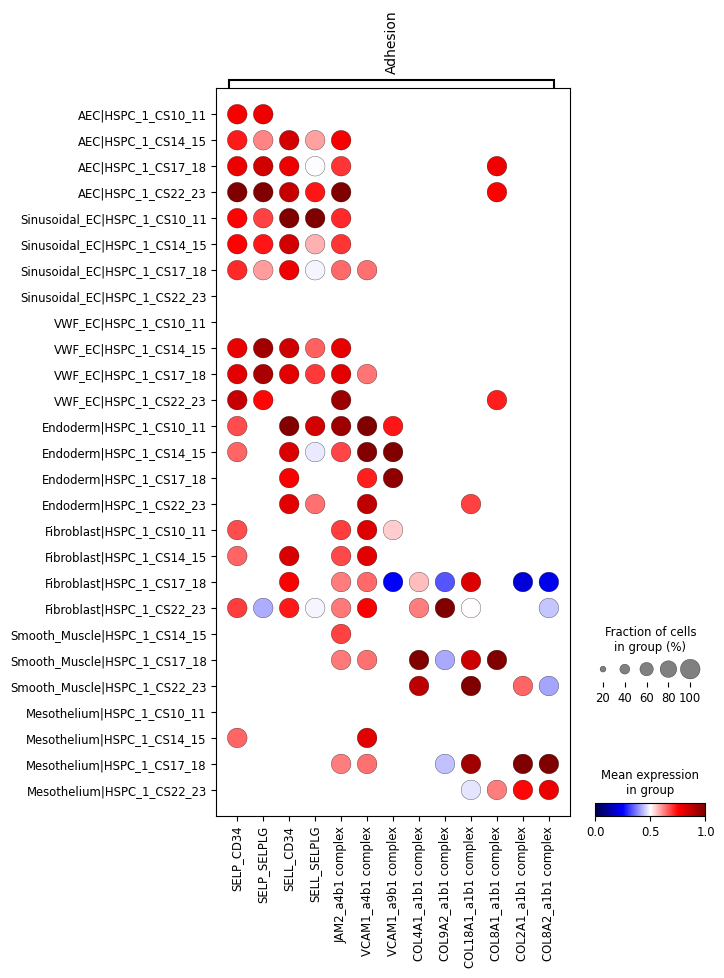

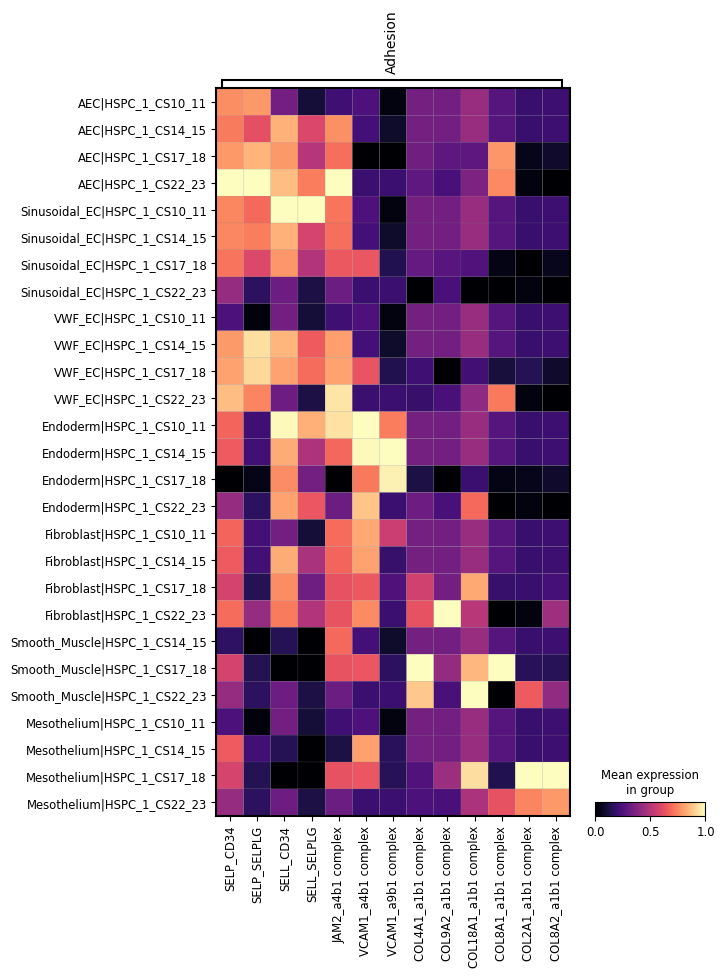

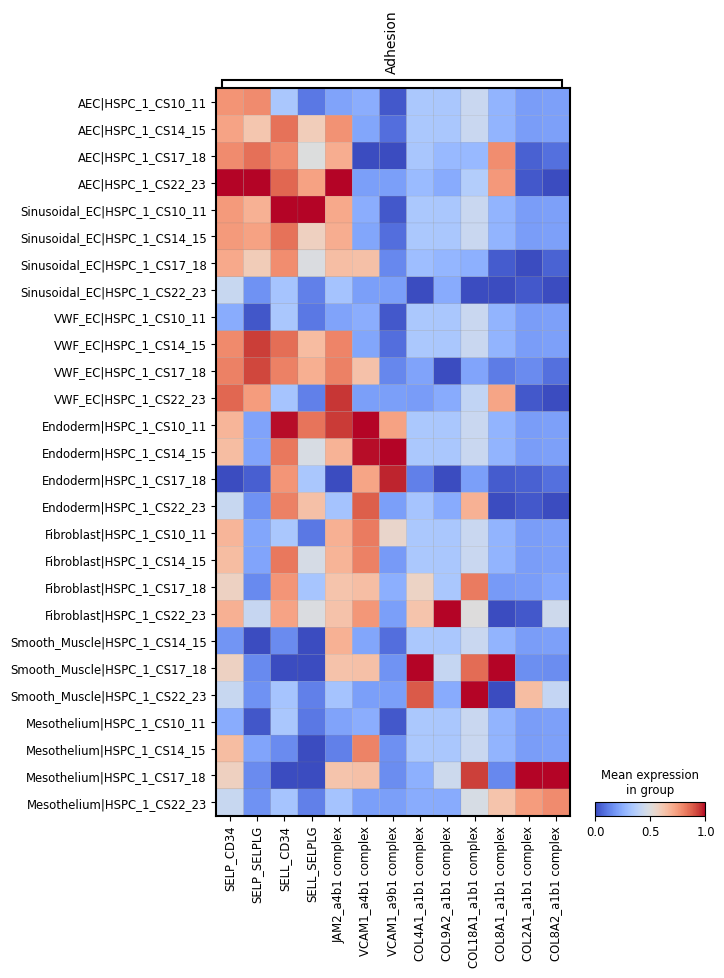

In [221]:
sig_a1 = [
"JAM2_JAM3",
"SELL_CD34",
"VCAM1_a4b1 complex",
"VCAM1_a9b1 complex",
"COL4A1_a1b1 complex",
"SELP_CD34",
"JAM2_a4b1 complex",
"SELP_SELPLG",
"SELE_SELPLG",
"SELL_SELPLG",
"COL2A1_a1b1 complex",
"COL8A2_a1b1 complex",
"COL8A2_a11b1 complex",
"COL8A1_a1b1 complex",
"COL9A2_a1b1 complex",
"COL14A1_a1b1 complex",
"COL18A1_a1b1 complex",]


adhesion = {'Adhesion': ['SELP_CD34', 'SELP_SELPLG','SELL_CD34', 'SELL_SELPLG','JAM2_a4b1 complex','VCAM1_a4b1 complex', 'VCAM1_a9b1 complex','COL4A1_a1b1 complex', 
'COL9A2_a1b1 complex',
'COL18A1_a1b1 complex', 'COL8A1_a1b1 complex',
'COL2A1_a1b1 complex', 'COL8A2_a1b1 complex']}
for (key, value) in exp_tbl_ordered.items():
    exp_tbl_ordered[key] = [x for x in value if x in list(sig_a1)]
exp_tbl_ordered = {k: v for k, v in exp_tbl_ordered.items() if v}

(sc.pl.dotplot(adata, var_names = adhesion, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'adhesion_molecules_for_supp.pdf')) # title=i
(sc.pl.matrixplot(adata, var_names = adhesion, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='magma', show = True,save = 'magma_adhesion_molecules_for_supp.pdf')) # title=i
(sc.pl.matrixplot(adata, var_names = adhesion, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'coolwarm_adhesion_molecules_for_supp.pdf')) # title=i

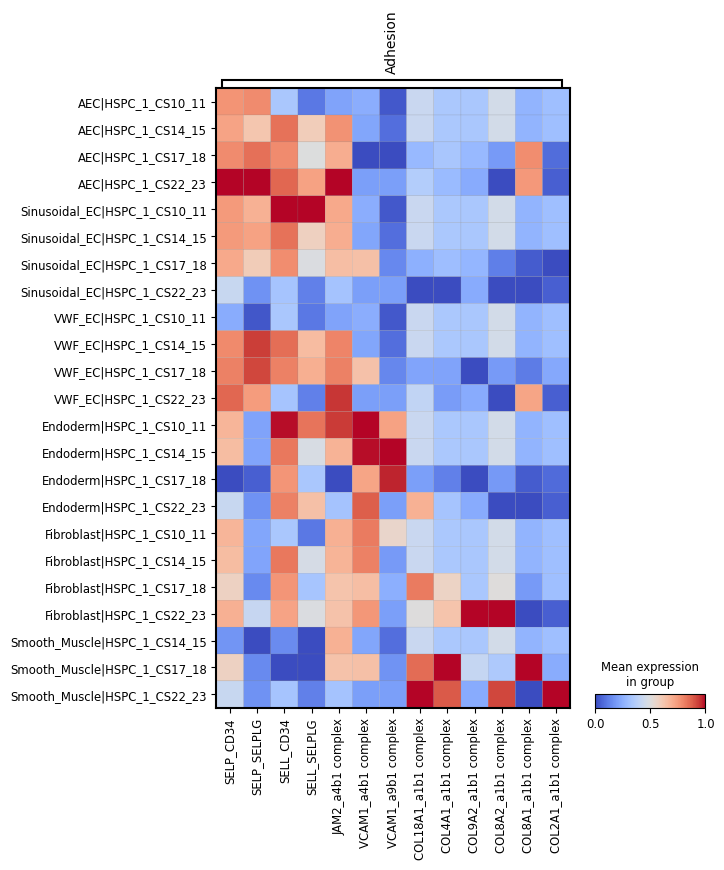

In [319]:
sig_a1 = [
"JAM2_JAM3",
"SELL_CD34",
"VCAM1_a4b1 complex",
"VCAM1_a9b1 complex",
"COL4A1_a1b1 complex",
"SELP_CD34",
"JAM2_a4b1 complex",
"SELP_SELPLG",
"SELE_SELPLG",
"SELL_SELPLG",
"COL2A1_a1b1 complex",
"COL8A2_a1b1 complex",
"COL8A2_a11b1 complex",
"COL8A1_a1b1 complex",
"COL9A2_a1b1 complex",
"COL14A1_a1b1 complex",
"COL18A1_a1b1 complex",]


adhesion = {'Adhesion': ['SELP_CD34', 'SELP_SELPLG','SELL_CD34', 'SELL_SELPLG','JAM2_a4b1 complex','VCAM1_a4b1 complex', 'VCAM1_a9b1 complex','COL18A1_a1b1 complex','COL4A1_a1b1 complex', 
'COL9A2_a1b1 complex','COL8A2_a1b1 complex',
 'COL8A1_a1b1 complex',
'COL2A1_a1b1 complex']}
for (key, value) in exp_tbl_ordered.items():
    exp_tbl_ordered[key] = [x for x in value if x in list(sig_a1)]
exp_tbl_ordered = {k: v for k, v in exp_tbl_ordered.items() if v}

# (sc.pl.dotplot(adata, var_names = adhesion, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'adhesion_molecules_for_supp.pdf')) # title=i
# (sc.pl.matrixplot(adata, var_names = adhesion, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='magma', show = True,save = 'magma_adhesion_molecules_for_supp.pdf')) # title=i
(sc.pl.matrixplot(adata, var_names = adhesion, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'YS_adhesion_molecules_for_supp.pdf')) # title=i

# Manual curated interactions full

In [270]:
sig_a1 =["EPO_EFNB2",
"CSF3_CSF3R",
"DLL1_NOTCH2",
"JAG1_NOTCH2",
"BMP7_PTPRK",
"BMP8B_PLAUR",
"BMP10_VSIR",
"FGF18_FGFR1",
"WNT4_SMO",
"WNT7B_FZD4",
"TGFB2_TGFbeta receptor1",
"TGFB3_TGFbeta receptor1",
"TGFB3_TGFBR3",
"GDF9_TGFR_BMPR2",
"ADCYAP1_DPP4",
"CD70_GPRC5B",
"IL35_IL35 receptor",
"EFNB2_EPHB4",
"TNFSF10_RIPK1",
"PDGFB_PDGFRB",
"TGFB2_TGFBR3",
"LTA_TNFRSF1A",
"HLA-F_LILRB2",
"PLD2_ARF1",
"PLA2G2A_a4b1 complex",
"IL13_TMEM219",
"PDGFB_PDGFR complex",
"PLA2G2A_a5b1 complex",
"SPP1_a4b1 complex",
"LEP_LEPR",
"CD94:NKG2E_HLA-E",]

# Significantly_varying_interactions

In [271]:
plt.rcdefaults()

In [272]:
exp_tbl ={'Endoderm|PRIM_HSPC_1_+CS10_11': ['EPO_EFNB2',
    'IL1 receptor inhibitor_IL1B',
  'EPHA8_EFNA3',
  'BMP7_PTPRK',
  'CALCR_ADM',
  'LTA_TNFRSF1A'],
 'Mesothelium|PRIM_HSPC_1_+CS10_11': ['GDF9_TGFR_BMPR2',
  'COL8A2_a10b1 complex',
  'COL8A2_a1b1 complex',
  'COL8A2_a2b1 complex',
  'COL8A2_a11b1 complex'],
 'Fibroblast|PRIM_HSPC_1_+CS10_11': ['EPHA3_EFNA3',
  'GPR42_FAM3C',
  'GPR42_CCL4L2',
  'EPHA3_EFNA4',
  'COL4A4_a10b1 complex'],
 'PRIM_HSPC_1|PRIM_HSPC_1_+CS10_11': ['NTRK1_GPI',
  'IL18 receptor_IL18',
  'NTRK1_COPA',
  'GH1_GHR',
  'RLN1_RXFP1'],
 'AEC|PRIM_HSPC_1_+CS10_11': ['JAG1_NOTCH3',
  'JAG1_NOTCH2',
  'PDGFB_LRP1',
  'PDGFB_PDGFRB',
  'PDGFB_PDGFR complex'],
 'Sinusoidal_EC|PRIM_HSPC_1_+CS10_11': ['CD96_NECTIN1',
  'NRG3_ERBB4',
  'CCL2_ACKR1',
  'FGF2_FGFR2',
  'HLA-F_LILRB2'],
 'VWF_EC|PRIM_HSPC_1_+CS10_11': ['TGFB2_TGFBR3',
  'CMKLR1_RARRES2',
  'TGFB2_TGFbeta receptor2',
  'TGFB2_TGFbeta receptor1',
  'VWF_aVb3 complex'],
 'Endoderm|PRIM_HSPC_1_+CS14_15': ['CTLA4_CD86',
  'TNFRSF13B_TNFSF13B',
  'BMP8B_PLAUR',
  'COL20A1_a2b1 complex',
  'TIGIT_NECTIN2'],
 'Fibroblast|PRIM_HSPC_1_+CS14_15': ['CD160_TNFRSF14',
  'WNT4_SMO',
  'WNT4_FZD8',
  'BMP10_VSIR',
  'KLRG2_TNFSF9'],
 'VWF_EC|PRIM_HSPC_1_+CS14_15': ['LILRA4_BST2',
  'NCR3_BAG6',
  'COL24A1_a2b1 complex',
  'JAM2_JAM3',
  'DLL1_NOTCH2'],
 'Sinusoidal_EC|PRIM_HSPC_1_+CS14_15': ['GPR42_CCL4L2',
  'WNT7A_LDLR',
  'RLN1_RXFP1',
  'IL35_IL35 receptor',
  'CEACAM1_CD209'],
 'AEC|PRIM_HSPC_1_+CS14_15': ['EFNB2_EPHB4',
  'EFNB2_EPHB3',
  'NOTCH1_DLK1',
  'NOTCH1_DLL4',
  'NRP1_PGF'],
 'Mesothelium|PRIM_HSPC_1_+CS14_15': ['COL6A5_a2b1 complex',
  'ALOX5_ALOX5AP',
  'ANXA1_FPR3',
  'IGFL2_IGFLR1',
  'COL8A2_a2b1 complex'],
 'Smooth_Muscle|PRIM_HSPC_1_+CS14_15': ['WNT7B_FZD4',
  'COL5A3_a2b1 complex',
  'TGFB3_TGFBR3',
  'PLA2G2A_a5b1 complex',
  'JAG1_NOTCH2'],
 'PRIM_HSPC_1|PRIM_HSPC_1_+CS14_15': ['CD94:NKG2C_HLA-E',
  'CD2_CD58',
  'FPR3_HEBP1',
  'CD74_APP',
  'CD74_MIF'],
 'HE|PRIM_HSPC_1_+CS14_15': ['BTLA_TNFRSF14',
  'ADCYAP1_DPP4',
  'PVR_TNFSF9',
  'FGF18_FGFR1',
  'FGF18_FGFR3'],
 'Mesothelium|PRIM_HSPC_1_+CS17_18': ['WNT7B_FZD4',
  'FGF4_FGFR2',
  'FGF4_FGFR1',
  'ERBB4_HBEGF',
  'CXADR_FAM3C'],
 'Fibroblast|PRIM_HSPC_1_+CS17_18': ['TIGIT_NECTIN2',
  'CALCR_ADM',
  'NKG2D II receptor_MICB',
  'COL4A3_a1b1 complex',
  'LEP_LEPR'],
 'VWF_EC|PRIM_HSPC_1_+CS17_18': ['WNT7A_LDLR',
  'CSF3_CSF3R',
  'ICAM1_AREG',
  'ICAM1_SPN',
  'SELE_SELPLG'],
 'AEC|PRIM_HSPC_1_+CS17_18': ['CXCL11_ACKR3',
  'CXCL11_DPP4',
  'DLL4_NOTCH3',
  'EFNB2_EPHB4',
  'TNFSF10_RIPK1'],
 'Smooth_Muscle|PRIM_HSPC_1_+CS17_18': ['EREG_EGFR',
  'NGF_NGFR',
  'COL4A1_a1b1 complex',
  'TGFB3_TGFbeta receptor1',
  'COL14A1_a1b1 complex'],
 'Endoderm|PRIM_HSPC_1_+CS17_18': ['CD94:NKG2E_HLA-E',
  'CD2_CD58',
  'COL28A1_a1b1 complex',
  'CCR3_CCL14',
  'CCR3_CCL15'],
 'Sinusoidal_EC|PRIM_HSPC_1_+CS17_18': ['FFAR2_TNF',
  'FLT4_VEGFC',
  'FcRn complex_ALB',
  'KDR_VEGFC',
  'TIMP1_FGFR2'],
 'PRIM_HSPC_1|PRIM_HSPC_1_+CS17_18': ['PTPRC_MRC1',
  'WNT1_CD36',
  'NCR3_BAG6',
  'CD74_APP',
  'CD74_MIF'],
 'HE|PRIM_HSPC_1_+CS17_18': ['WNT4_SMO',
  'WNT4_FZD8',
  'ADCYAP1_DPP4',
  'ADORA2A_NAMPT',
  'ADORA2A_ENTPD1'],
 'Fibroblast|PRIM_HSPC_1_+CS22_23': ['PlexinA1_complex1_SEMA6D',
  'GMCSFR_CSF2',
  'TNFRSF13B_TNFSF13B',
  'CD70_GPRC5B',
  'ADORA2A_NAMPT'],
 'Sinusoidal_EC|PRIM_HSPC_1_+CS22_23': ['COL9A2_a1b1 complex',
  'NOTCH1_DLK1',
  'FcRn complex_ALB',
  'PTHLH_PTH2R',
  'LRP6_CKLF'],
 'Mesothelium|PRIM_HSPC_1_+CS22_23': ['COL2A1_a1b1 complex',
  'COL8A2_a1b1 complex',
  'PLA2G2A_a4b1 complex',
  'SPP1_a4b1 complex',
  'SPP1_a9b1 complex'],
 'VWF_EC|PRIM_HSPC_1_+CS22_23': ['IL1 receptor inhibitor_IL1B',
  'TNFRSF10C_TNFSF10',
  'PLD2_ARF1',
  'SELP_CD34',
  'SELP_SELPLG'],
 'Endoderm|PRIM_HSPC_1_+CS22_23': ['VCAM1_a4b1 complex',
  'VCAM1_a9b1 complex',
  'PLXNB1_SEMA4D',
  'EGFR_COPA',
  'EGFR_TGFB1'],
 'Smooth_Muscle|PRIM_HSPC_1_+CS22_23': ['IL1 receptor_IL1B',
  'PDGFB_LRP1',
  'DLL1_NOTCH2',
  'COL18A1_a1b1 complex',
  'COL8A1_a1b1 complex'],
 'AEC|PRIM_HSPC_1_+CS22_23': ['COL15A1_a1b1 complex',
  'TNFRSF10B_TNFSF10',
  'CD40_TNFSF13B',
  'COL4A1_a1b1 complex',
  'JAM2_a4b1 complex'],
 'PRIM_HSPC_1|PRIM_HSPC_1_+CS22_23': ['IL13_TMEM219',
  'SELL_CD34',
  'ALOX5_ALOX5AP',
  'SELL_SELPLG',
  'SELP_SELPLG']}

In [273]:
exp_tbl_mod = {}
for key in exp_tbl.keys():
    key_new = key.replace('+','')
    key_new =key_new.replace('PRIM_','')
    exp_tbl_mod[key_new] = exp_tbl[key]
exp_tbl = exp_tbl_mod

In [274]:
list(sorted(exp_tbl.keys()))

['AEC|HSPC_1_CS10_11',
 'AEC|HSPC_1_CS14_15',
 'AEC|HSPC_1_CS17_18',
 'AEC|HSPC_1_CS22_23',
 'Endoderm|HSPC_1_CS10_11',
 'Endoderm|HSPC_1_CS14_15',
 'Endoderm|HSPC_1_CS17_18',
 'Endoderm|HSPC_1_CS22_23',
 'Fibroblast|HSPC_1_CS10_11',
 'Fibroblast|HSPC_1_CS14_15',
 'Fibroblast|HSPC_1_CS17_18',
 'Fibroblast|HSPC_1_CS22_23',
 'HE|HSPC_1_CS14_15',
 'HE|HSPC_1_CS17_18',
 'HSPC_1|HSPC_1_CS10_11',
 'HSPC_1|HSPC_1_CS14_15',
 'HSPC_1|HSPC_1_CS17_18',
 'HSPC_1|HSPC_1_CS22_23',
 'Mesothelium|HSPC_1_CS10_11',
 'Mesothelium|HSPC_1_CS14_15',
 'Mesothelium|HSPC_1_CS17_18',
 'Mesothelium|HSPC_1_CS22_23',
 'Sinusoidal_EC|HSPC_1_CS10_11',
 'Sinusoidal_EC|HSPC_1_CS14_15',
 'Sinusoidal_EC|HSPC_1_CS17_18',
 'Sinusoidal_EC|HSPC_1_CS22_23',
 'Smooth_Muscle|HSPC_1_CS14_15',
 'Smooth_Muscle|HSPC_1_CS17_18',
 'Smooth_Muscle|HSPC_1_CS22_23',
 'VWF_EC|HSPC_1_CS10_11',
 'VWF_EC|HSPC_1_CS14_15',
 'VWF_EC|HSPC_1_CS17_18',
 'VWF_EC|HSPC_1_CS22_23']

In [278]:
stage_groups_order = ['AEC|HSPC_1_CS10_11',
 'AEC|HSPC_1_CS14_15',
 'AEC|HSPC_1_CS17_18',
 'AEC|HSPC_1_CS22_23',
 'Sinusoidal_EC|HSPC_1_CS10_11',
 'Sinusoidal_EC|HSPC_1_CS14_15',
 'Sinusoidal_EC|HSPC_1_CS17_18',
 'Sinusoidal_EC|HSPC_1_CS22_23',
'VWF_EC|HSPC_1_CS10_11',
 'VWF_EC|HSPC_1_CS14_15',
 'VWF_EC|HSPC_1_CS17_18',
 'VWF_EC|HSPC_1_CS22_23',
 'Endoderm|HSPC_1_CS10_11',
 'Endoderm|HSPC_1_CS14_15',
 'Endoderm|HSPC_1_CS17_18',
 'Endoderm|HSPC_1_CS22_23',
 'Fibroblast|HSPC_1_CS10_11',
 'Fibroblast|HSPC_1_CS14_15',
 'Fibroblast|HSPC_1_CS17_18',
 'Fibroblast|HSPC_1_CS22_23',
 'Smooth_Muscle|HSPC_1_CS14_15',
 'Smooth_Muscle|HSPC_1_CS17_18',
 'Smooth_Muscle|HSPC_1_CS22_23',]
adata = adata[adata.obs['stage_pair'].isin(stage_groups_order)]
adata.obs['stage_pair'] = adata.obs['stage_pair'].astype('category').cat.reorder_categories(stage_groups_order)

# reorder exp_tbl for categorical ordering
exp_tbl_ordered = { key: exp_tbl[key] for key in stage_groups_order }

<ipython-input-278-91940848c29e>:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage_pair'] = adata.obs['stage_pair'].astype('category').cat.reorder_categories(stage_groups_order)


In [279]:
list(exp_tbl_ordered.keys())

['AEC|HSPC_1_CS10_11',
 'AEC|HSPC_1_CS14_15',
 'AEC|HSPC_1_CS17_18',
 'AEC|HSPC_1_CS22_23',
 'Sinusoidal_EC|HSPC_1_CS10_11',
 'Sinusoidal_EC|HSPC_1_CS14_15',
 'Sinusoidal_EC|HSPC_1_CS17_18',
 'Sinusoidal_EC|HSPC_1_CS22_23',
 'VWF_EC|HSPC_1_CS10_11',
 'VWF_EC|HSPC_1_CS14_15',
 'VWF_EC|HSPC_1_CS17_18',
 'VWF_EC|HSPC_1_CS22_23',
 'Endoderm|HSPC_1_CS10_11',
 'Endoderm|HSPC_1_CS14_15',
 'Endoderm|HSPC_1_CS17_18',
 'Endoderm|HSPC_1_CS22_23',
 'Fibroblast|HSPC_1_CS10_11',
 'Fibroblast|HSPC_1_CS14_15',
 'Fibroblast|HSPC_1_CS17_18',
 'Fibroblast|HSPC_1_CS22_23',
 'Smooth_Muscle|HSPC_1_CS14_15',
 'Smooth_Muscle|HSPC_1_CS17_18',
 'Smooth_Muscle|HSPC_1_CS22_23']

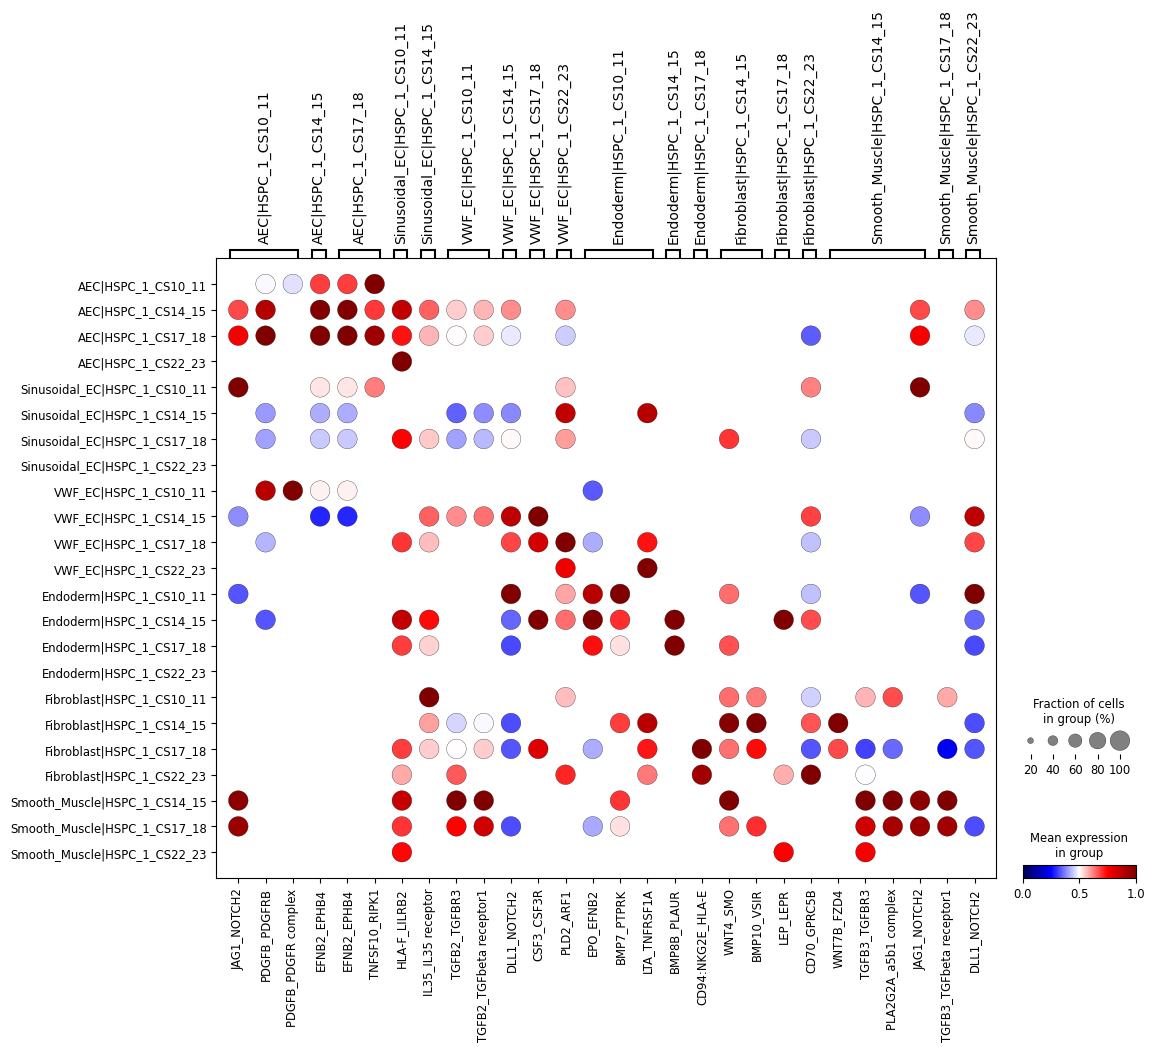

In [280]:
sig_a1 = ["EPO_EFNB2",
"CSF3_CSF3R",
"DLL1_NOTCH2",
"JAG1_NOTCH2",
"BMP7_PTPRK",
"BMP8B_PLAUR",
"BMP10_VSIR",
"FGF18_FGFR1",
"WNT4_SMO",
"WNT7B_FZD4",
"TGFB2_TGFbeta receptor1",
"TGFB3_TGFbeta receptor1",
"TGFB3_TGFBR3",
"GDF9_TGFR_BMPR2",
"ADCYAP1_DPP4",
"CD70_GPRC5B",
"IL35_IL35 receptor",
"EFNB2_EPHB4",
"TNFSF10_RIPK1",
"PDGFB_PDGFRB",
"TGFB2_TGFBR3",
"LTA_TNFRSF1A",
"HLA-F_LILRB2",
"PLD2_ARF1",
"PLA2G2A_a4b1 complex",
"IL13_TMEM219",
"PDGFB_PDGFR complex",
"PLA2G2A_a5b1 complex",
"SPP1_a4b1 complex",
"LEP_LEPR",
"CD94:NKG2E_HLA-E",]
for (key, value) in exp_tbl_ordered.items():
    exp_tbl_ordered[key] = [x for x in value if x in list(sig_a1)]
exp_tbl_ordered = {k: v for k, v in exp_tbl_ordered.items() if v}

# check for loss
from itertools import chain
set(sorted(set(chain(*exp_tbl_ordered.values())))) ^ set(sig_a1)

(sc.pl.dotplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True)) # title=i

In [285]:
exp_tbl_ordered 

{'AEC': ['EFNB2_EPHB4',
  'TNFSF10_RIPK1',
  'PDGFB_PDGFRB',
  'PDGFB_PDGFR complex',
  'JAG1_NOTCH2'],
 'Sinusoidal_EC': ['IL35_IL35 receptor'],
 'VWF_EC': ['TGFB2_TGFBR3',
  'TGFB2_TGFbeta receptor1',
  'HLA-F_LILRB2',
  'DLL1_NOTCH2',
  'PLD2_ARF1',
  'CSF3_CSF3R'],
 'Endoderm': ['EPO_EFNB2', 'BMP7_PTPRK', 'BMP8B_PLAUR', 'CD94:NKG2E_HLA-E'],
 'Fibroblast': ['WNT4_SMO', 'BMP10_VSIR', 'LEP_LEPR', 'CD70_GPRC5B'],
 'Smooth_Muscle': ['WNT7B_FZD4',
  'TGFB3_TGFBR3',
  'PLA2G2A_a5b1 complex',
  'JAG1_NOTCH2',
  'TGFB3_TGFbeta receptor1',
  'DLL1_NOTCH2'],
 'Mesothelium': ['GDF9_TGFR_BMPR2',
  'WNT7B_FZD4',
  'PLA2G2A_a4b1 complex',
  'SPP1_a4b1 complex']}

In [294]:
from itertools import chain
((chain(*exp_tbl_ordered.values())))
# [58, 64, 80, 130]

# another option is `itertools.groupby`
from itertools import groupby
[k for k, g in groupby(sorted(chain(*exp_tbl_ordered.values())))]

['BMP10_VSIR',
 'BMP7_PTPRK',
 'BMP8B_PLAUR',
 'CD70_GPRC5B',
 'CD94:NKG2E_HLA-E',
 'CSF3_CSF3R',
 'DLL1_NOTCH2',
 'EFNB2_EPHB4',
 'EPO_EFNB2',
 'GDF9_TGFR_BMPR2',
 'HLA-F_LILRB2',
 'IL35_IL35 receptor',
 'JAG1_NOTCH2',
 'LEP_LEPR',
 'PDGFB_PDGFR complex',
 'PDGFB_PDGFRB',
 'PLA2G2A_a4b1 complex',
 'PLA2G2A_a5b1 complex',
 'PLD2_ARF1',
 'SPP1_a4b1 complex',
 'TGFB2_TGFBR3',
 'TGFB2_TGFbeta receptor1',
 'TGFB3_TGFBR3',
 'TGFB3_TGFbeta receptor1',
 'TNFSF10_RIPK1',
 'WNT4_SMO',
 'WNT7B_FZD4']

In [292]:
set(['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','PDGFB_PDGFR complex','JAG1_NOTCH2',
'IL35_IL35 receptor',
'TGFB2_TGFBR3', 'TGFB2_TGFbeta receptor1','HLA-F_LILRB2','DLL1_NOTCH2','PLD2_ARF1','CSF3_CSF3R',
'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR','CD94:NKG2E_HLA-E',
'WNT4_SMO', 'BMP10_VSIR','LEP_LEPR','CD70_GPRC5B',
'WNT7B_FZD4','TGFB3_TGFBR3','PLA2G2A_a5b1 complex','JAG1_NOTCH2','TGFB3_TGFbeta receptor1','DLL1_NOTCH2',
'GDF9_TGFR_BMPR2','WNT7B_FZD4','PLA2G2A_a4b1 complex', 'SPP1_a4b1 complex'])

{'BMP10_VSIR',
 'BMP7_PTPRK',
 'BMP8B_PLAUR',
 'CD70_GPRC5B',
 'CD94:NKG2E_HLA-E',
 'CSF3_CSF3R',
 'DLL1_NOTCH2',
 'EFNB2_EPHB4',
 'EPO_EFNB2',
 'GDF9_TGFR_BMPR2',
 'HLA-F_LILRB2',
 'IL35_IL35 receptor',
 'JAG1_NOTCH2',
 'LEP_LEPR',
 'PDGFB_PDGFR complex',
 'PDGFB_PDGFRB',
 'PLA2G2A_a4b1 complex',
 'PLA2G2A_a5b1 complex',
 'PLD2_ARF1',
 'SPP1_a4b1 complex',
 'TGFB2_TGFBR3',
 'TGFB2_TGFbeta receptor1',
 'TGFB3_TGFBR3',
 'TGFB3_TGFbeta receptor1',
 'TNFSF10_RIPK1',
 'WNT4_SMO',
 'WNT7B_FZD4'}

# main figure ordering!

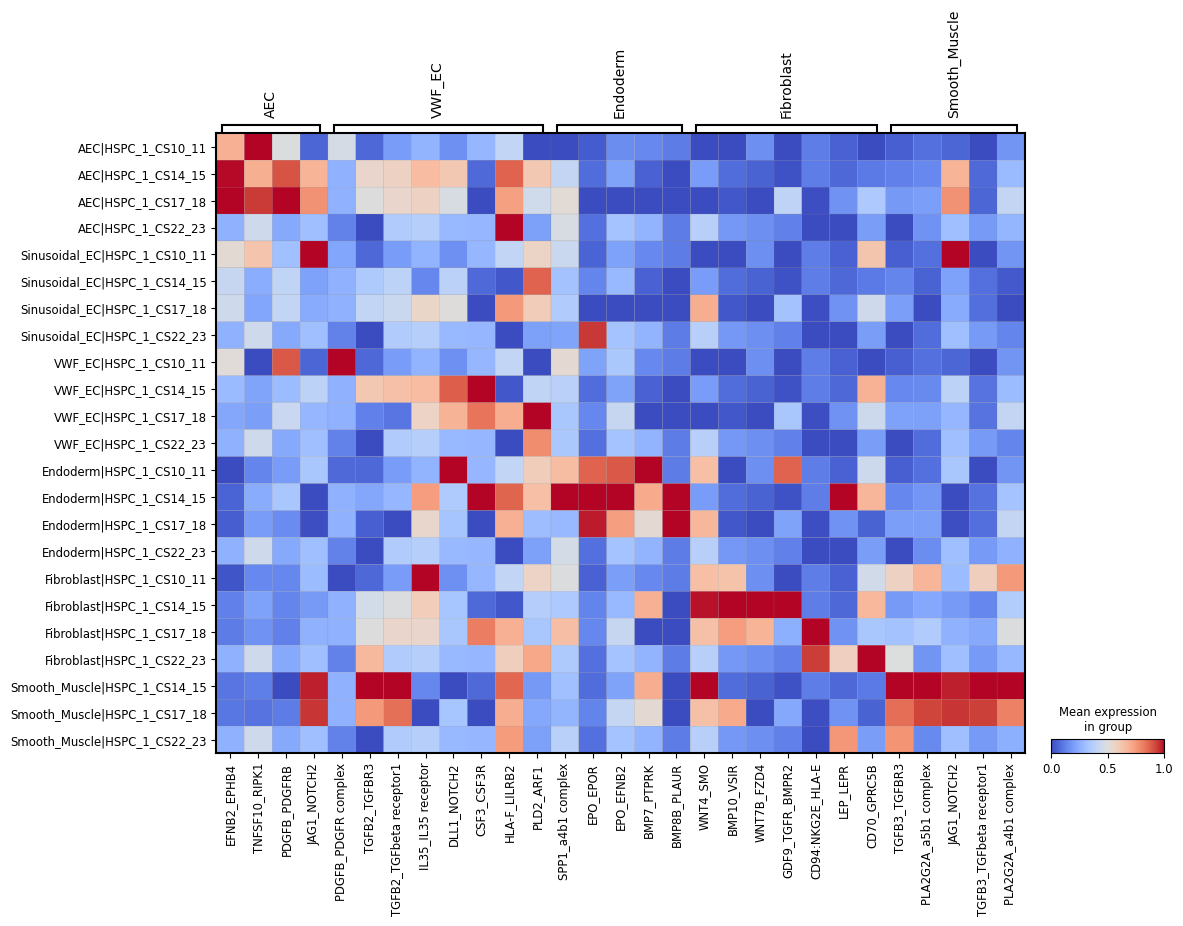

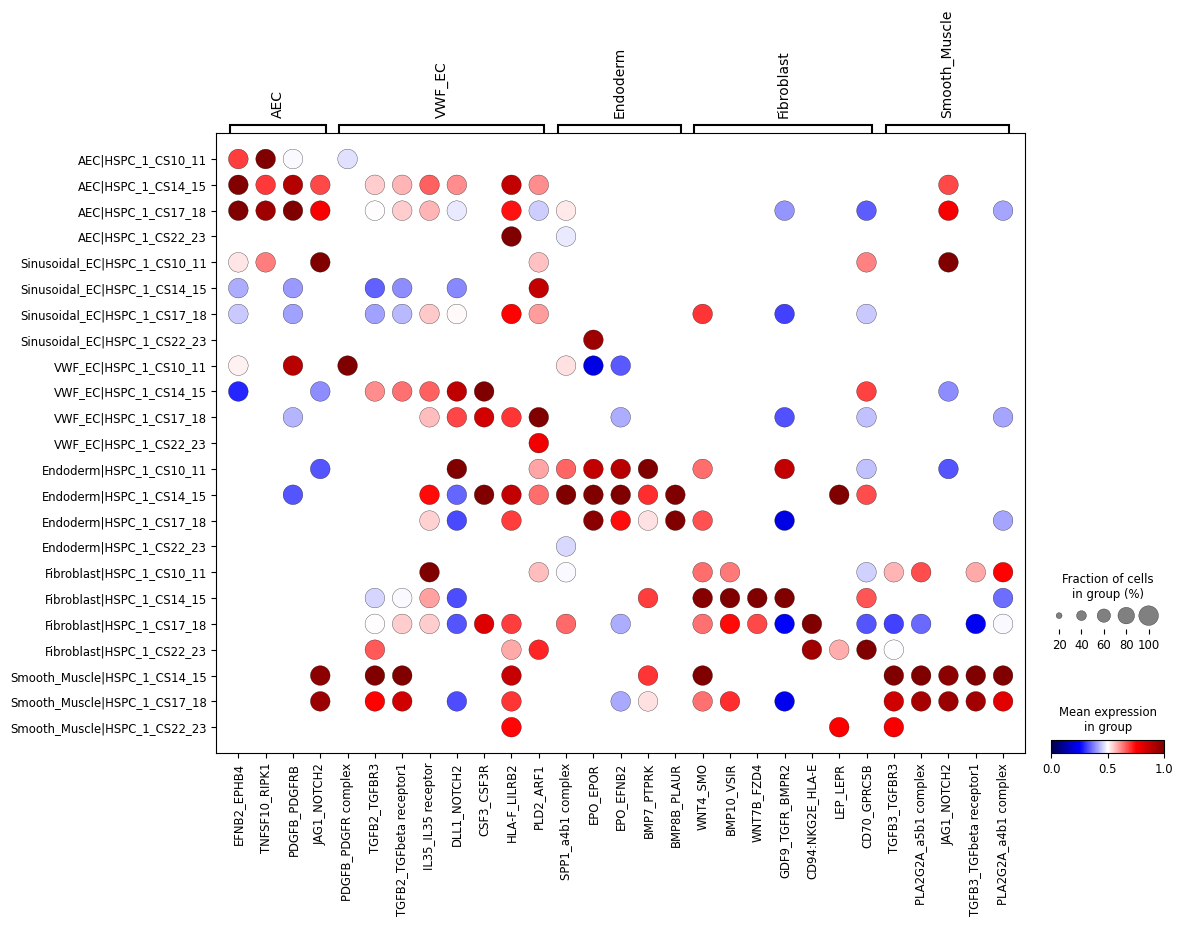

In [320]:
exp_tbl_ordered = {
'AEC': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2',],
                   
 'VWF_EC': ['PDGFB_PDGFR complex','TGFB2_TGFBR3', 'TGFB2_TGFbeta receptor1','IL35_IL35 receptor','DLL1_NOTCH2','CSF3_CSF3R','HLA-F_LILRB2','PLD2_ARF1'],
                   
 'Endoderm': ['SPP1_a4b1 complex',"EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
 'Fibroblast': ['WNT4_SMO', 'BMP10_VSIR','WNT7B_FZD4','GDF9_TGFR_BMPR2','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
                   
 'Smooth_Muscle': ['TGFB3_TGFBR3','PLA2G2A_a5b1 complex','JAG1_NOTCH2','TGFB3_TGFbeta receptor1','PLA2G2A_a4b1 complex'],
}
(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'YS_HSPC_maintenance_molecules_for_main.pdf')) # title=i
(sc.pl.dotplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'YS_HSPC_maintenance_molecules_for_main.pdf')) # title=i
#(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'HSPC_maintenance_molecules_for_supp.pdf')) # title=i

# Manual filtering V3

In [23]:
stage_groups_order = ['AEC|HSPC_1_CS10_11',
 'AEC|HSPC_1_CS14_15',
 'AEC|HSPC_1_CS17_18',
 'AEC|HSPC_1_CS22_23',
 'Sinusoidal_EC|HSPC_1_CS10_11',
 'Sinusoidal_EC|HSPC_1_CS14_15',
 'Sinusoidal_EC|HSPC_1_CS17_18',
 'Sinusoidal_EC|HSPC_1_CS22_23',
'VWF_EC|HSPC_1_CS10_11',
 'VWF_EC|HSPC_1_CS14_15',
 'VWF_EC|HSPC_1_CS17_18',
 'VWF_EC|HSPC_1_CS22_23',
 'Endoderm|HSPC_1_CS10_11',
 'Endoderm|HSPC_1_CS14_15',
 'Endoderm|HSPC_1_CS17_18',
 'Endoderm|HSPC_1_CS22_23',
 'Fibroblast|HSPC_1_CS10_11',
 'Fibroblast|HSPC_1_CS14_15',
 'Fibroblast|HSPC_1_CS17_18',
 'Fibroblast|HSPC_1_CS22_23',
 'Smooth_Muscle|HSPC_1_CS14_15',
 'Smooth_Muscle|HSPC_1_CS17_18',
 'Smooth_Muscle|HSPC_1_CS22_23',]
adata = adata[adata.obs['stage_pair'].isin(stage_groups_order)]
adata.obs['stage_pair'] = adata.obs['stage_pair'].astype('category').cat.reorder_categories(stage_groups_order)

# reorder exp_tbl for categorical ordering
# exp_tbl_ordered = { key: exp_tbl[key] for key in stage_groups_order }

<ipython-input-23-20cedbc4ea53>:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage_pair'] = adata.obs['stage_pair'].astype('category').cat.reorder_categories(stage_groups_order)


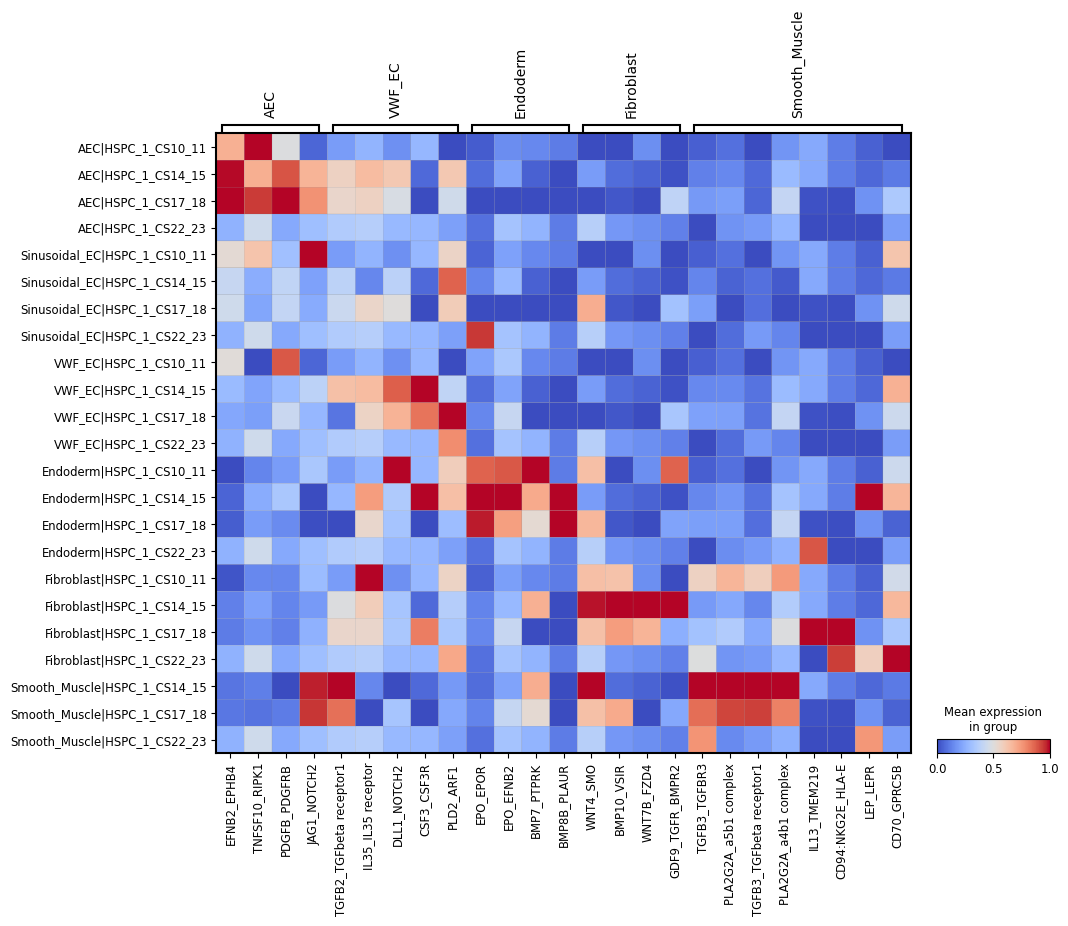

In [25]:
{'AEC': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2',],
                   
 'VWF_EC': ['PDGFB_PDGFR complex','TGFB2_TGFBR3', 'TGFB2_TGFbeta receptor1','IL35_IL35 receptor','DLL1_NOTCH2','CSF3_CSF3R','HLA-F_LILRB2','PLD2_ARF1'],
                   
 'Endoderm': ['SPP1_a4b1 complex',"EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
 'Fibroblast': ['WNT4_SMO', 'BMP10_VSIR','WNT7B_FZD4','GDF9_TGFR_BMPR2','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
                   
 'Smooth_Muscle': ['TGFB3_TGFBR3','PLA2G2A_a5b1 complex','JAG1_NOTCH2','TGFB3_TGFbeta receptor1','PLA2G2A_a4b1 complex'],
}

exp_tbl_ordered = {
'AEC': ['EFNB2_EPHB4','TNFSF10_RIPK1','PDGFB_PDGFRB','JAG1_NOTCH2',],
                   
 'VWF_EC': ['TGFB2_TGFbeta receptor1','IL35_IL35 receptor','DLL1_NOTCH2','CSF3_CSF3R','PLD2_ARF1'],
                   
 'Endoderm': ["EPO_EPOR",'EPO_EFNB2', 'BMP7_PTPRK','BMP8B_PLAUR',],
                   
 'Fibroblast': ['WNT4_SMO', 'BMP10_VSIR','WNT7B_FZD4','GDF9_TGFR_BMPR2'],
                   
 'Smooth_Muscle': ['TGFB3_TGFBR3','PLA2G2A_a5b1 complex','TGFB3_TGFbeta receptor1','PLA2G2A_a4b1 complex','IL13_TMEM219','CD94:NKG2E_HLA-E','LEP_LEPR','CD70_GPRC5B'],
}
(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'YS_HSPC_maintenance_molecules_for_main_V3.pdf')) # title=i

In [19]:
(sc.pl.matrixplot(adata, var_names = sig_a1, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'coolwarm_adhesion_molecules_for_supp.pdf')) # title=i

KeyError: "Could not find keys '['BMP10/VSIR', 'BMP7/PTPRK', 'BMP8B/PLAUR', 'CD70/GPRC5B', 'CD94:NKGZE/HLA-E', 'CSF3/CSF3R', 'DLL1/NOTCH2', 'EFNB2/EPHB4', 'EPO/EFNB2', 'EPO/EPOR', 'GDF9/TGFR/BMPR2', 'IL35/1L35 receptor', 'JAG1/NOTCH2', 'LEP/LEPR', 'PDGFB/PDGERB', 'PLA2G2A/a5b1 complex', 'PLAC2G2A/a4b1 complex', 'PLD2/ARF1', 'TGFB2/TBGbeta receptor 1', 'TGFB3/TGFBR3', 'TGFB3/TGFbeta receptor 1', 'TNFSF10/RIPK1', 'WNT4/SMO', 'WNT7B/FZD4']' in columns of `adata.obs` or in adata.var_names."

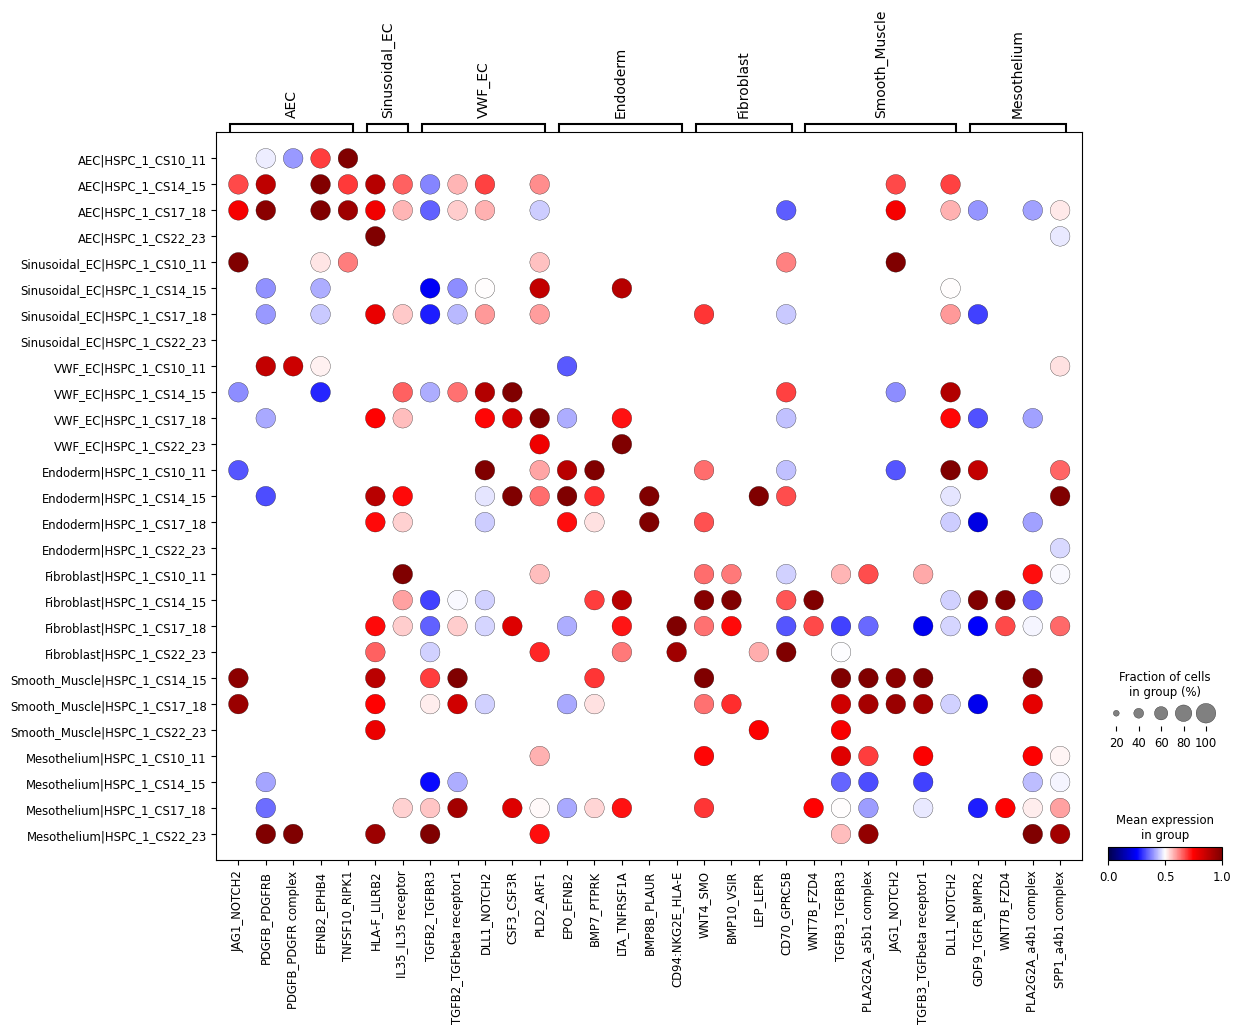

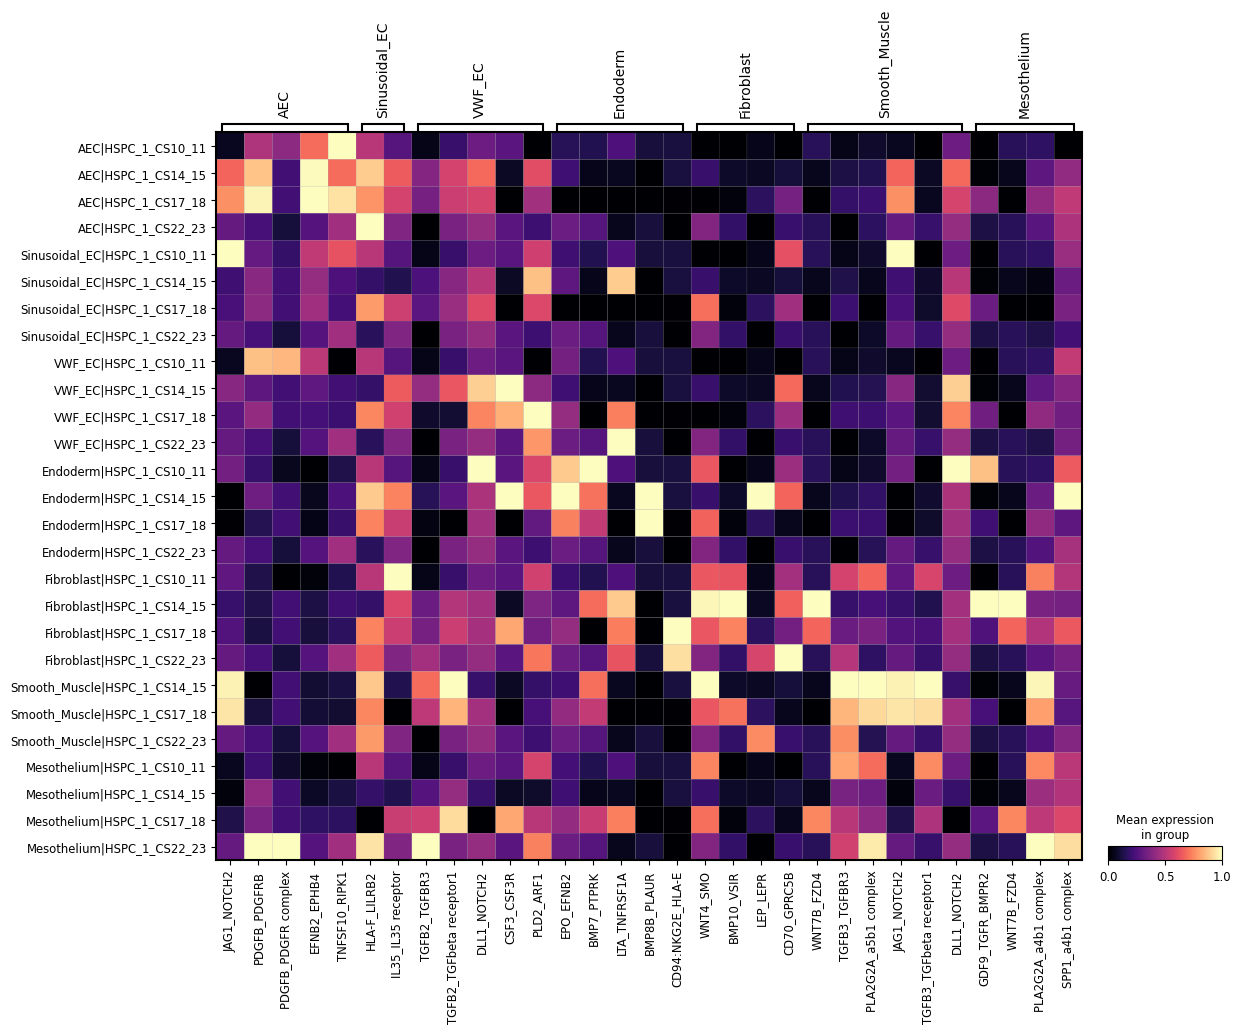

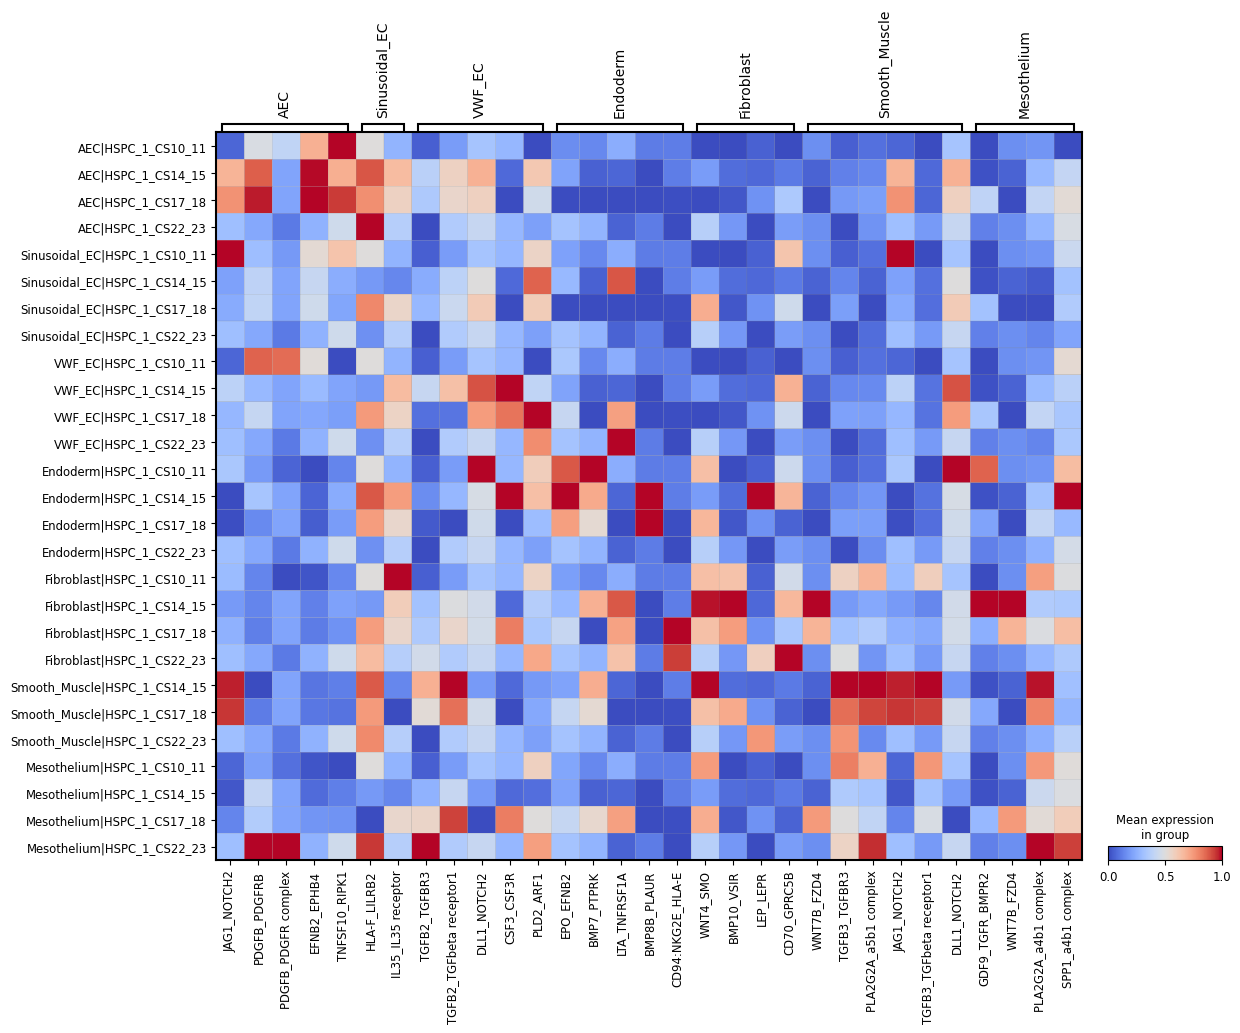

In [231]:
(sc.pl.dotplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', color_map='seismic', show = True,save = 'HSPC_maintenance_molecules_for_supp.pdf')) # title=i
(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='magma', show = True,save = 'HSPC_maintenance_molecules_for_supp.pdf')) # title=i
(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='coolwarm', show = True,save = 'HSPC_maintenance_molecules_for_supp.pdf')) # title=i

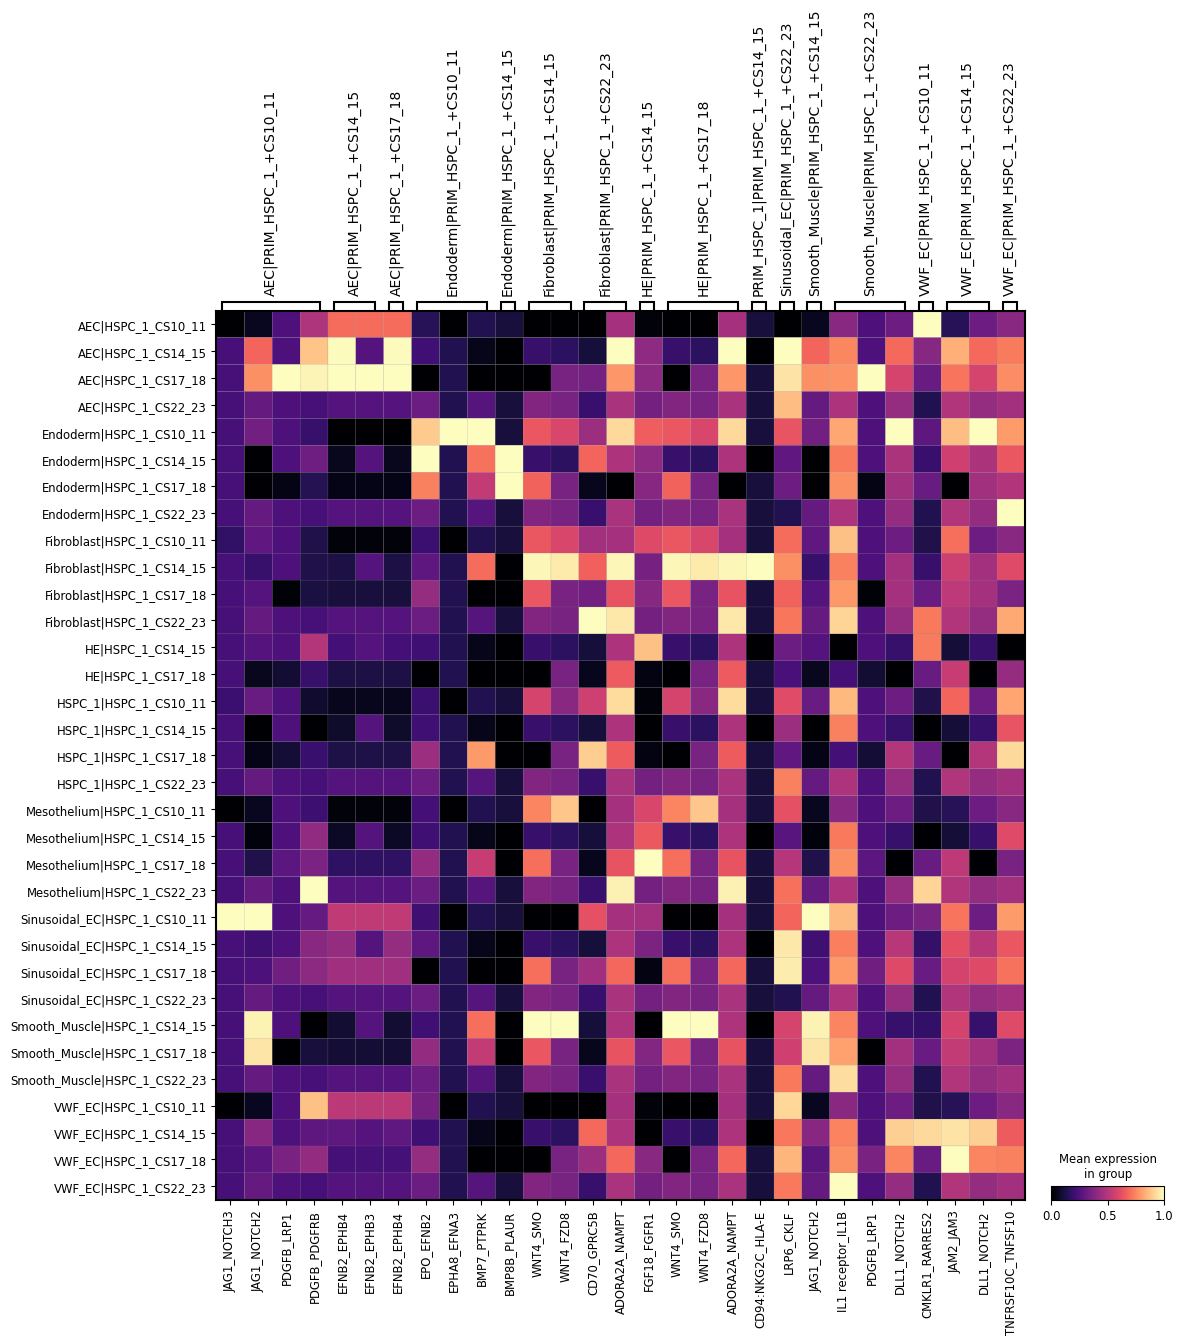

In [19]:
(sc.pl.matrixplot(adata, var_names = exp_tbl_ordered, groupby='stage_pair',dendrogram=False,standard_scale='var', cmap='magma', show = True,save = 'ordered_manual_curated_interactions.pdf')) # title=i